**Purpose**: Prepare feedback data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
def get_mcq_answer_counts(col, df):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    return q.explode().value_counts()

def get_mcq_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    value_counts = q.explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

def get_question_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # get unique items & counts
    value_counts = df[col].explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

In [3]:
colors = {
    'participants': '#3182bd',
    'mentors': '#fd8d3c'
}

# Mid-cohort

## Participants

In [4]:
url = "https://docs.google.com/spreadsheets/d/1-p1e2bXW7edR2o0vZ60pP2Su18wvRK9n4atoi-7wVYo/export?format=csv"
cohort_gid = {
    'OLS-1': '814222007',
    'OLS-2': '1061421385',
    'OLS-3': '564694769',
    'OLS-4': '797034637',
    'OLS-5': '414286605',
    'OLS-6': '0',
}

In [5]:
participant_mid_df = {}
for c in cohort_gid:
    participant_mid_df[c] = (pd.read_csv(f"{url}&gid={cohort_gid[c]}")
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(c, "cohort", regex=True)
        .replace("Information on before, during and after the call", "Information on before during and after the call", regex=True)
        .replace(" on the google doc", "", regex=True)
        .replace("I have attended 1-2 cohort calls, and watched the missed call on YouTube", "I have attended 1-2 cohort calls and watched the missed call on YouTube", regex=True)
        .replace("I watched all the cohort calls on YouTube, but have not attended any call so far", "I watched all the cohort calls on YouTube but have not attended any call so far", regex=True)
    )

### Question 1: "OLS is helping me work openly"

Range from 1 (Completely disagree) to 5 (Completely agree)

In [6]:
participant_mid_q1 = {}
other_answer = []
col = "OLS is helping me work openly"
answers = list(range(1, 6)) + ["Other"]
for c in participant_mid_df:
    participant_mid_q1[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q1_df = pd.DataFrame.from_dict(participant_mid_q1)
participant_mid_q1_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
1          0      0      0      0      0      0
2          0      0      0      0      0      0
3          1      0      1      0      0      0
4          5      3      7      2     11     10
5         17     12     15      9     22      4
Other      0      0      0      0      0      0

In [7]:
other_answer

[]

In [8]:
participant_mid_q1_df = 100 * participant_mid_q1_df / participant_mid_q1_df.sum()

Text(0.5, 1.0, 'OLS is helping me work openly')

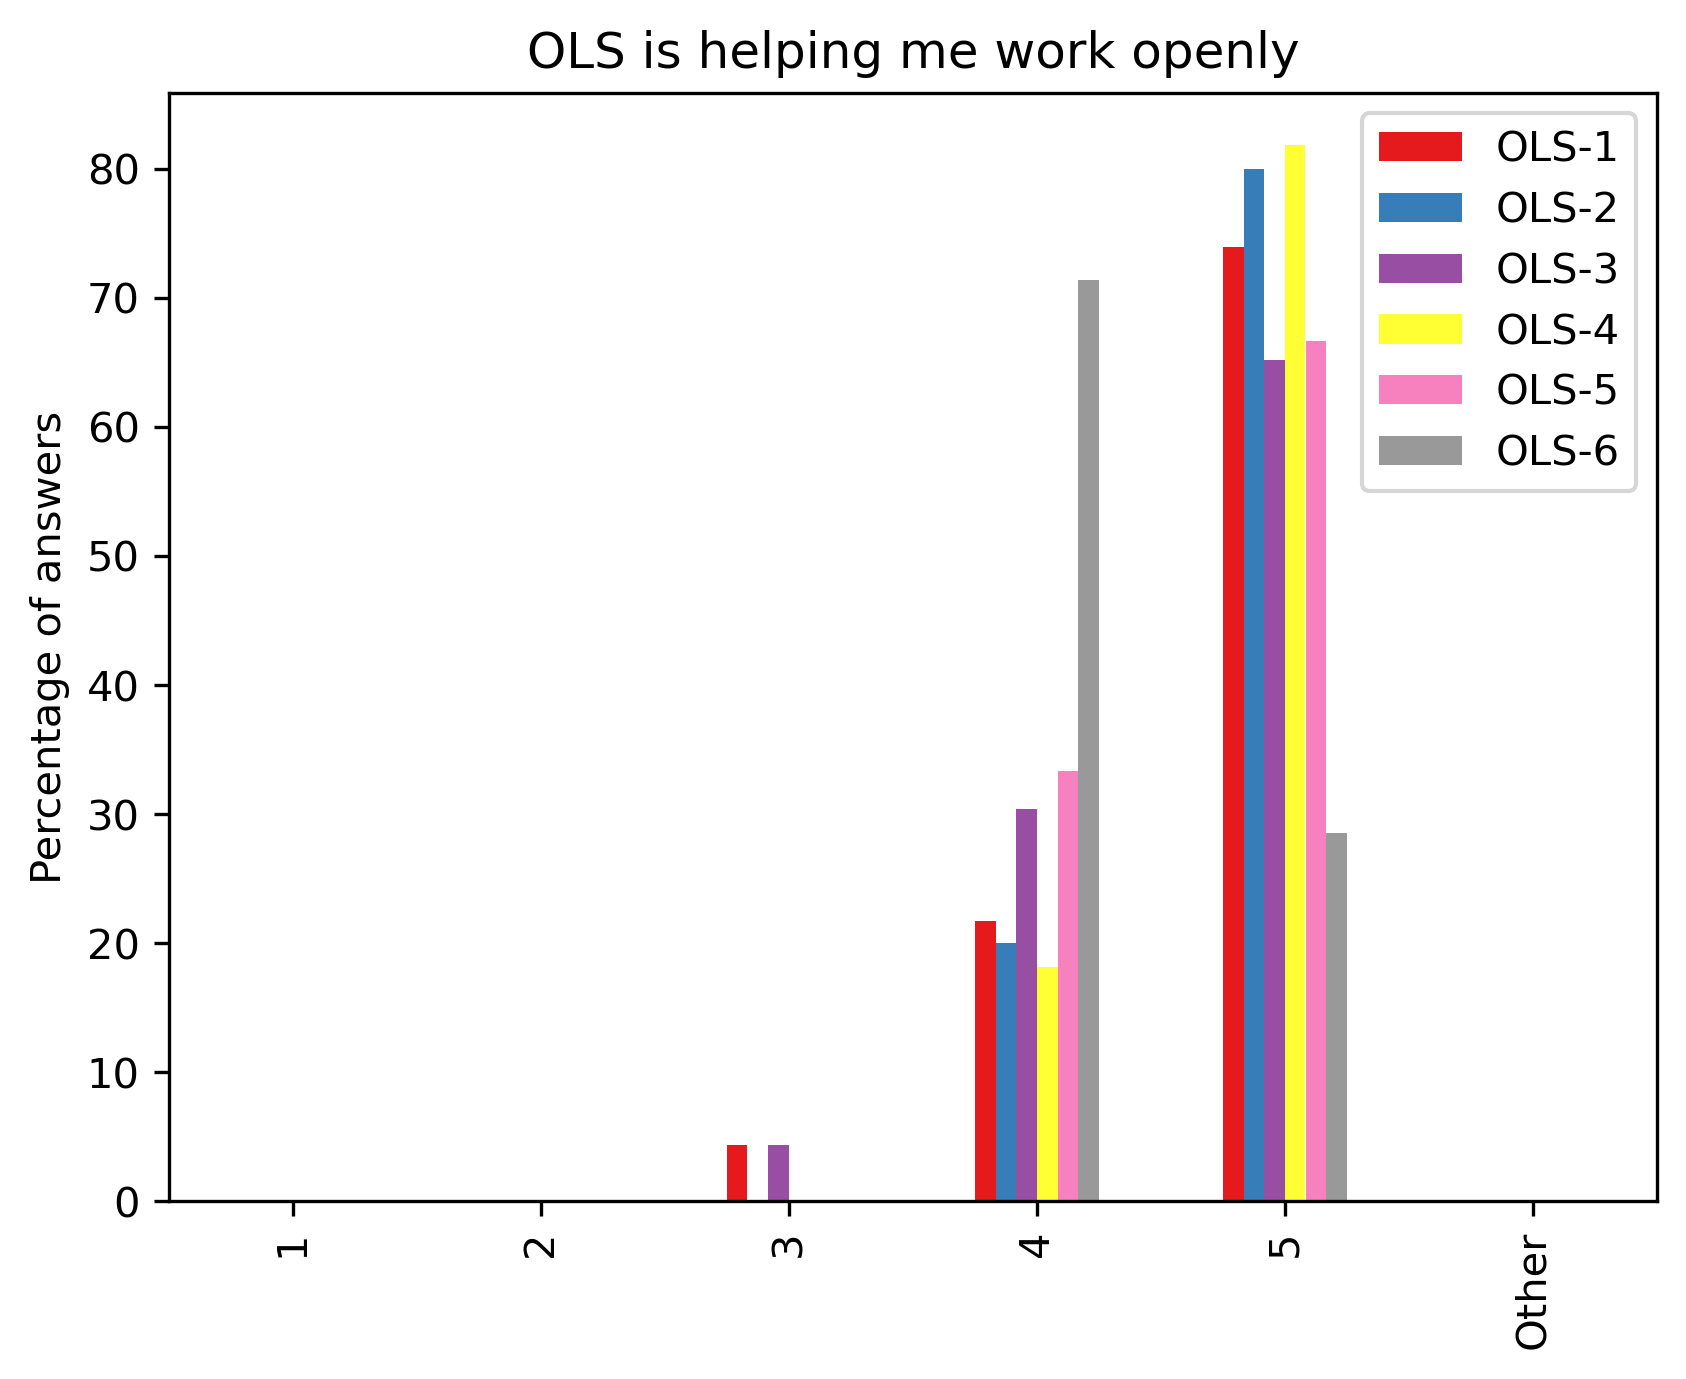

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q1_df.plot.bar(ax=ax, colormap='Set1')
plt.ylabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'OLS is helping me work openly')

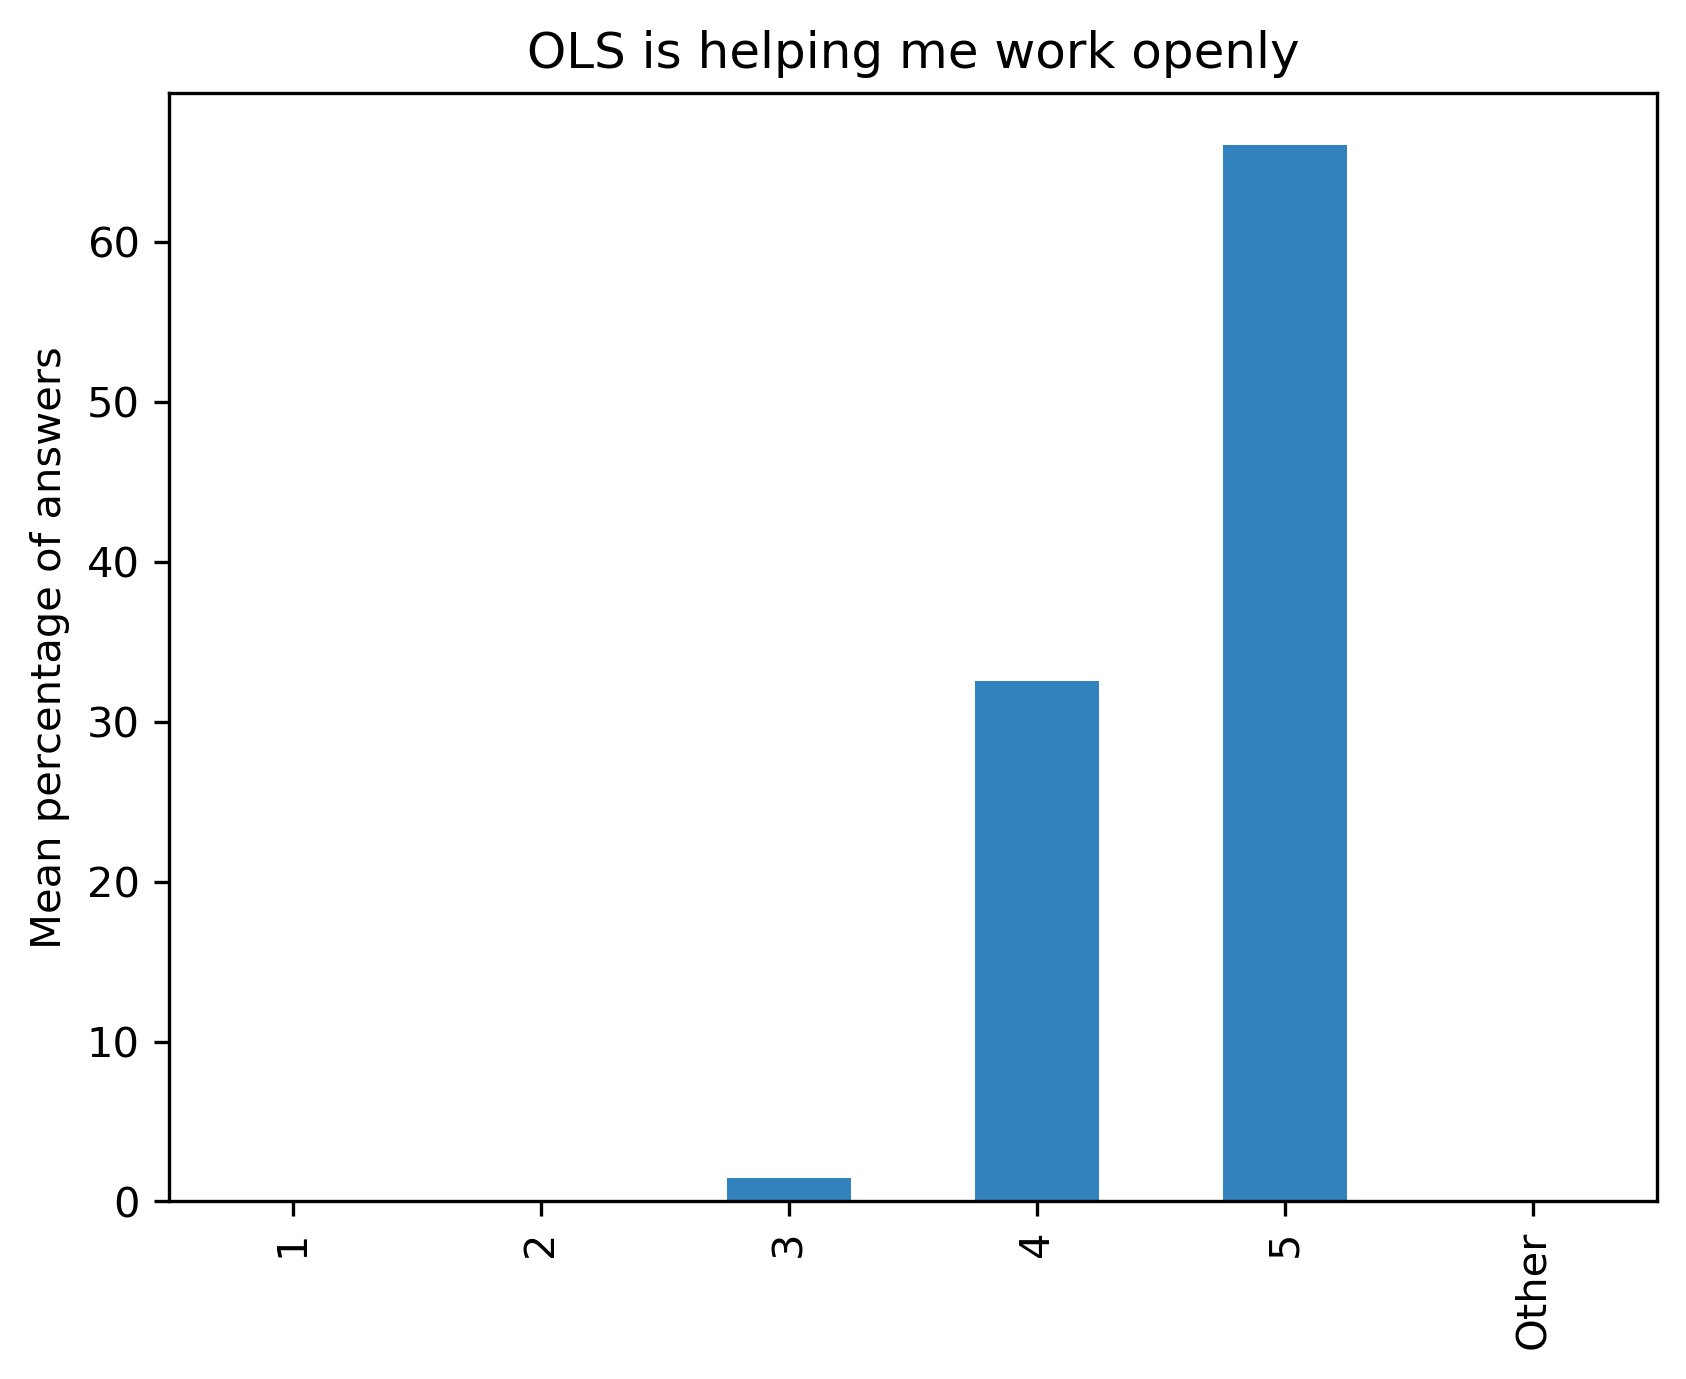

In [10]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q1_df.mean(axis=1).plot.bar(ax=ax, color=colors['participants'])
plt.ylabel('Mean percentage of answers')
plt.title(col)

### Question 2: "OLS is helping me encourage others to work openly"

Range from 1 (Completely disagree) to 5 (Completely agree)

In [11]:
participant_mid_q2 = {}
other_answer = []
col = "OLS is helping me encourage others to work openly"
answers = list(range(1, 6)) + ["Other"]
for c in participant_mid_df:
    participant_mid_q2[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q2_df = pd.DataFrame.from_dict(participant_mid_q2)
participant_mid_q2_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
1          0      0      0      0      0      0
2          0      0      0      0      0      0
3          1      0      2      0      2      1
4          7      8      7      2     11      6
5         15      7     14      9     20      7
Other      0      0      0      0      0      0

In [12]:
other_answer

[]

In [13]:
participant_mid_q2_df = 100 * participant_mid_q2_df / participant_mid_q2_df.sum()

Text(0.5, 1.0, 'OLS is helping me encourage others to work openly')

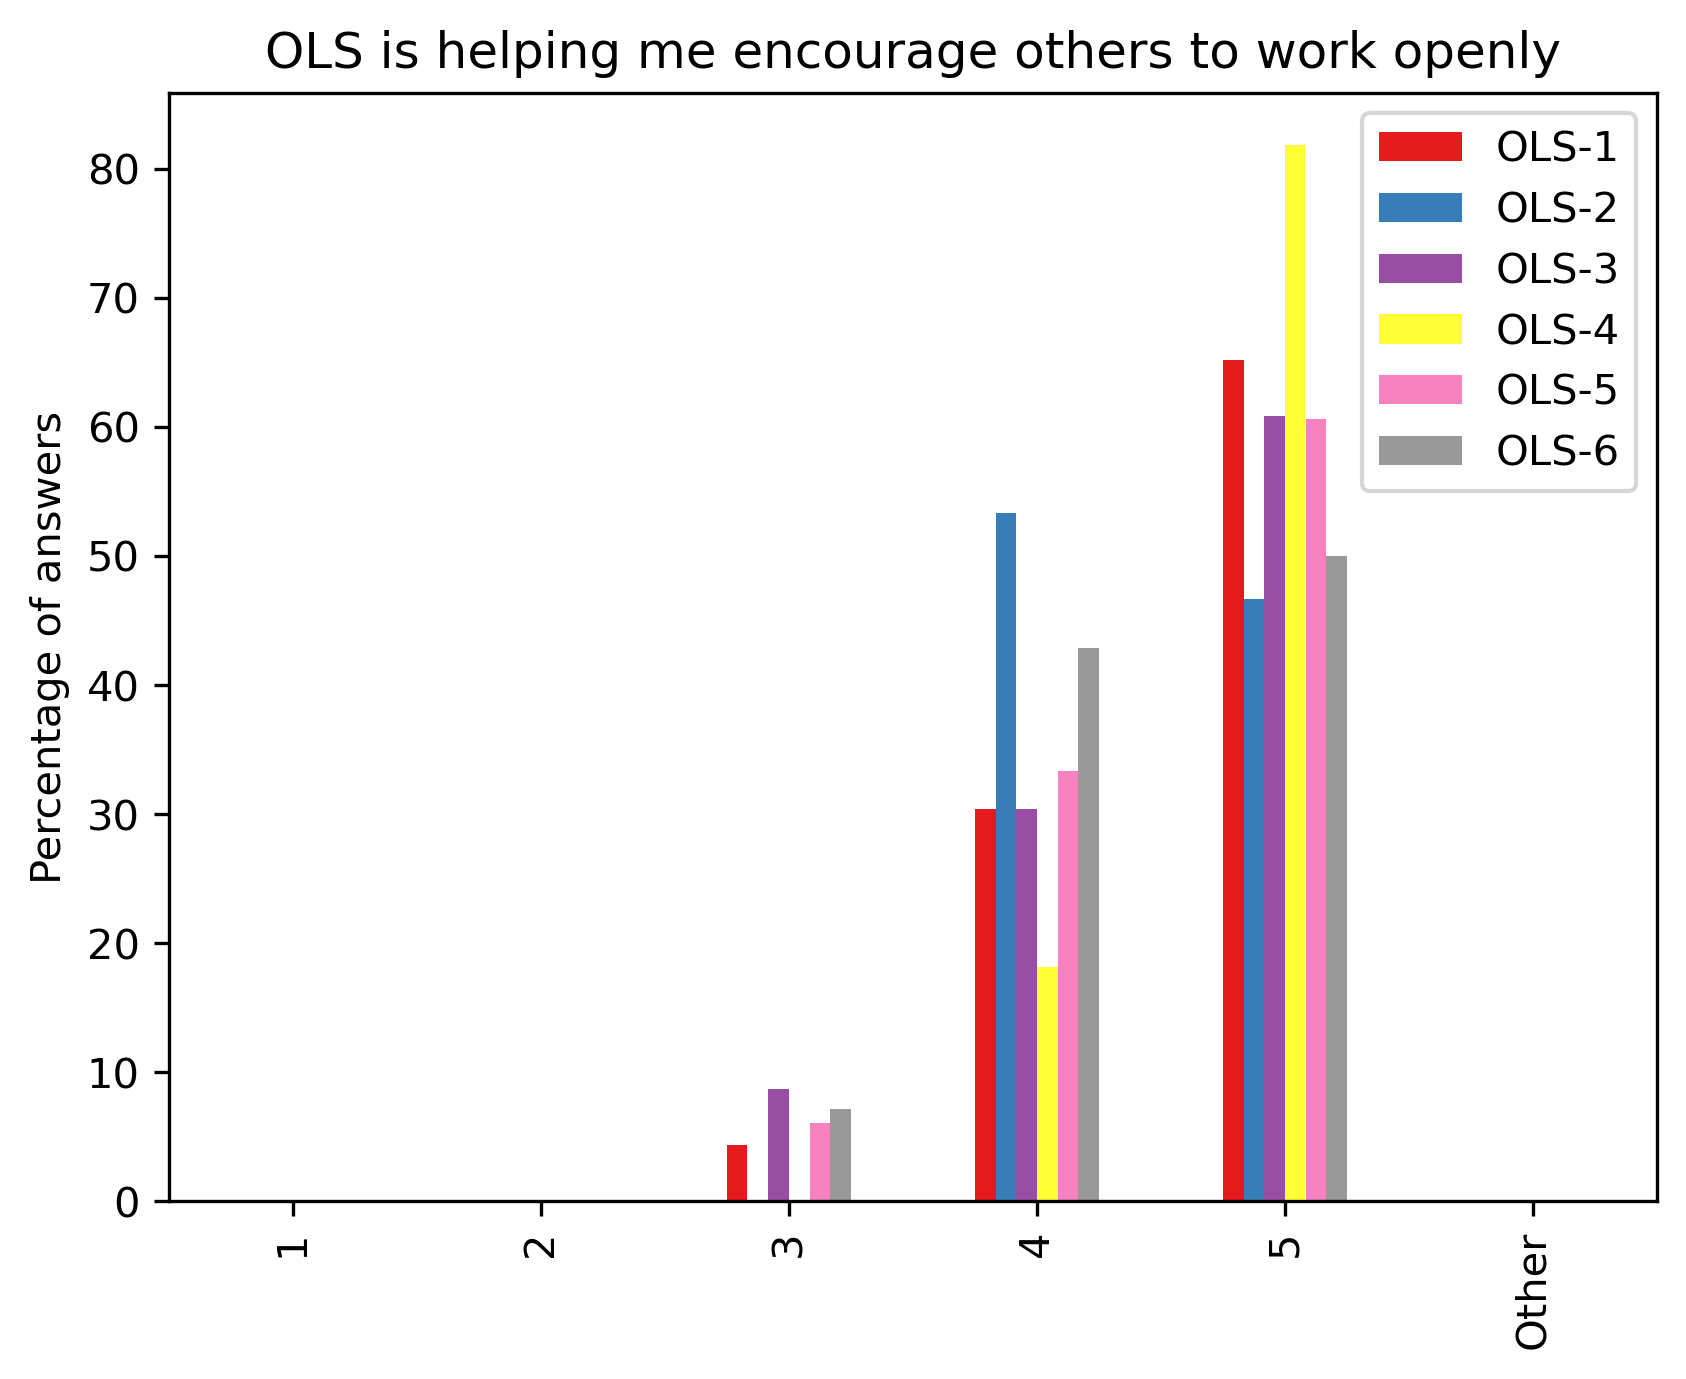

In [14]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q2_df.plot.bar(ax=ax, colormap='Set1')
plt.ylabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'OLS is helping me encourage others to work openly')

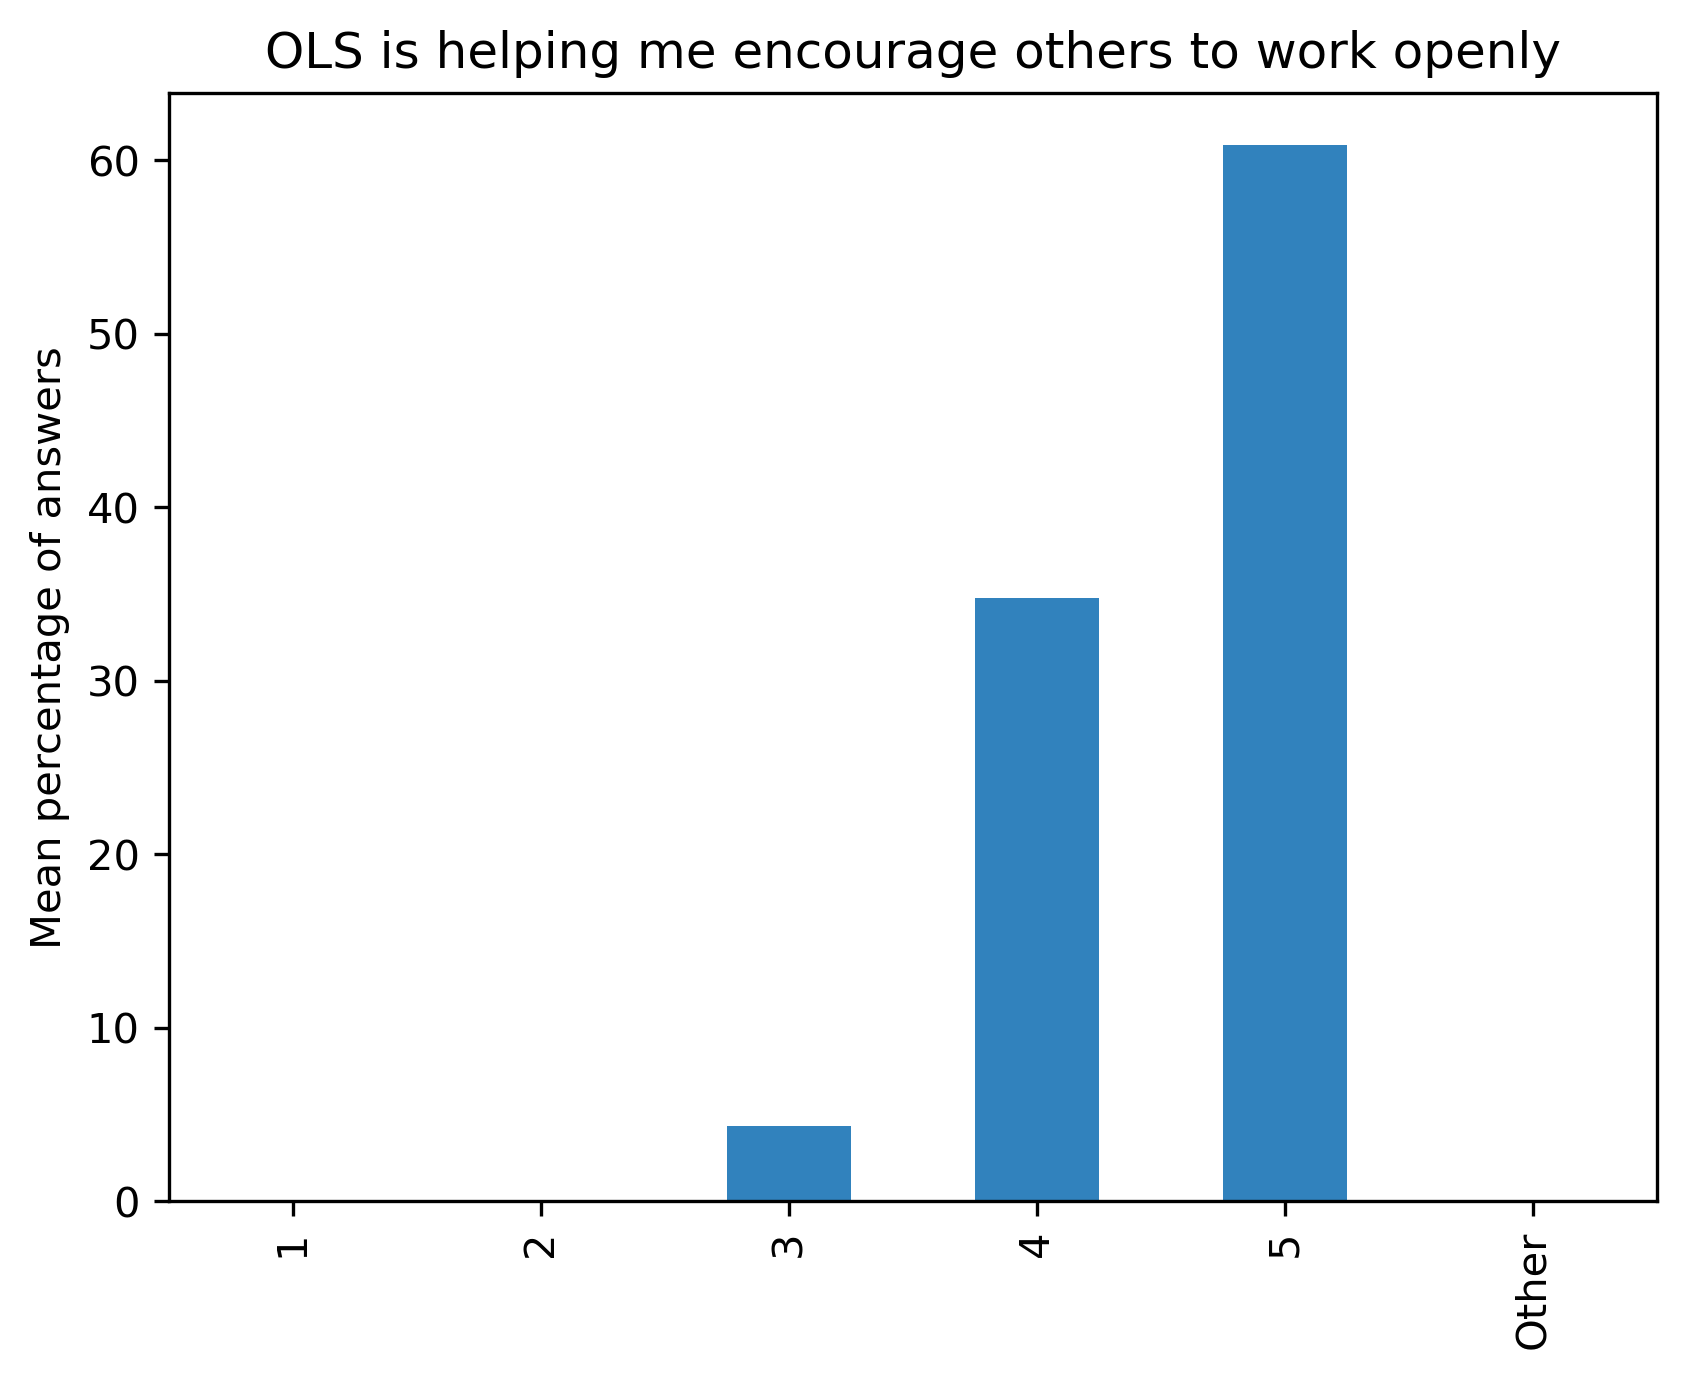

In [15]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q2_df.mean(axis=1).plot.bar(ax=ax, color=colors['participants'])
plt.ylabel('Mean percentage of answers')
plt.title(col)

### Question 3: "Which of the following aspects of the cohort call work well?"

Possible answers:
- Information on before, during and after the call
- Introduction and icebreaker led by the hosts
- Talks by the guest speakers
- Breakout room activities
- Shared note-taking
- Opportunity to get to know others
- All of the above

In [16]:
participant_mid_q3 = {}
other_answer = []
col = "Which of the following aspects of the cohort call work well?"
answers = [
    "Information on before during and after the call", 
    "Introduction and icebreaker led by the hosts", 
    "Talks by the guest speakers", 
    "Breakout room activities",
    "Shared note-taking",
    "Opportunity to get to know others",
    "All of the above",
    "Other"]
for c in participant_mid_df:
    participant_mid_q3[c], oa = get_mcq_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q3_df = pd.DataFrame.from_dict(participant_mid_q3)
participant_mid_q3_df

OLS-1  OLS-2  OLS-3  OLS-4  \
Information on before during and after the call     11      7     18      7   
Introduction and icebreaker led by the hosts         8      8     13      5   
Talks by the guest speakers                         11      9     20      7   
Breakout room activities                             9      4      7      4   
Shared note-taking                                  11      4     18      4   
Opportunity to get to know others                    9      5     13      1   
All of the above                                    12      8      5      4   
Other                                                3      1      4      0   

                                                 OLS-5  OLS-6  
Information on before during and after the call     21      5  
Introduction and icebreaker led by the hosts        16      5  
Talks by the guest speakers                         23      6  
Breakout room activities                            11      4  
Shared note-taking                                  16      6  
Opportunity to get to know others                   12      3  
All of the above                                     9      8  
Other                                                1      1

In [17]:
other_answer

['Side chats on twitter by members.',
 "I like the engagement feeling. It's not a webinar where one can fall asleep",
 'Shared insights by the mentor on the answers shared by the mentee',
 "Wasn't the shared note taking on HackMD? It's also on gDocs?",
 'Written breakout room activities',
 'Having spoken and written spaces',
 'Recording the call and making it available on YouTube',
 'Mentorship by mentors',
 'Love the trainings!',
 'calls are recorded so i can watch later (I am in an odd timezone)']

In [18]:
participant_mid_q3_df = 100 * participant_mid_q3_df / participant_mid_q3_df.sum()

Text(0.5, 1.0, 'Which of the following aspects of the cohort call work well?')

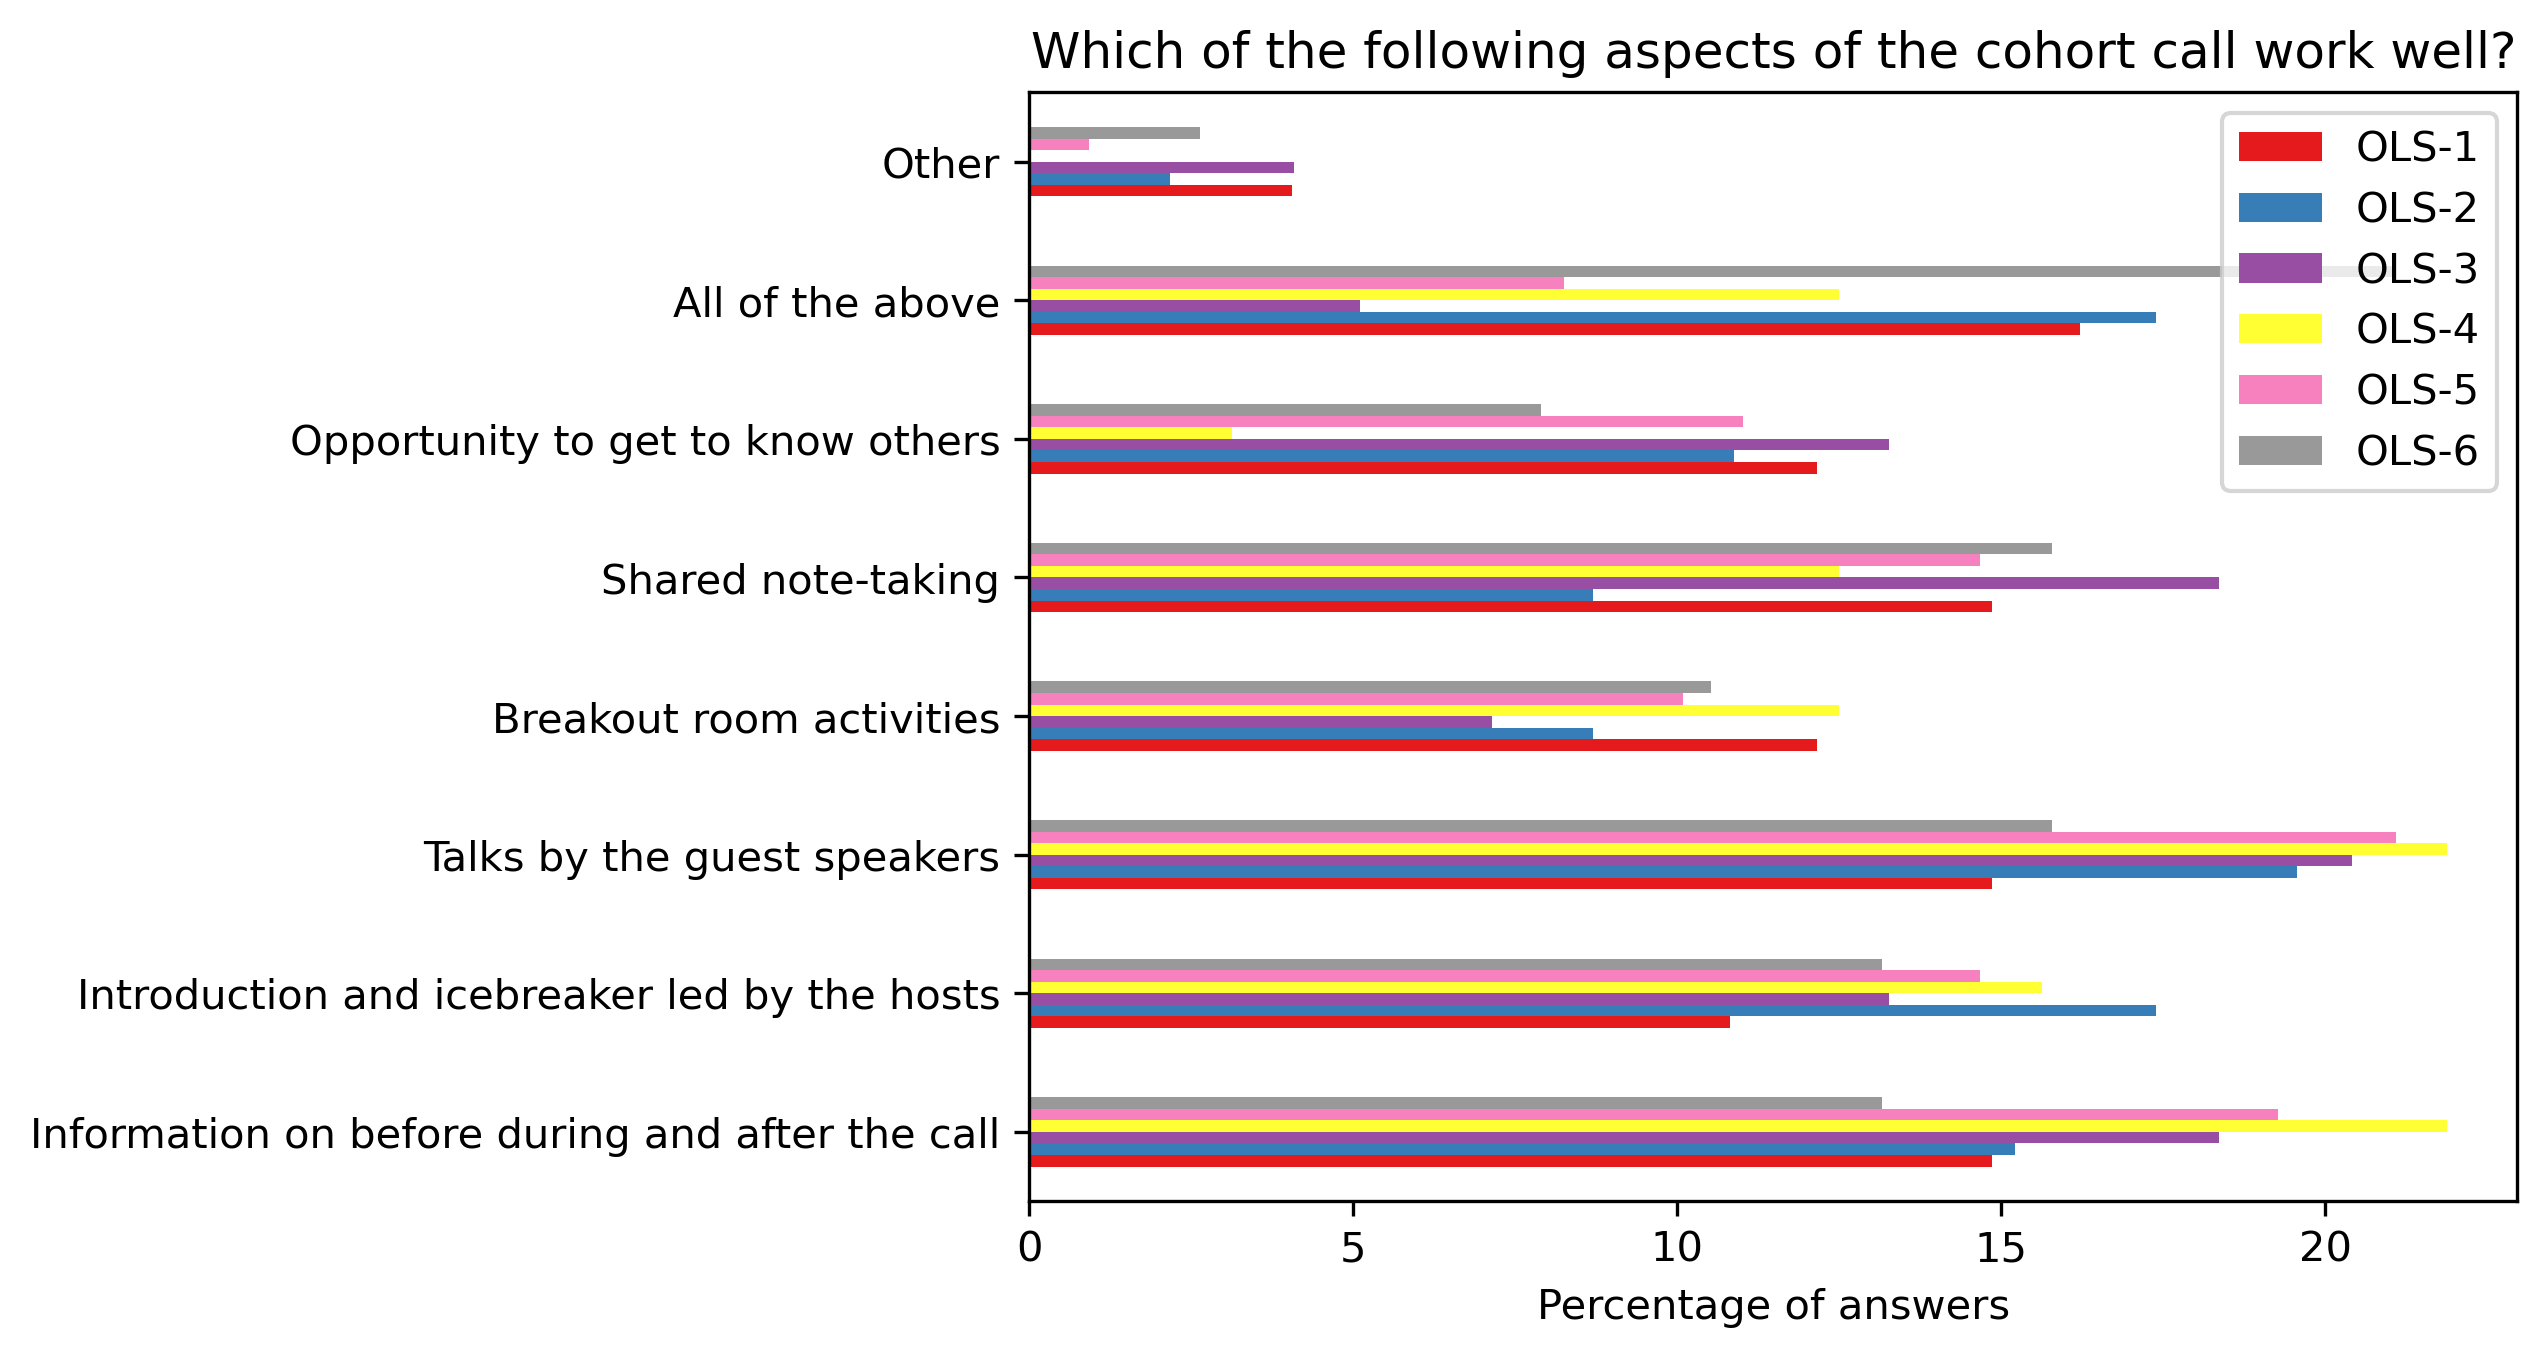

In [19]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q3_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Which of the following aspects of the cohort call work well?')

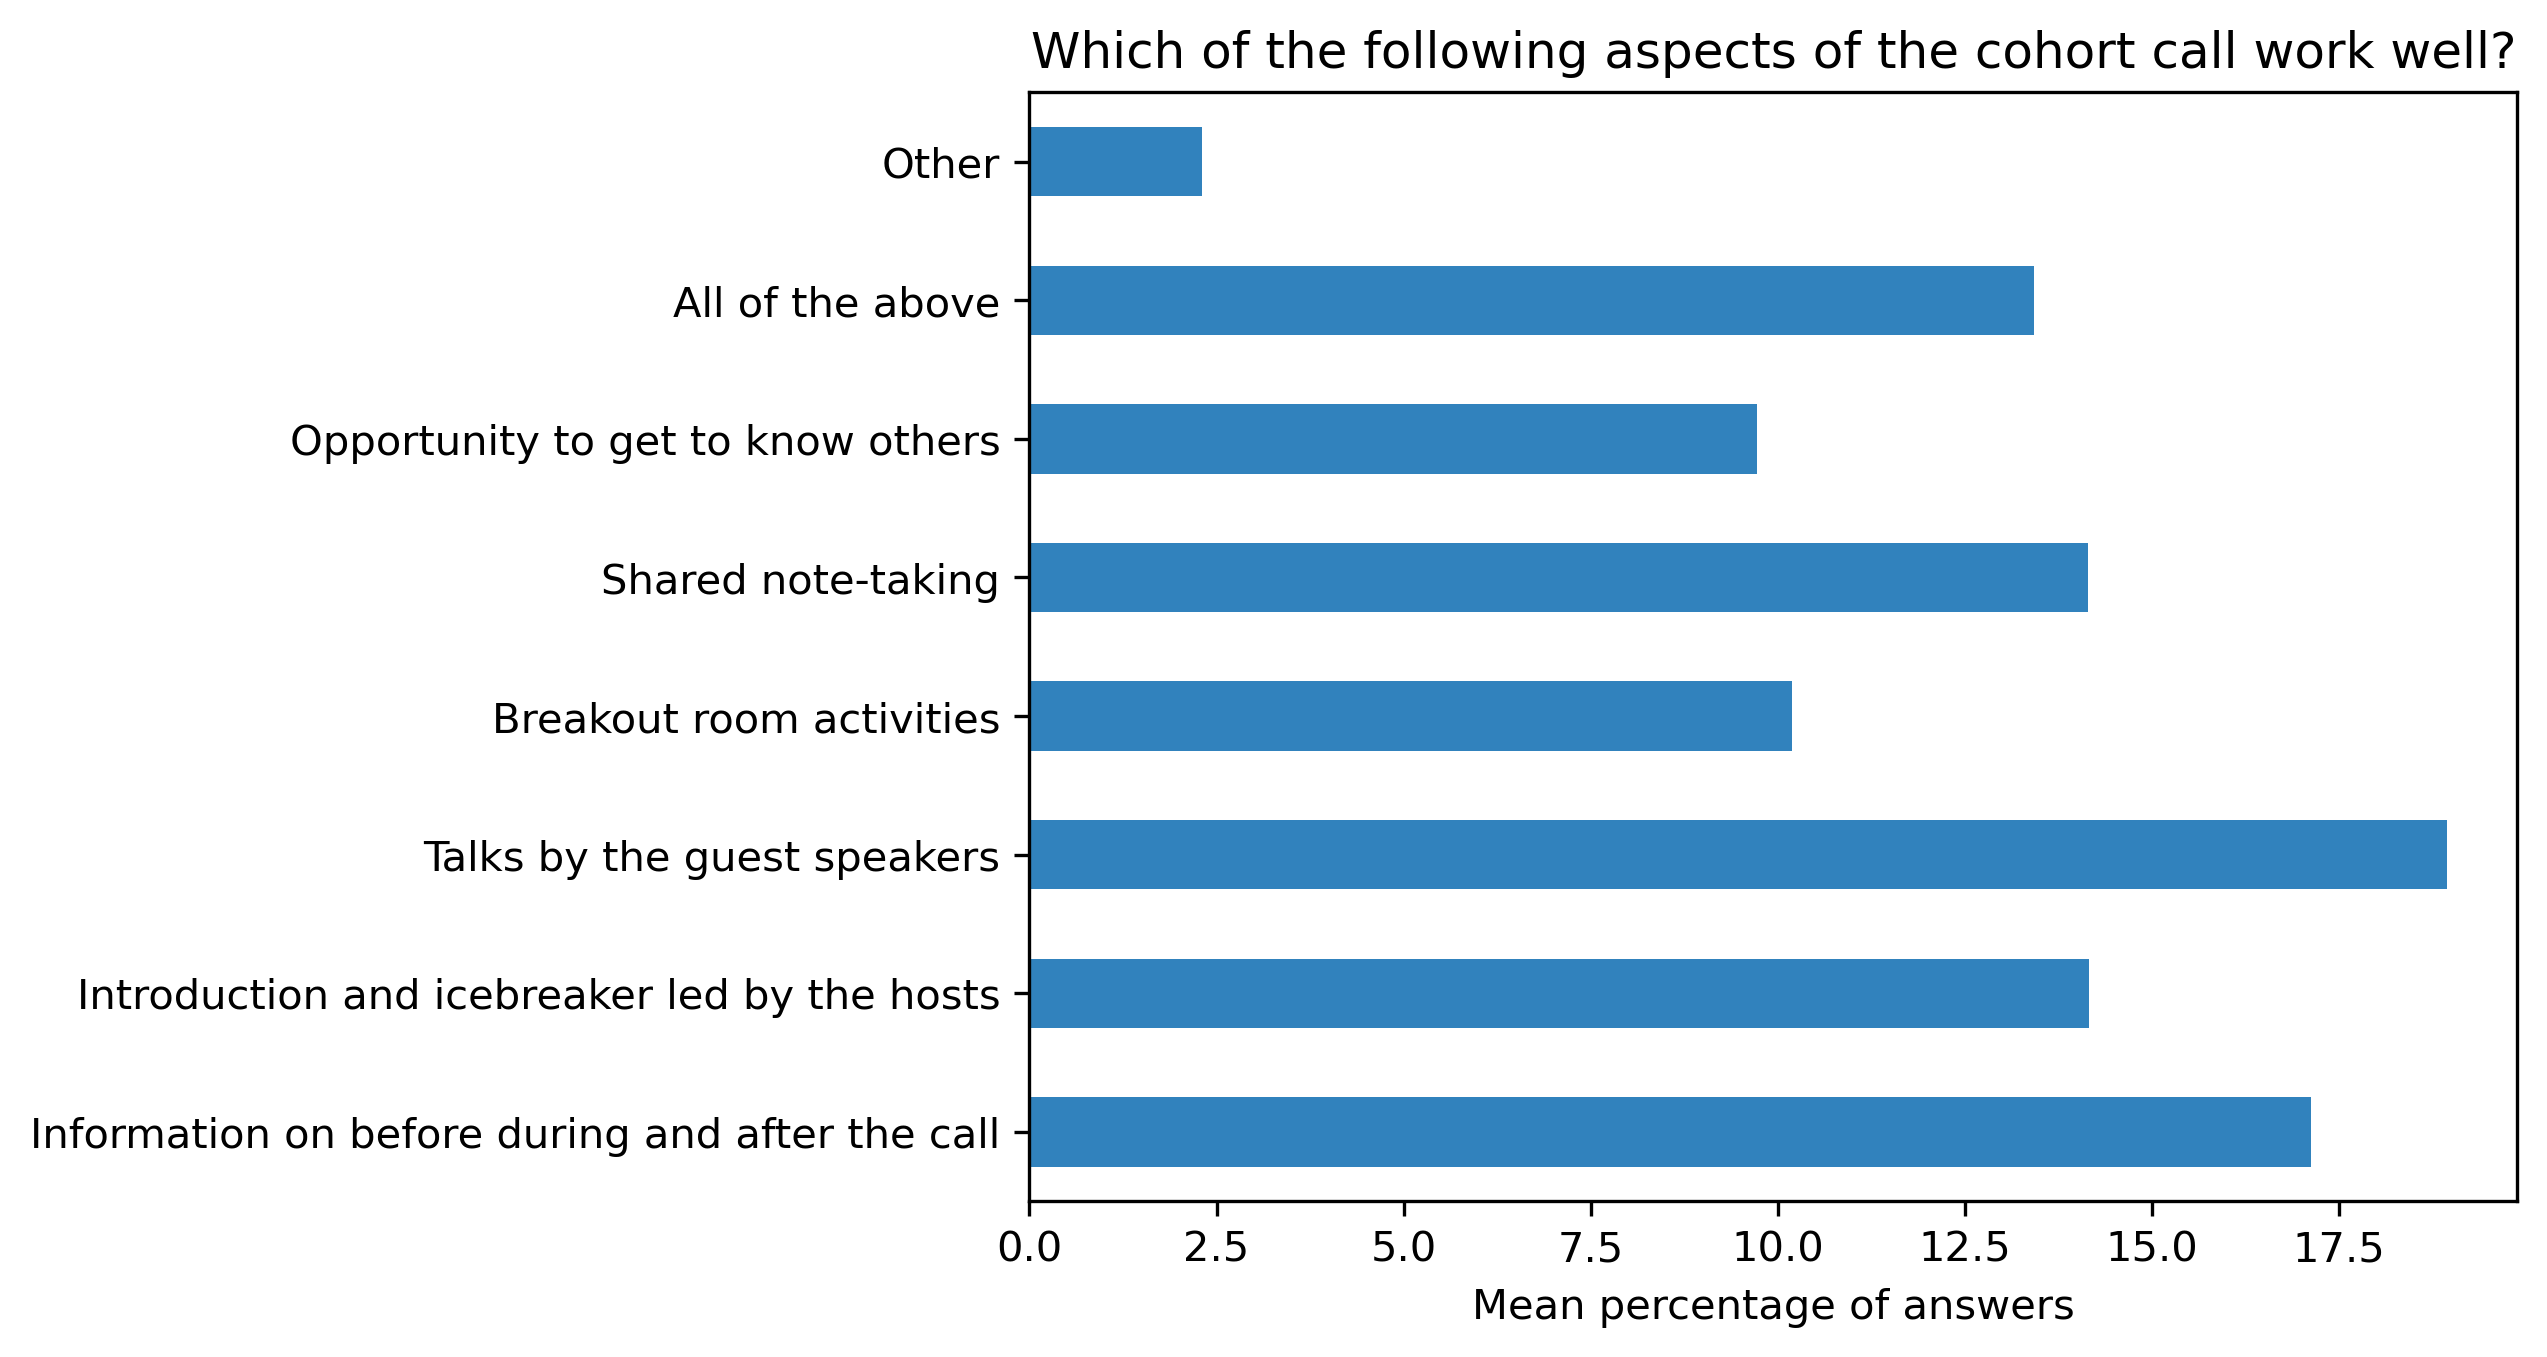

In [20]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q3_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

### Question 4: "What should we improve in cohort calls?"

Possible answers:
- Information on before, during and after the call
- Introduction and icebreaker led by the hosts
- Talks by the guest speakers
- Breakout room activities
- Shared note-taking
- Opportunity to get to know others
- All of the above 

In [21]:
participant_mid_q4 = {}
other_answer = []
col = "Which of the following aspects of the cohort call work well?"
answers = [
    "Information on before during and after the call", 
    "Introduction and icebreaker led by the hosts", 
    "Talks by the guest speakers", 
    "Breakout room activities",
    "Shared note-taking",
    "Opportunity to get to know others",
    "All of the above",
    "Other"]
for c in participant_mid_df:
    participant_mid_q4[c], oa = get_mcq_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q4_df = pd.DataFrame.from_dict(participant_mid_q4)
participant_mid_q4_df

OLS-1  OLS-2  OLS-3  OLS-4  \
Information on before during and after the call     11      7     18      7   
Introduction and icebreaker led by the hosts         8      8     13      5   
Talks by the guest speakers                         11      9     20      7   
Breakout room activities                             9      4      7      4   
Shared note-taking                                  11      4     18      4   
Opportunity to get to know others                    9      5     13      1   
All of the above                                    12      8      5      4   
Other                                                3      1      4      0   

                                                 OLS-5  OLS-6  
Information on before during and after the call     21      5  
Introduction and icebreaker led by the hosts        16      5  
Talks by the guest speakers                         23      6  
Breakout room activities                            11      4  
Shared note-taking                                  16      6  
Opportunity to get to know others                   12      3  
All of the above                                     9      8  
Other                                                1      1

In [22]:
other_answer

['Side chats on twitter by members.',
 "I like the engagement feeling. It's not a webinar where one can fall asleep",
 'Shared insights by the mentor on the answers shared by the mentee',
 "Wasn't the shared note taking on HackMD? It's also on gDocs?",
 'Written breakout room activities',
 'Having spoken and written spaces',
 'Recording the call and making it available on YouTube',
 'Mentorship by mentors',
 'Love the trainings!',
 'calls are recorded so i can watch later (I am in an odd timezone)']

In [23]:
participant_mid_q4_df = 100 * participant_mid_q4_df / participant_mid_q4_df.sum()

Text(0.5, 1.0, 'Which of the following aspects of the cohort call work well?')

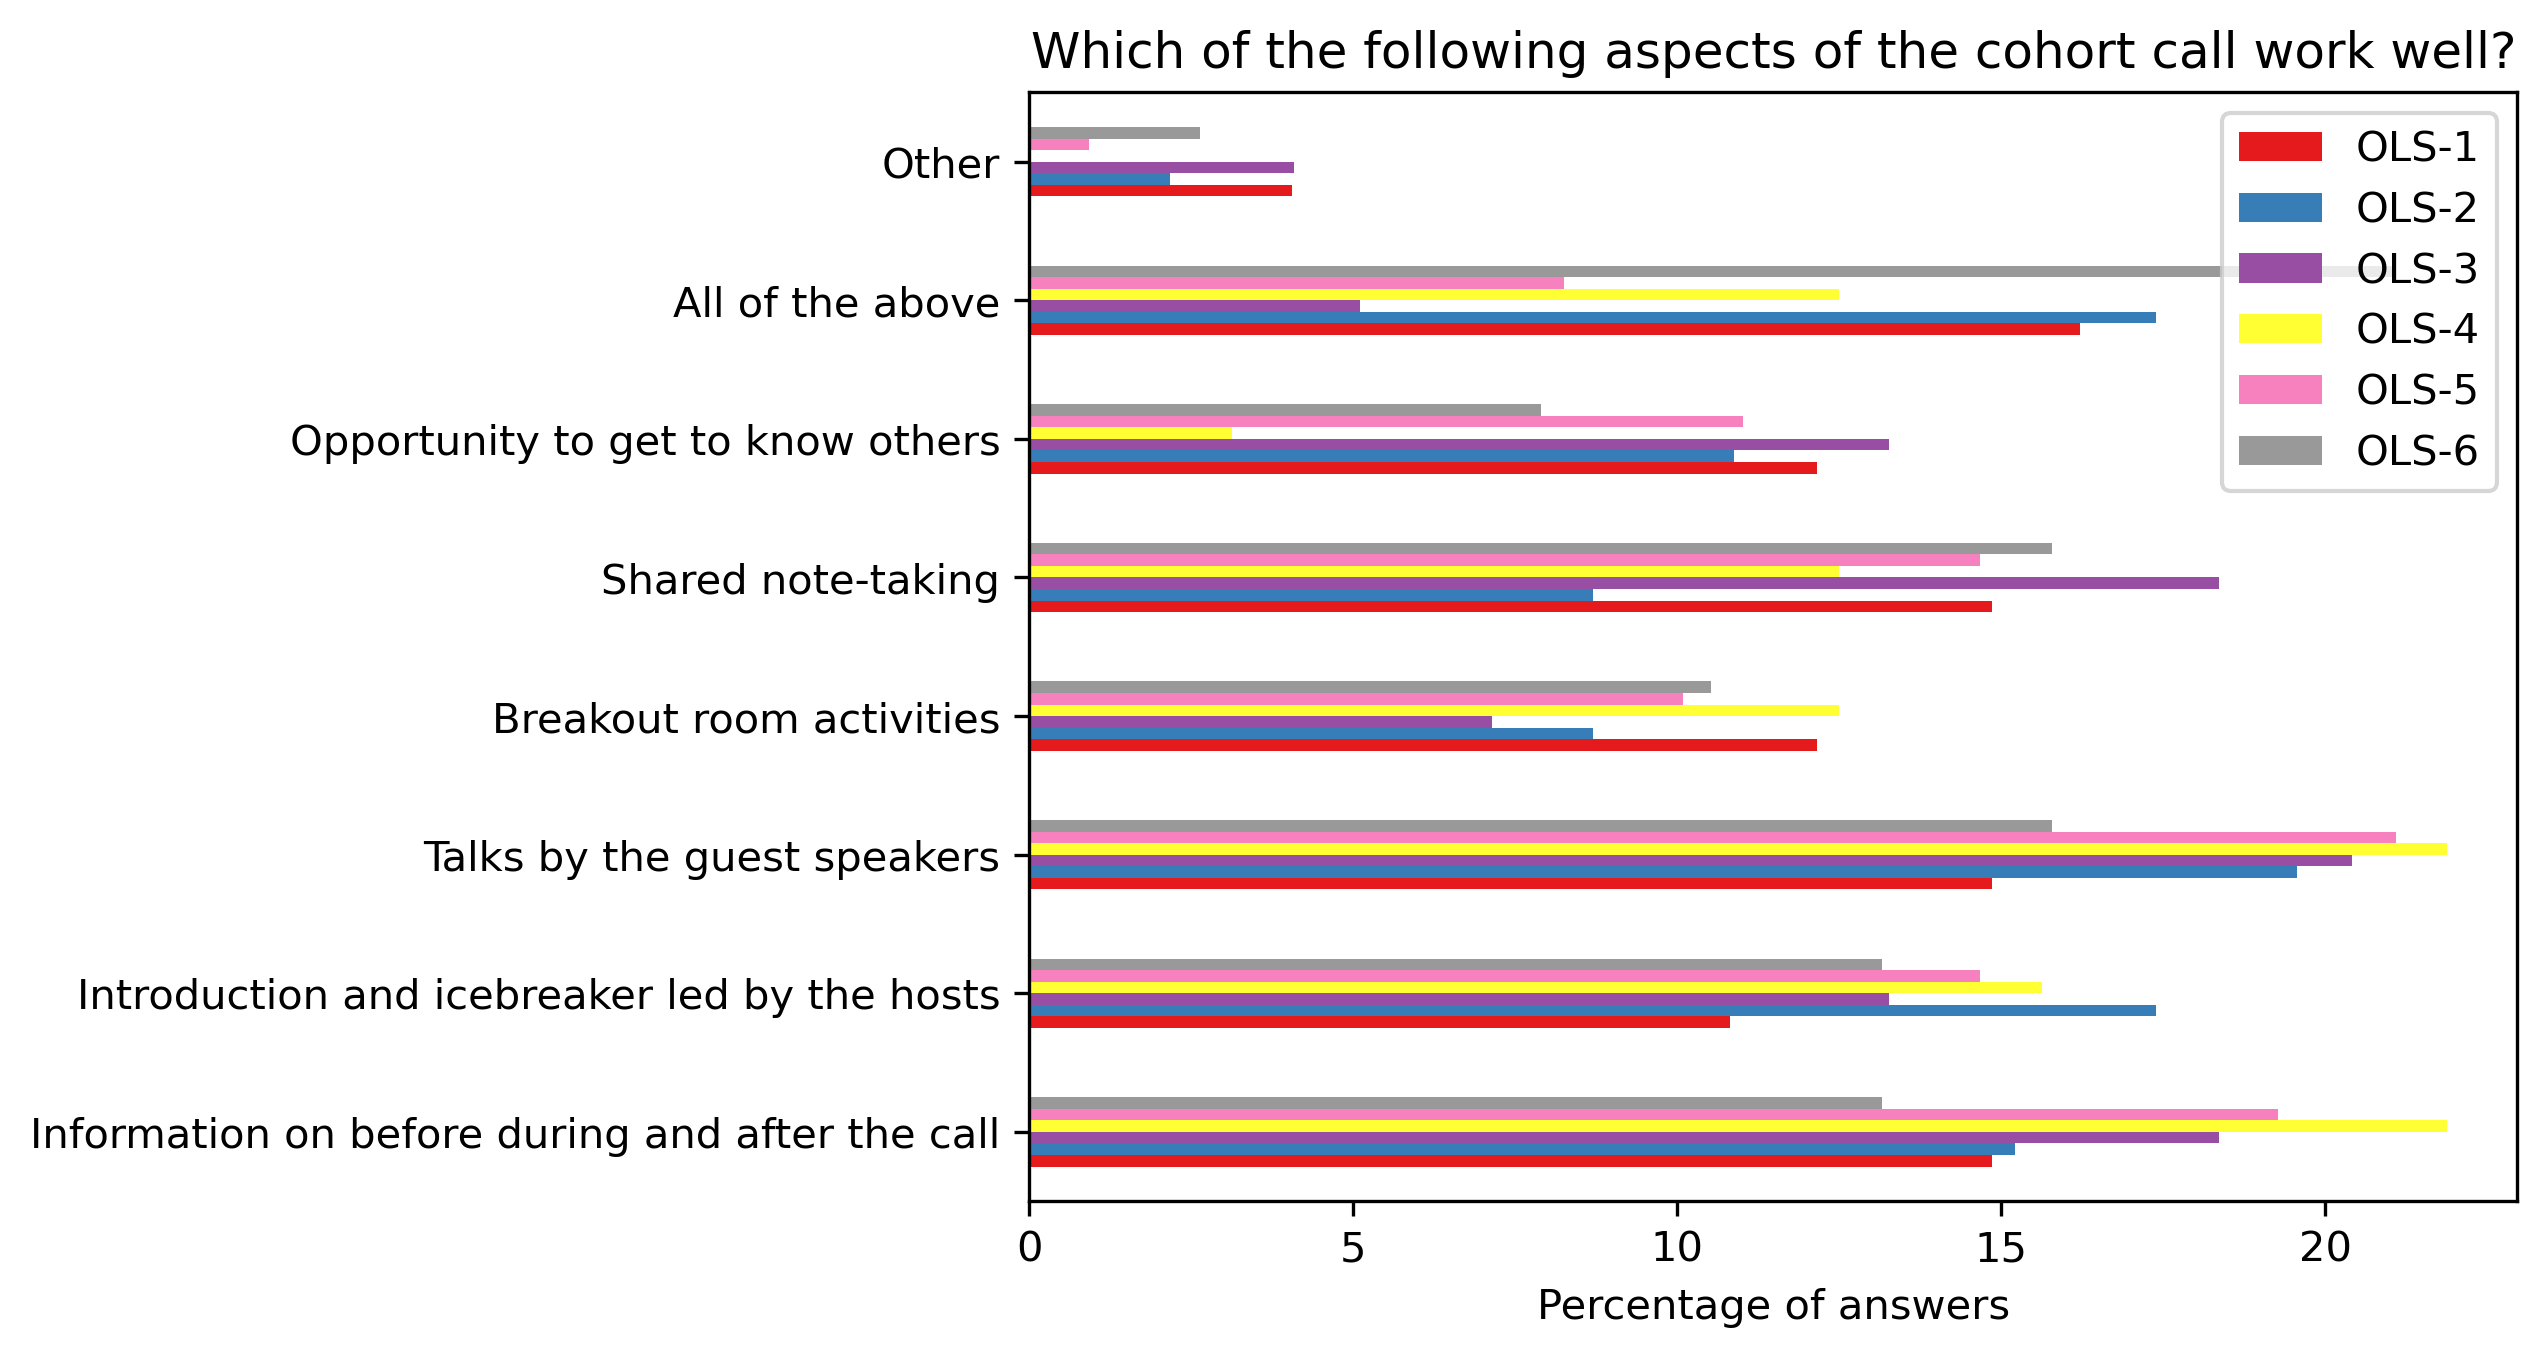

In [24]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q4_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Which of the following aspects of the cohort call work well?')

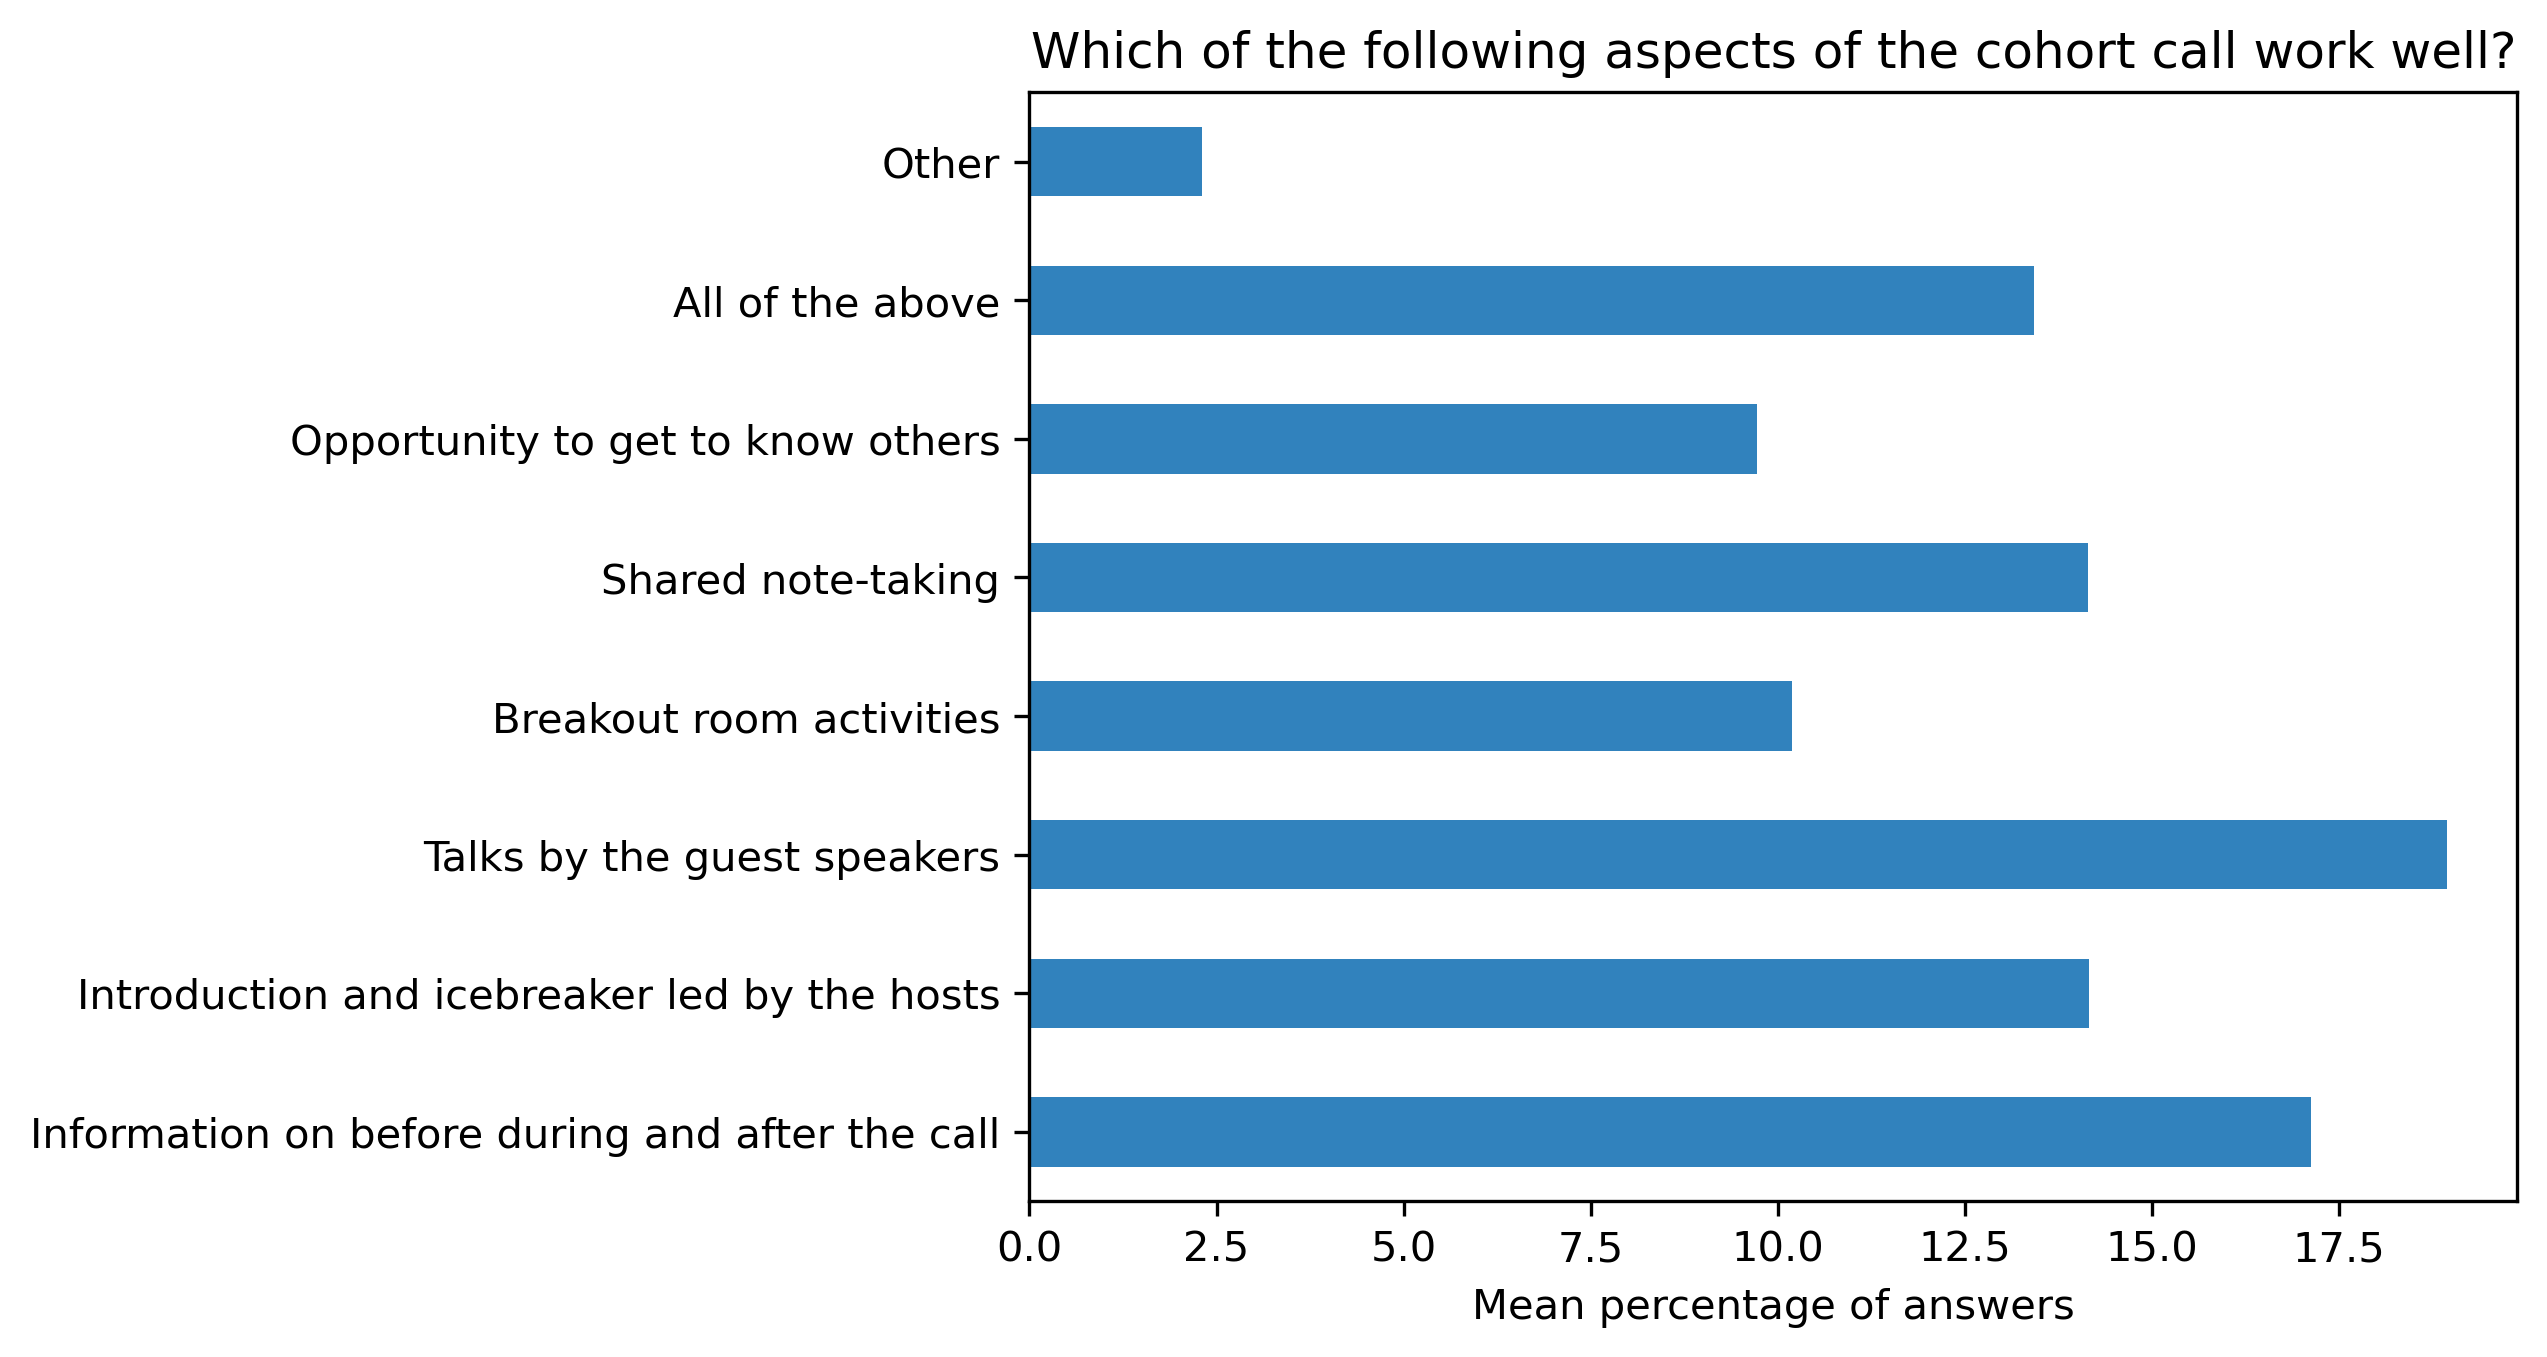

In [25]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q4_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

### Question 5: "Which of the following statements is true regarding the usefulness of the topics introduced at the OLS?"

Possible answers:
- I have been able to use ALL concepts introduced at OLS so far
- I have been able to use MOST concepts introduced at OLS so far
- I have been able to use SOME concepts introduced at OLS so far
- I have been able to use VERY FEW concepts introduced at OLS so far
- I have NOT been able to use any concepts introduced at OLS so far

In [26]:
participant_mid_q5 = {}
other_answer = []
col = "Which of the following statements is true regarding the usefulness of the topics introduced at the OLS?"
answers = [
    "I have been able to use ALL concepts introduced at OLS so far",
    "I have been able to use MOST concepts introduced at OLS so far",
    "I have been able to use SOME concepts introduced at OLS so far",
    "I have been able to use VERY FEW concepts introduced at OLS so far",
    "I have NOT been able to use any concepts introduced at OLS so far",
    "Other"]
for c in participant_mid_df:
    participant_mid_q5[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q5_df = pd.DataFrame.from_dict(participant_mid_q5)
participant_mid_q5_df

OLS-1  OLS-2  OLS-3  \
I have been able to use ALL concepts introduced...      1      0      6   
I have been able to use MOST concepts introduce...     16      9     10   
I have been able to use SOME concepts introduce...      6      6      7   
I have been able to use VERY FEW concepts intro...      0      0      0   
I have NOT been able to use any concepts introd...      0      0      0   
Other                                                   0      0      0   

                                                    OLS-4  OLS-5  OLS-6  
I have been able to use ALL concepts introduced...      0      6      2  
I have been able to use MOST concepts introduce...      8     13      7  
I have been able to use SOME concepts introduce...      3     14      5  
I have been able to use VERY FEW concepts intro...      0      0      0  
I have NOT been able to use any concepts introd...      0      0      0  
Other                                                   0      0      0

In [27]:
other_answer

[]

In [28]:
participant_mid_q5_df = 100 * participant_mid_q5_df / participant_mid_q5_df.sum()

Text(0.5, 1.0, 'Which of the following statements is true regarding the usefulness of the topics introduced at the OLS?')

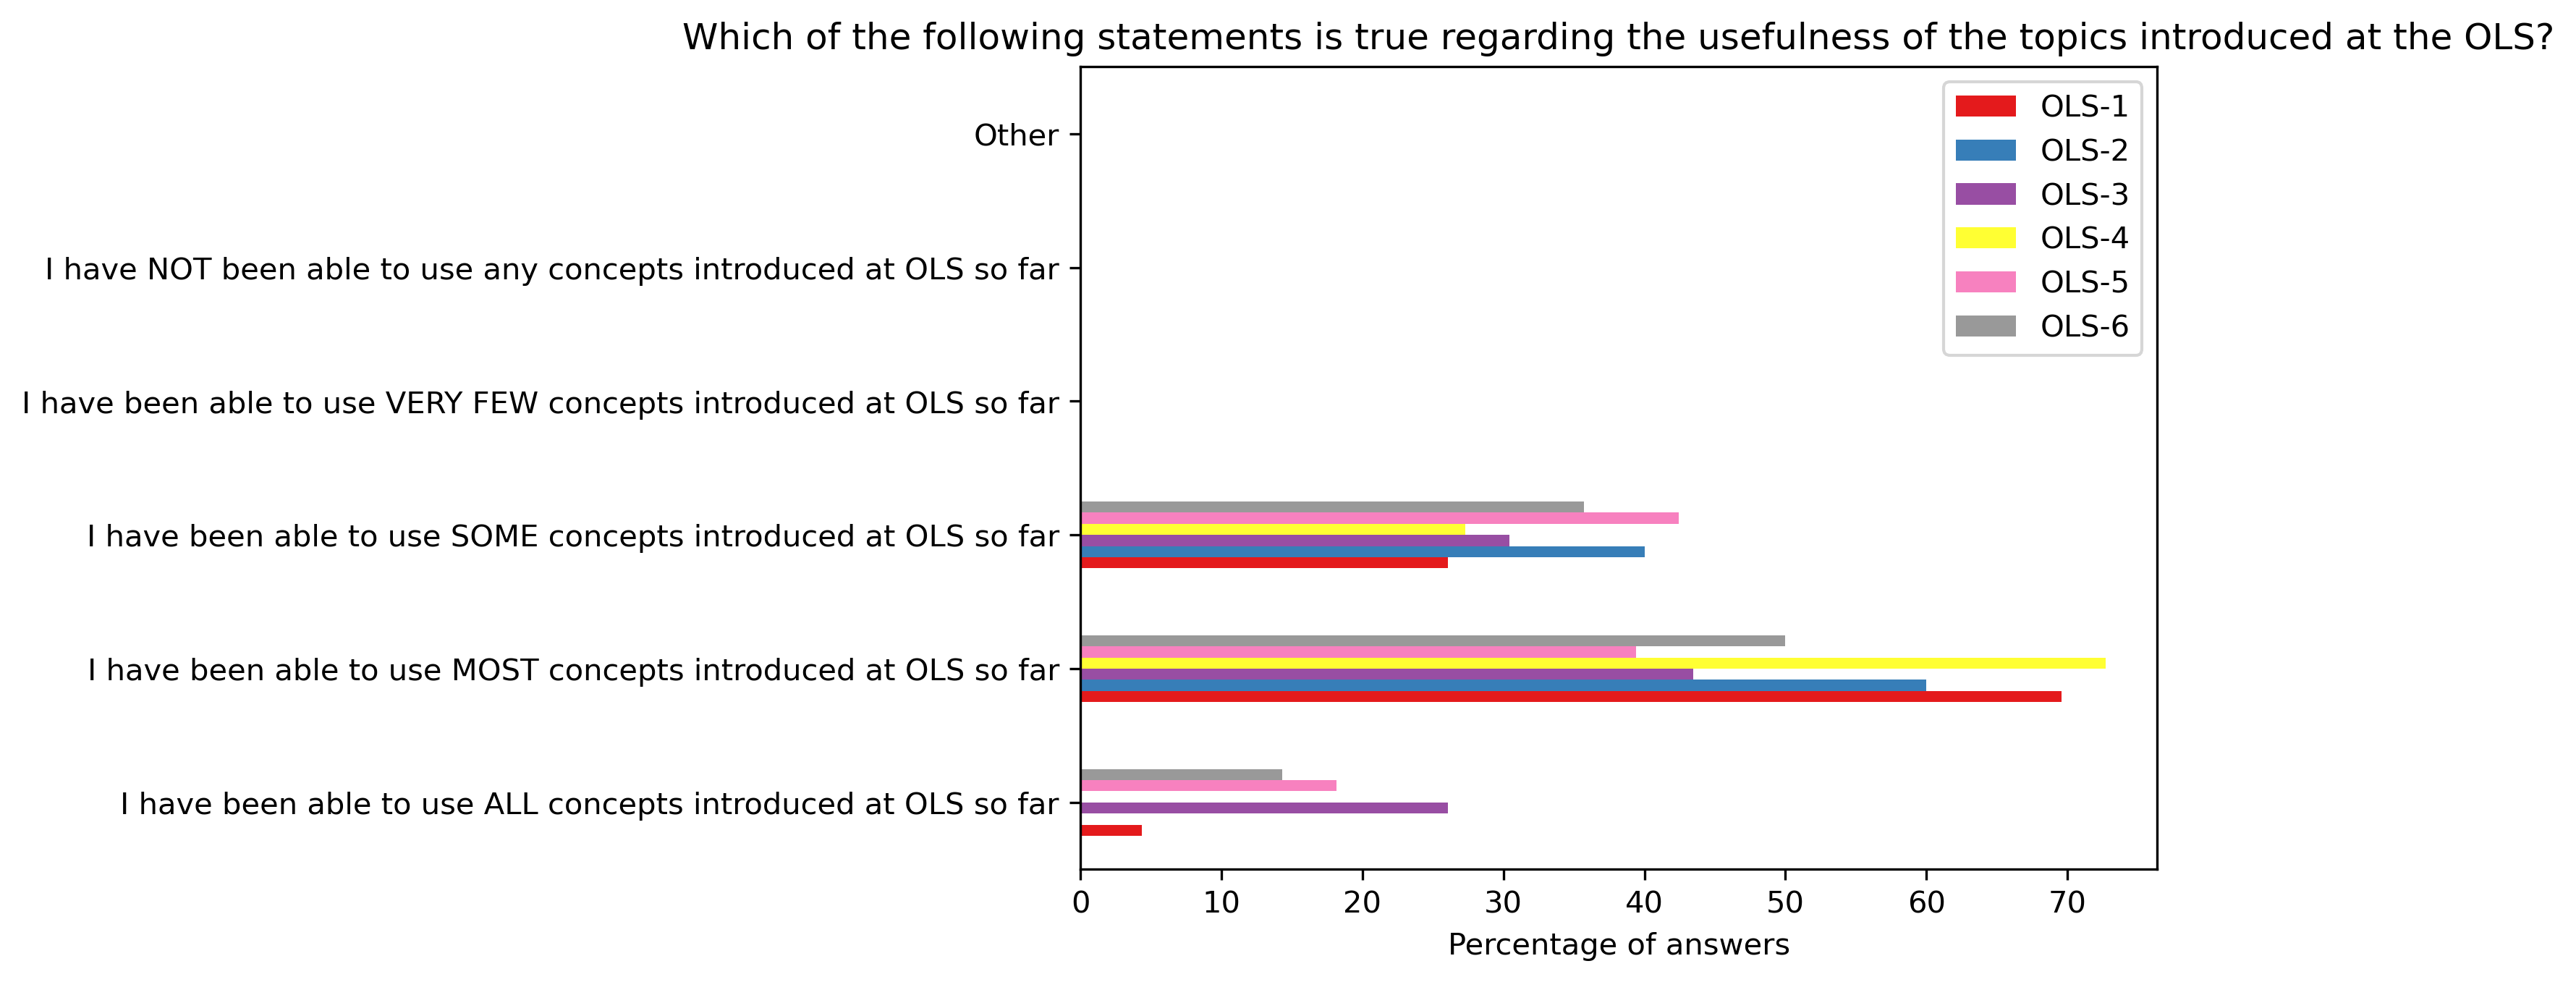

In [29]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q5_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Which of the following statements is true regarding the usefulness of the topics introduced at the OLS?')

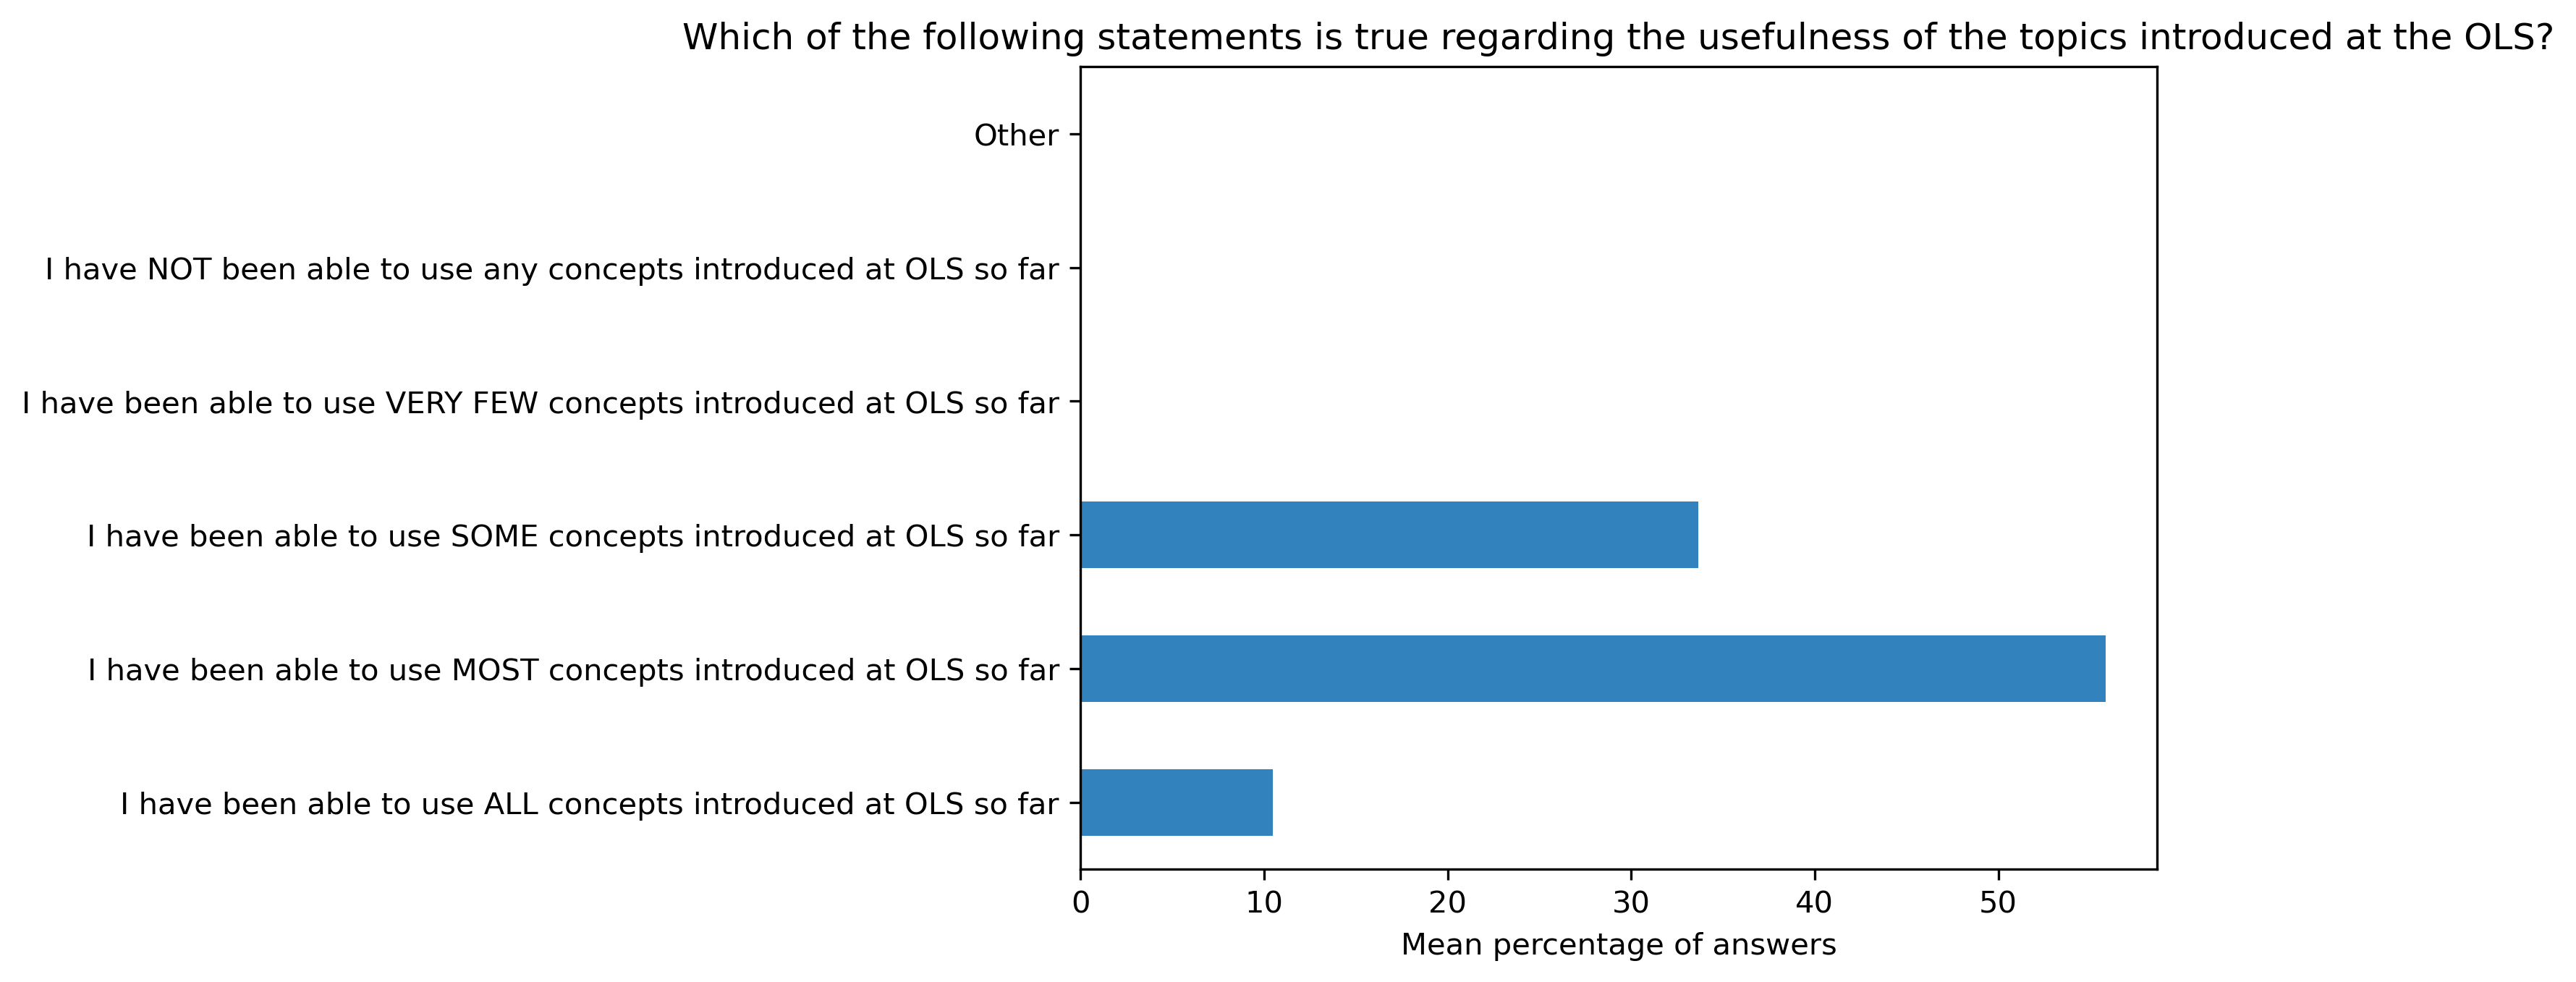

In [30]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q5_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

### Question 6: "How much time do you spend on assignments on average? (not meetings)"

Possible answers:
- <1 hour / week
- 1-2 hours / week
- 2-3 hours / week
- 3+ hours / week

In [31]:
participant_mid_q6 = {}
other_answer = []
col = "How much time do you spend on assignments on average? (not meetings)"
answers = [
    "<1 hour / week",
    "1-2 hours / week",
    "2-3 hours / week",
    "3+ hours / week",
    "Other"]
for c in participant_mid_df:
    participant_mid_q6[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q6_df = pd.DataFrame.from_dict(participant_mid_q6)
participant_mid_q6_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
<1 hour / week        7      0      5      2      6      1
1-2 hours / week      8      8     11      7     20      9
2-3 hours / week      4      2      4      2      4      0
3+ hours / week       1      4      2      0      2      3
Other                 3      1      1      0      1      1

In [32]:
other_answer

['I usually read more on the assignments and materials during my free hours. I am not sure how many hours I spend on them though.',
 "As I'm severely behind schedule with my project work at the moment (extensive work travelling followed by the current chaotic situation), I can't answer this and the previous question reliably. I'm sure I'll use (almost) ALL the concepts introduced as soon as I'll manage catching up. I've been spending 0-2 hours / week with the assignments, but I would have needed / will need much more time to keep up.",
 '1-2 hours / week the weeks before situation got crazy in Spain (first week of March)',
 "Hard to say as some weeks were a lot and then some weeks I didn't do the homeworks",
 '1 hr / week sometimes + <1 hr / week some time depending upon the commitments or assignments',
 '',
 '"some" hours when I can, unfortunately not on a regular basis']

In [33]:
participant_mid_q6_df = 100 * participant_mid_q6_df / participant_mid_q6_df.sum()

Text(0.5, 1.0, 'How much time do you spend on assignments on average? (not meetings)')

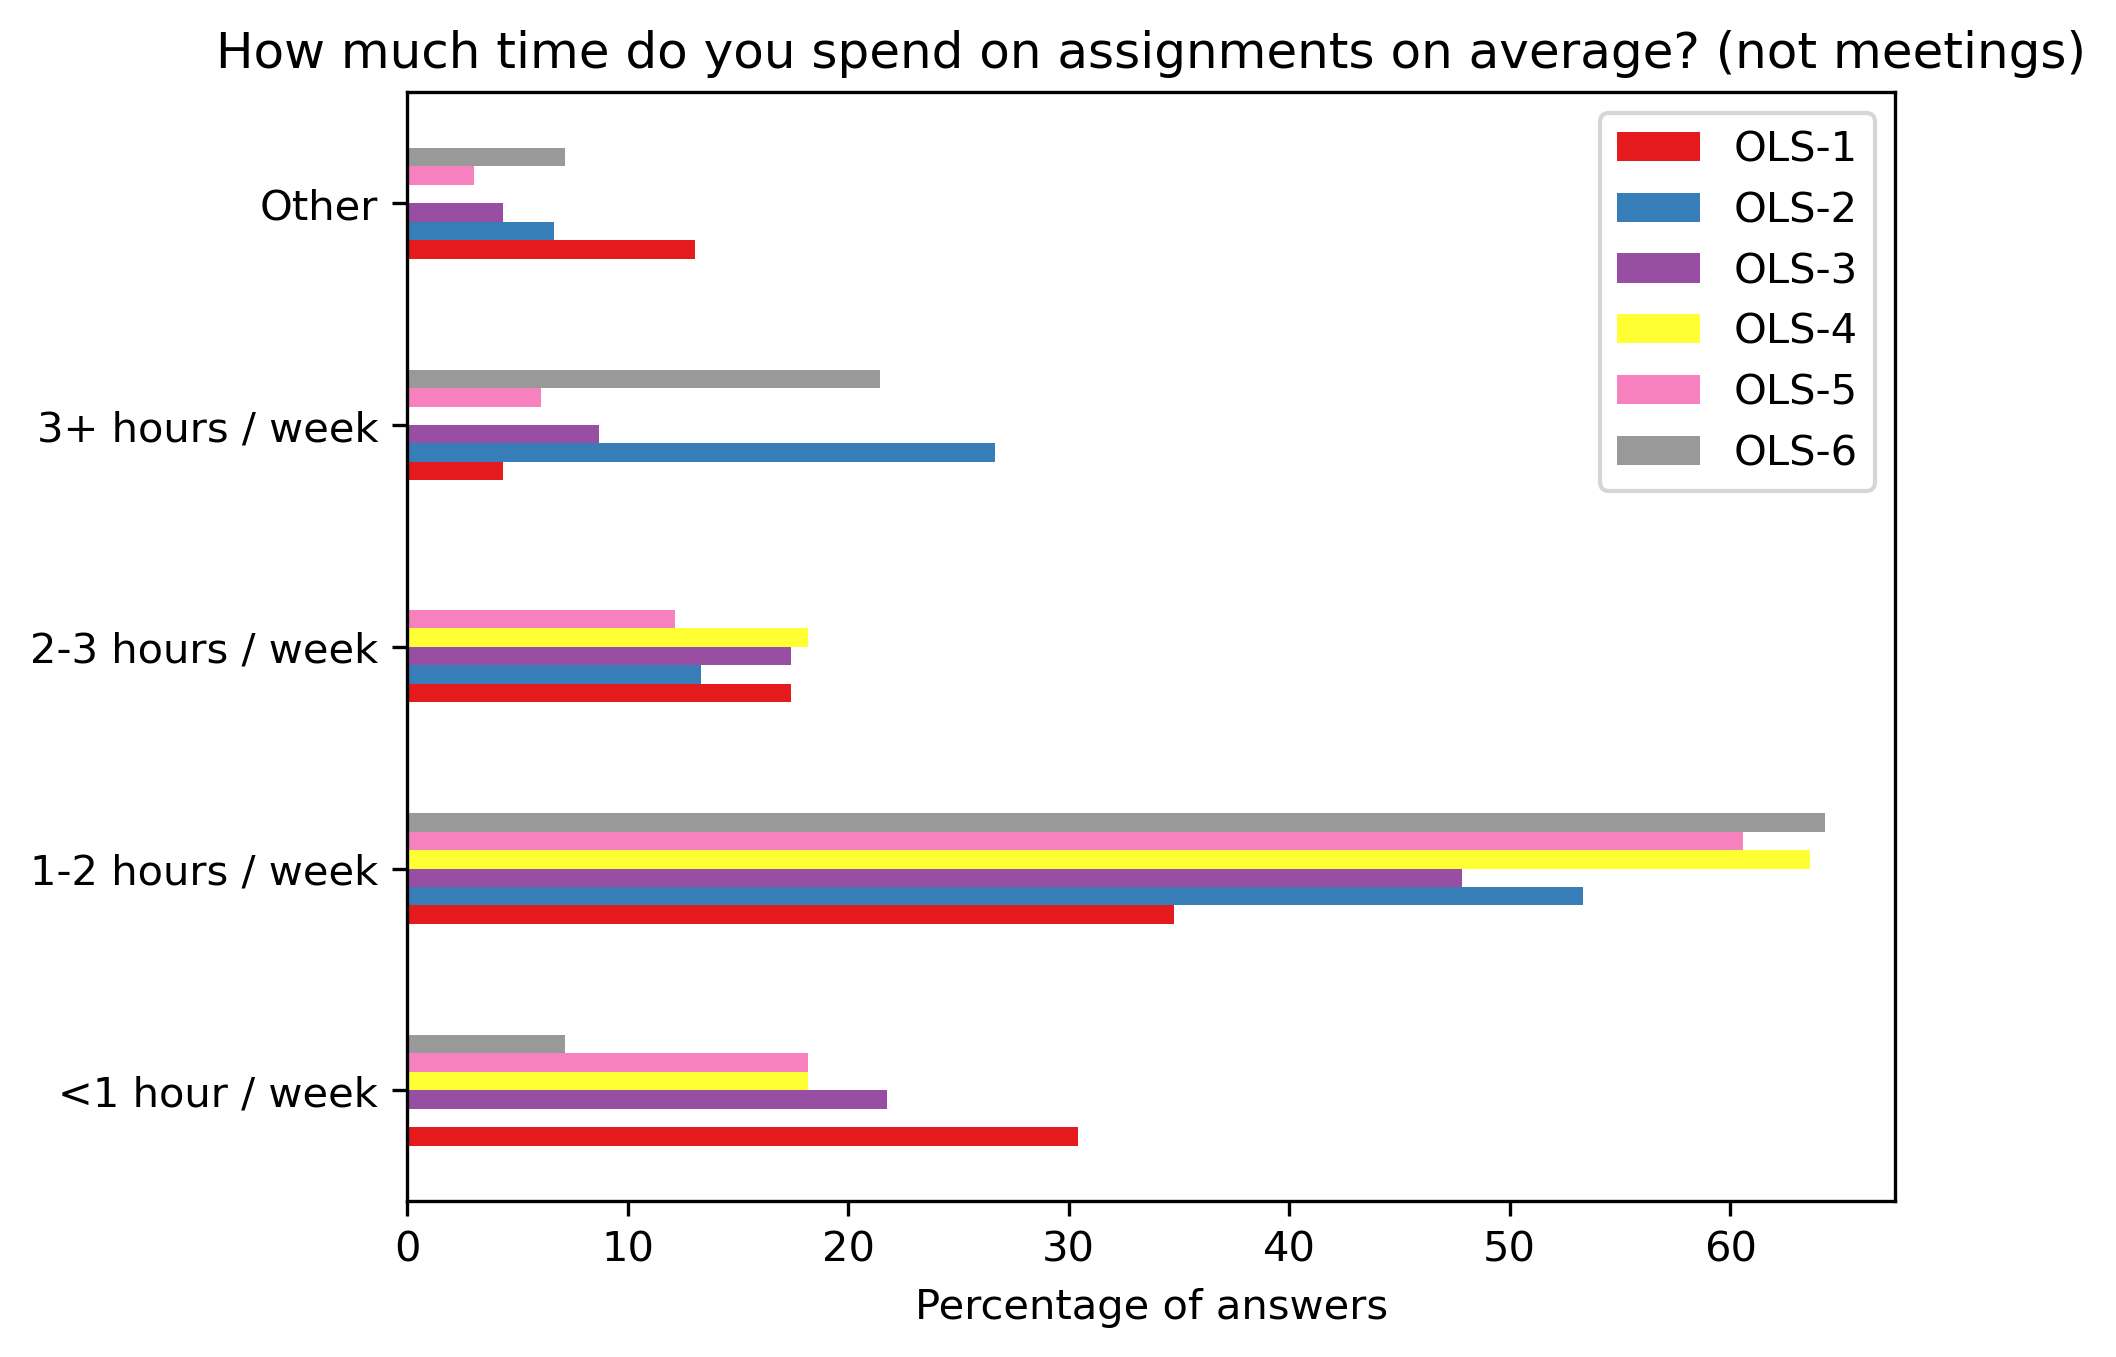

In [34]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q6_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How much time do you spend on assignments on average? (not meetings)')

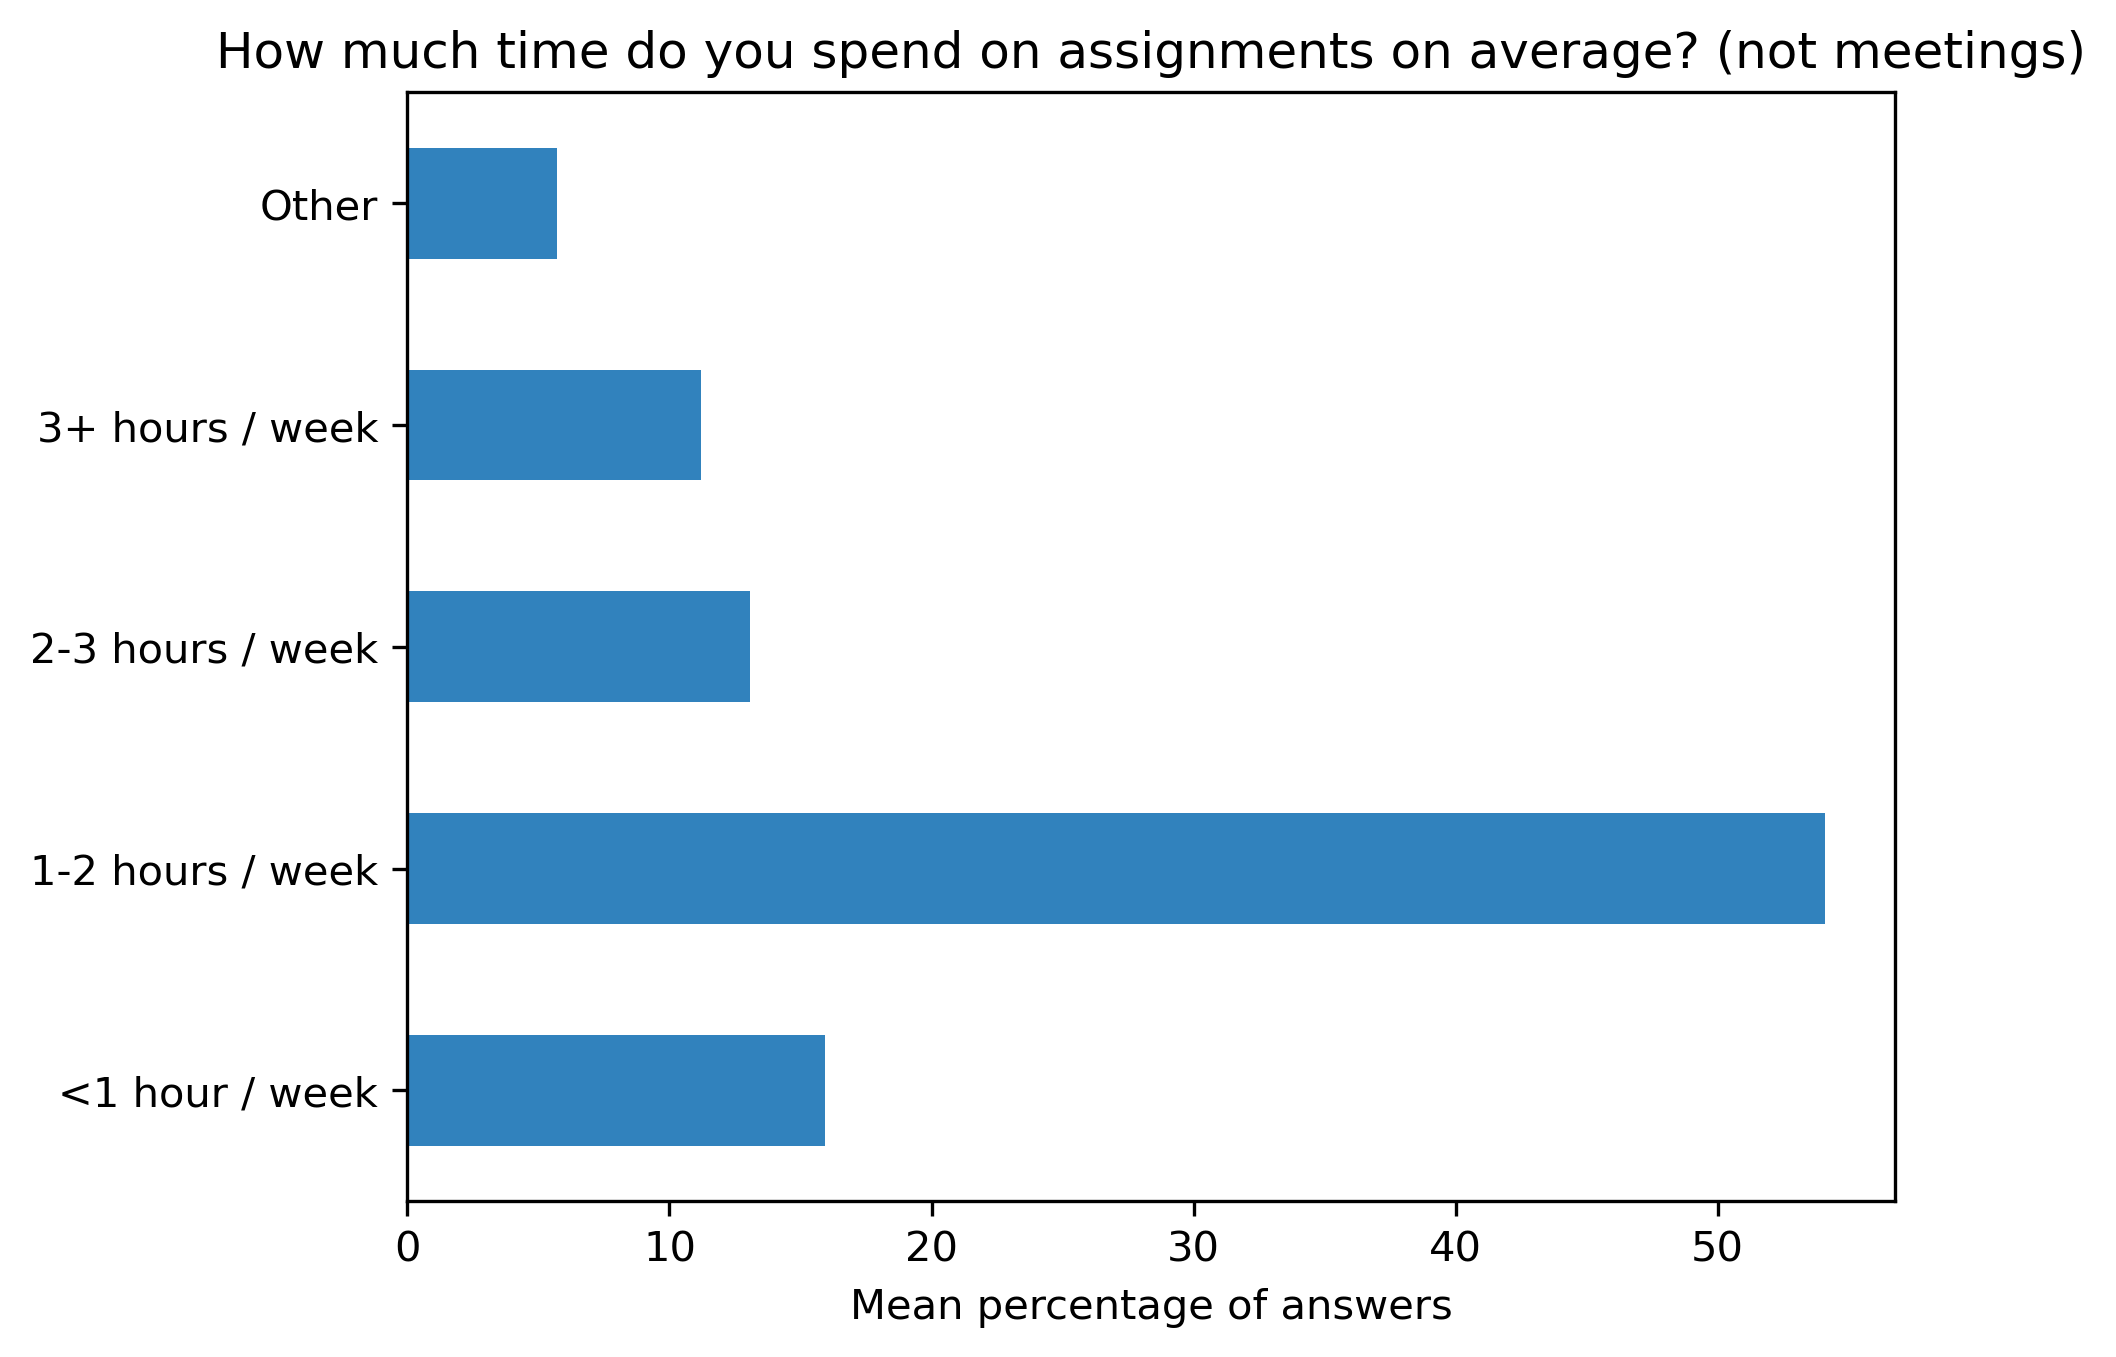

In [35]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q6_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

### Question 7: "Which of the following mode of communication you find most effective?"

Possible answers:
- Weekly emails from the organisers
- Slack channels to connect with others
- Google groups for tracking weekly information
- Website with links to various resources
- All of the above

In [36]:
participant_mid_q7 = {}
other_answer = []
col = "Which of the following mode of communication you find most effective?"
answers = [
    "Weekly emails from the organisers",
    "Slack channels to connect with others",
    "Google groups for tracking weekly information",
    "Website with links to various resources",
    "All of the above",
    "Other"]
for c in participant_mid_df:
    participant_mid_q7[c], oa = get_mcq_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q7_df = pd.DataFrame.from_dict(participant_mid_q7)
participant_mid_q7_df

OLS-1  OLS-2  OLS-3  OLS-4  \
Weekly emails from the organisers                 17     11     20     11   
Slack channels to connect with others              0      0      9      6   
Google groups for tracking weekly information      5      3      3      0   
Website with links to various resources           11      9     13      5   
All of the above                                   5      0      1      0   
Other                                              8      5      0      2   

                                               OLS-5  OLS-6  
Weekly emails from the organisers                 25      8  
Slack channels to connect with others             18      3  
Google groups for tracking weekly information      3      0  
Website with links to various resources           14      2  
All of the above                                   5      5  
Other                                              2      0

In [37]:
other_answer

['Gitter channel to connect with others',
 'I think there might be too many methods of communication about OLS? Sometimes I have a hard time finding information about something specific',
 "especially if it's in a Google Doc from a cohort call. ",
 'Slack channel',
 'Slack',
 'Slack instead of Gitter',
 'youtube recorded cohort-calls',
 "I didn't use Gitter nor the Google Groups. Slack is pretty useful and the weekly emails too. The website & GitHub are helpful as well.",
 'I miss some live/online meetings to get to know people',
 'not via tools.',
 'Review notes from mentor mentors',
 '']

In [38]:
participant_mid_q7_df = 100 * participant_mid_q7_df / participant_mid_q7_df.sum()

Text(0.5, 1.0, 'Which of the following mode of communication you find most effective?')

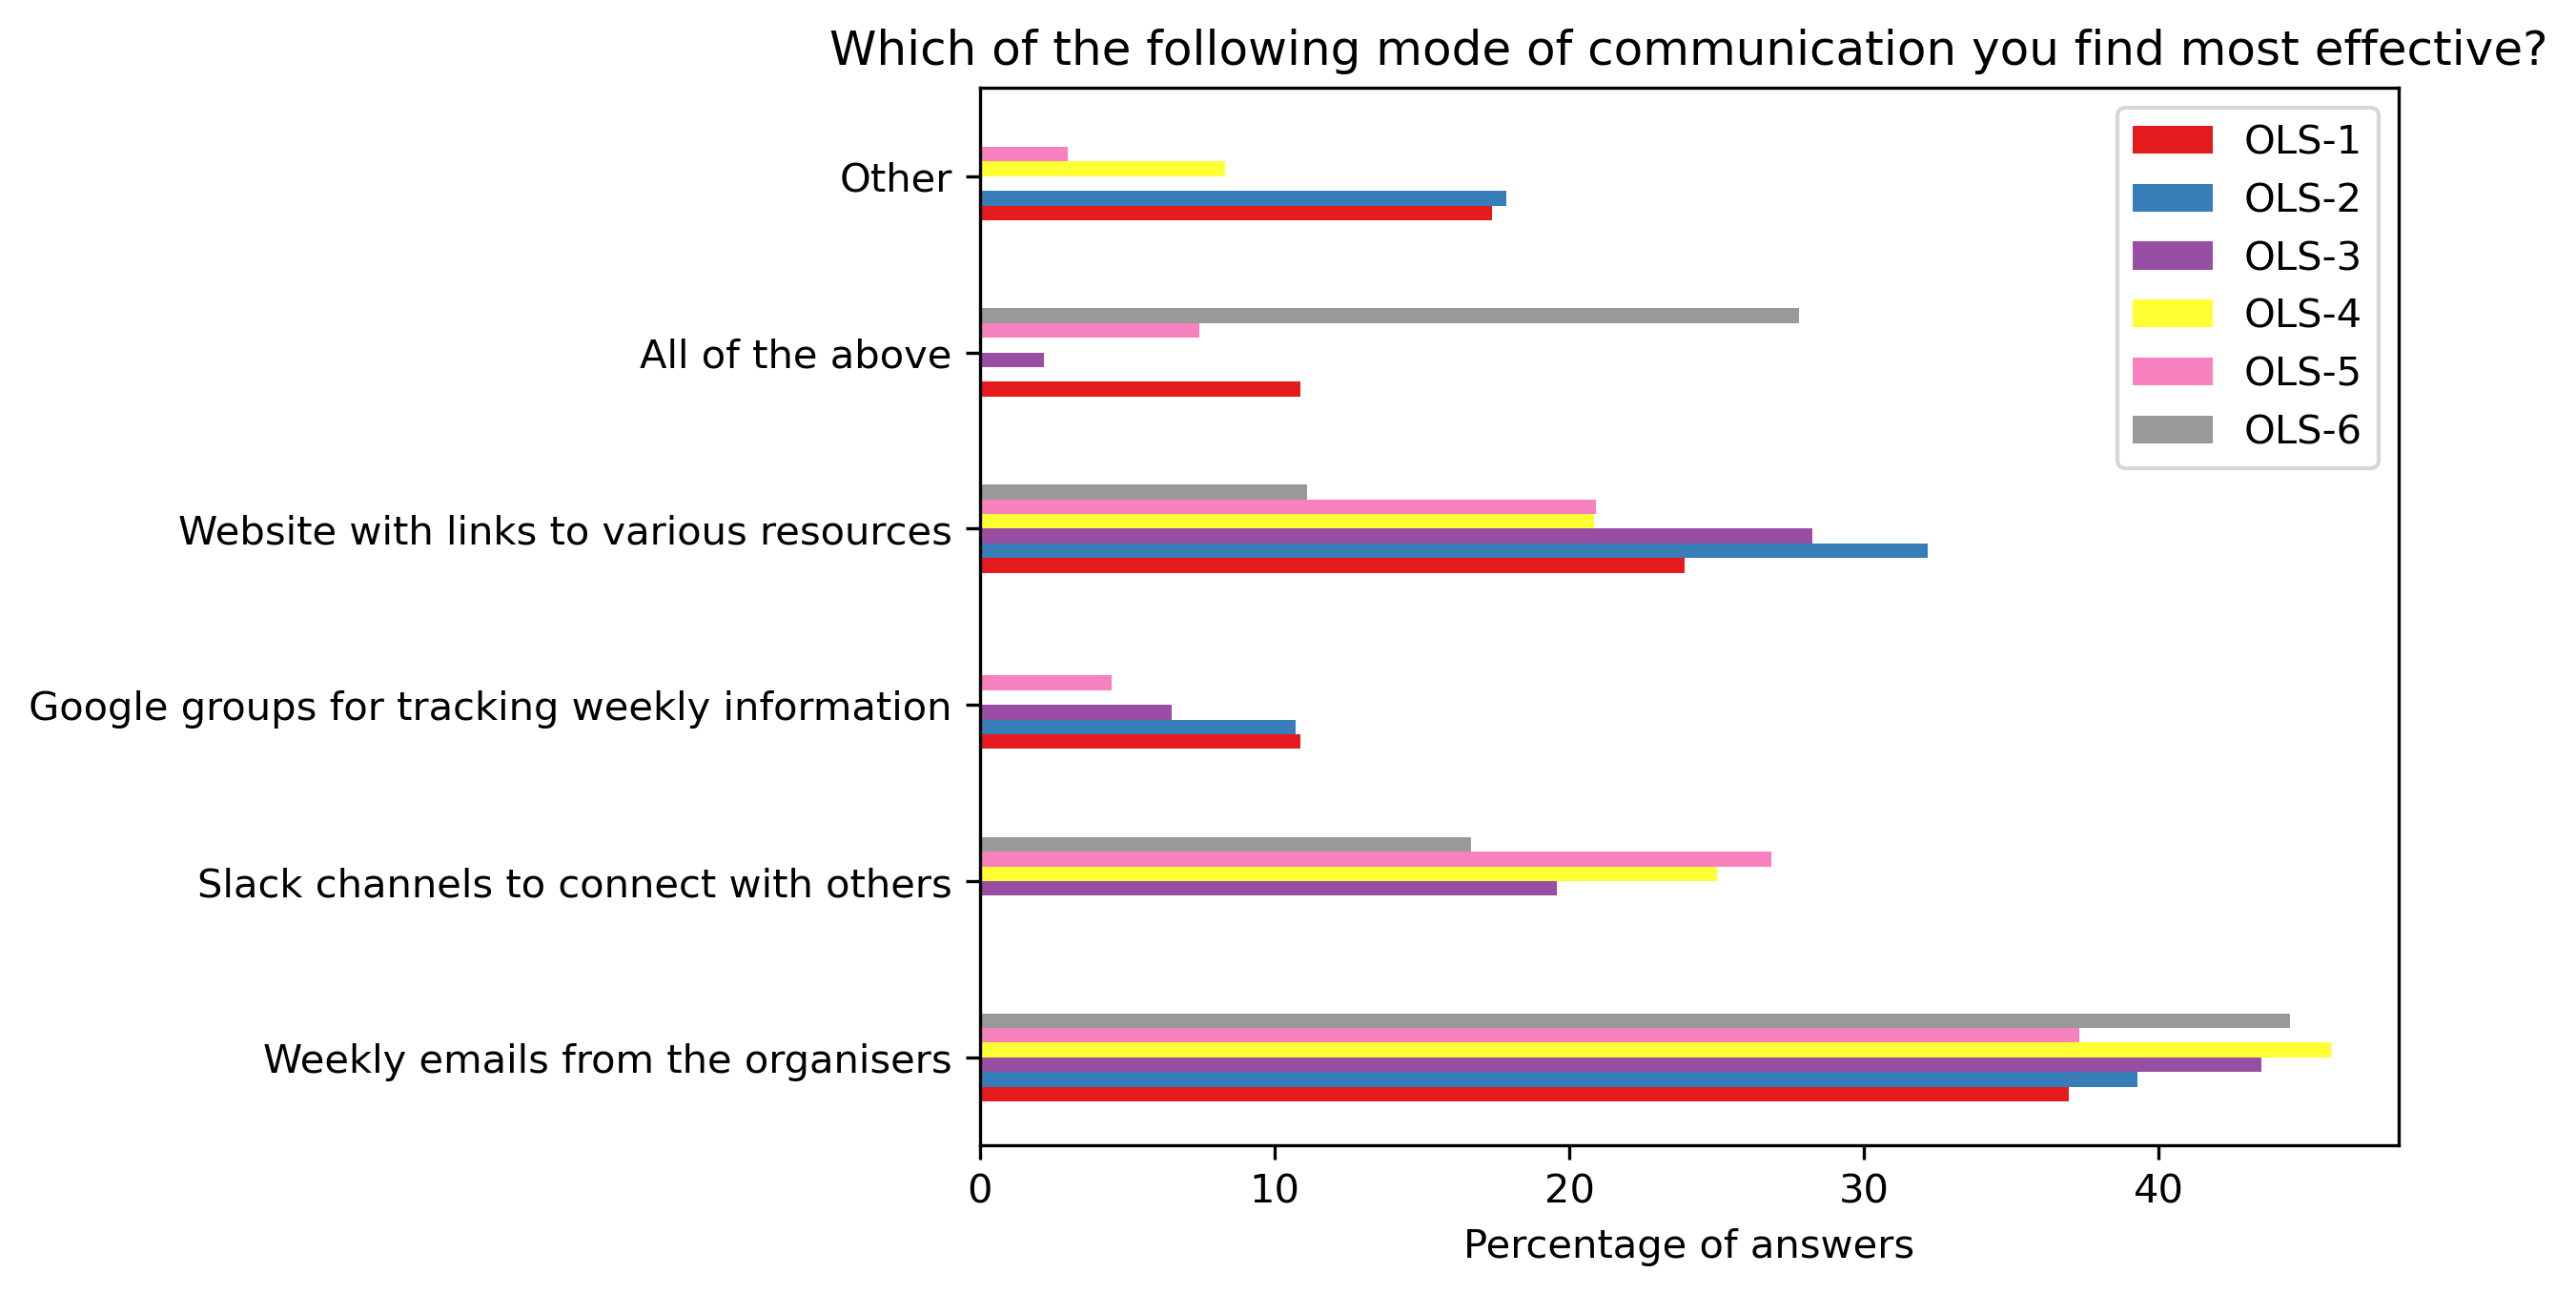

In [39]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q7_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Which of the following mode of communication you find most effective?')

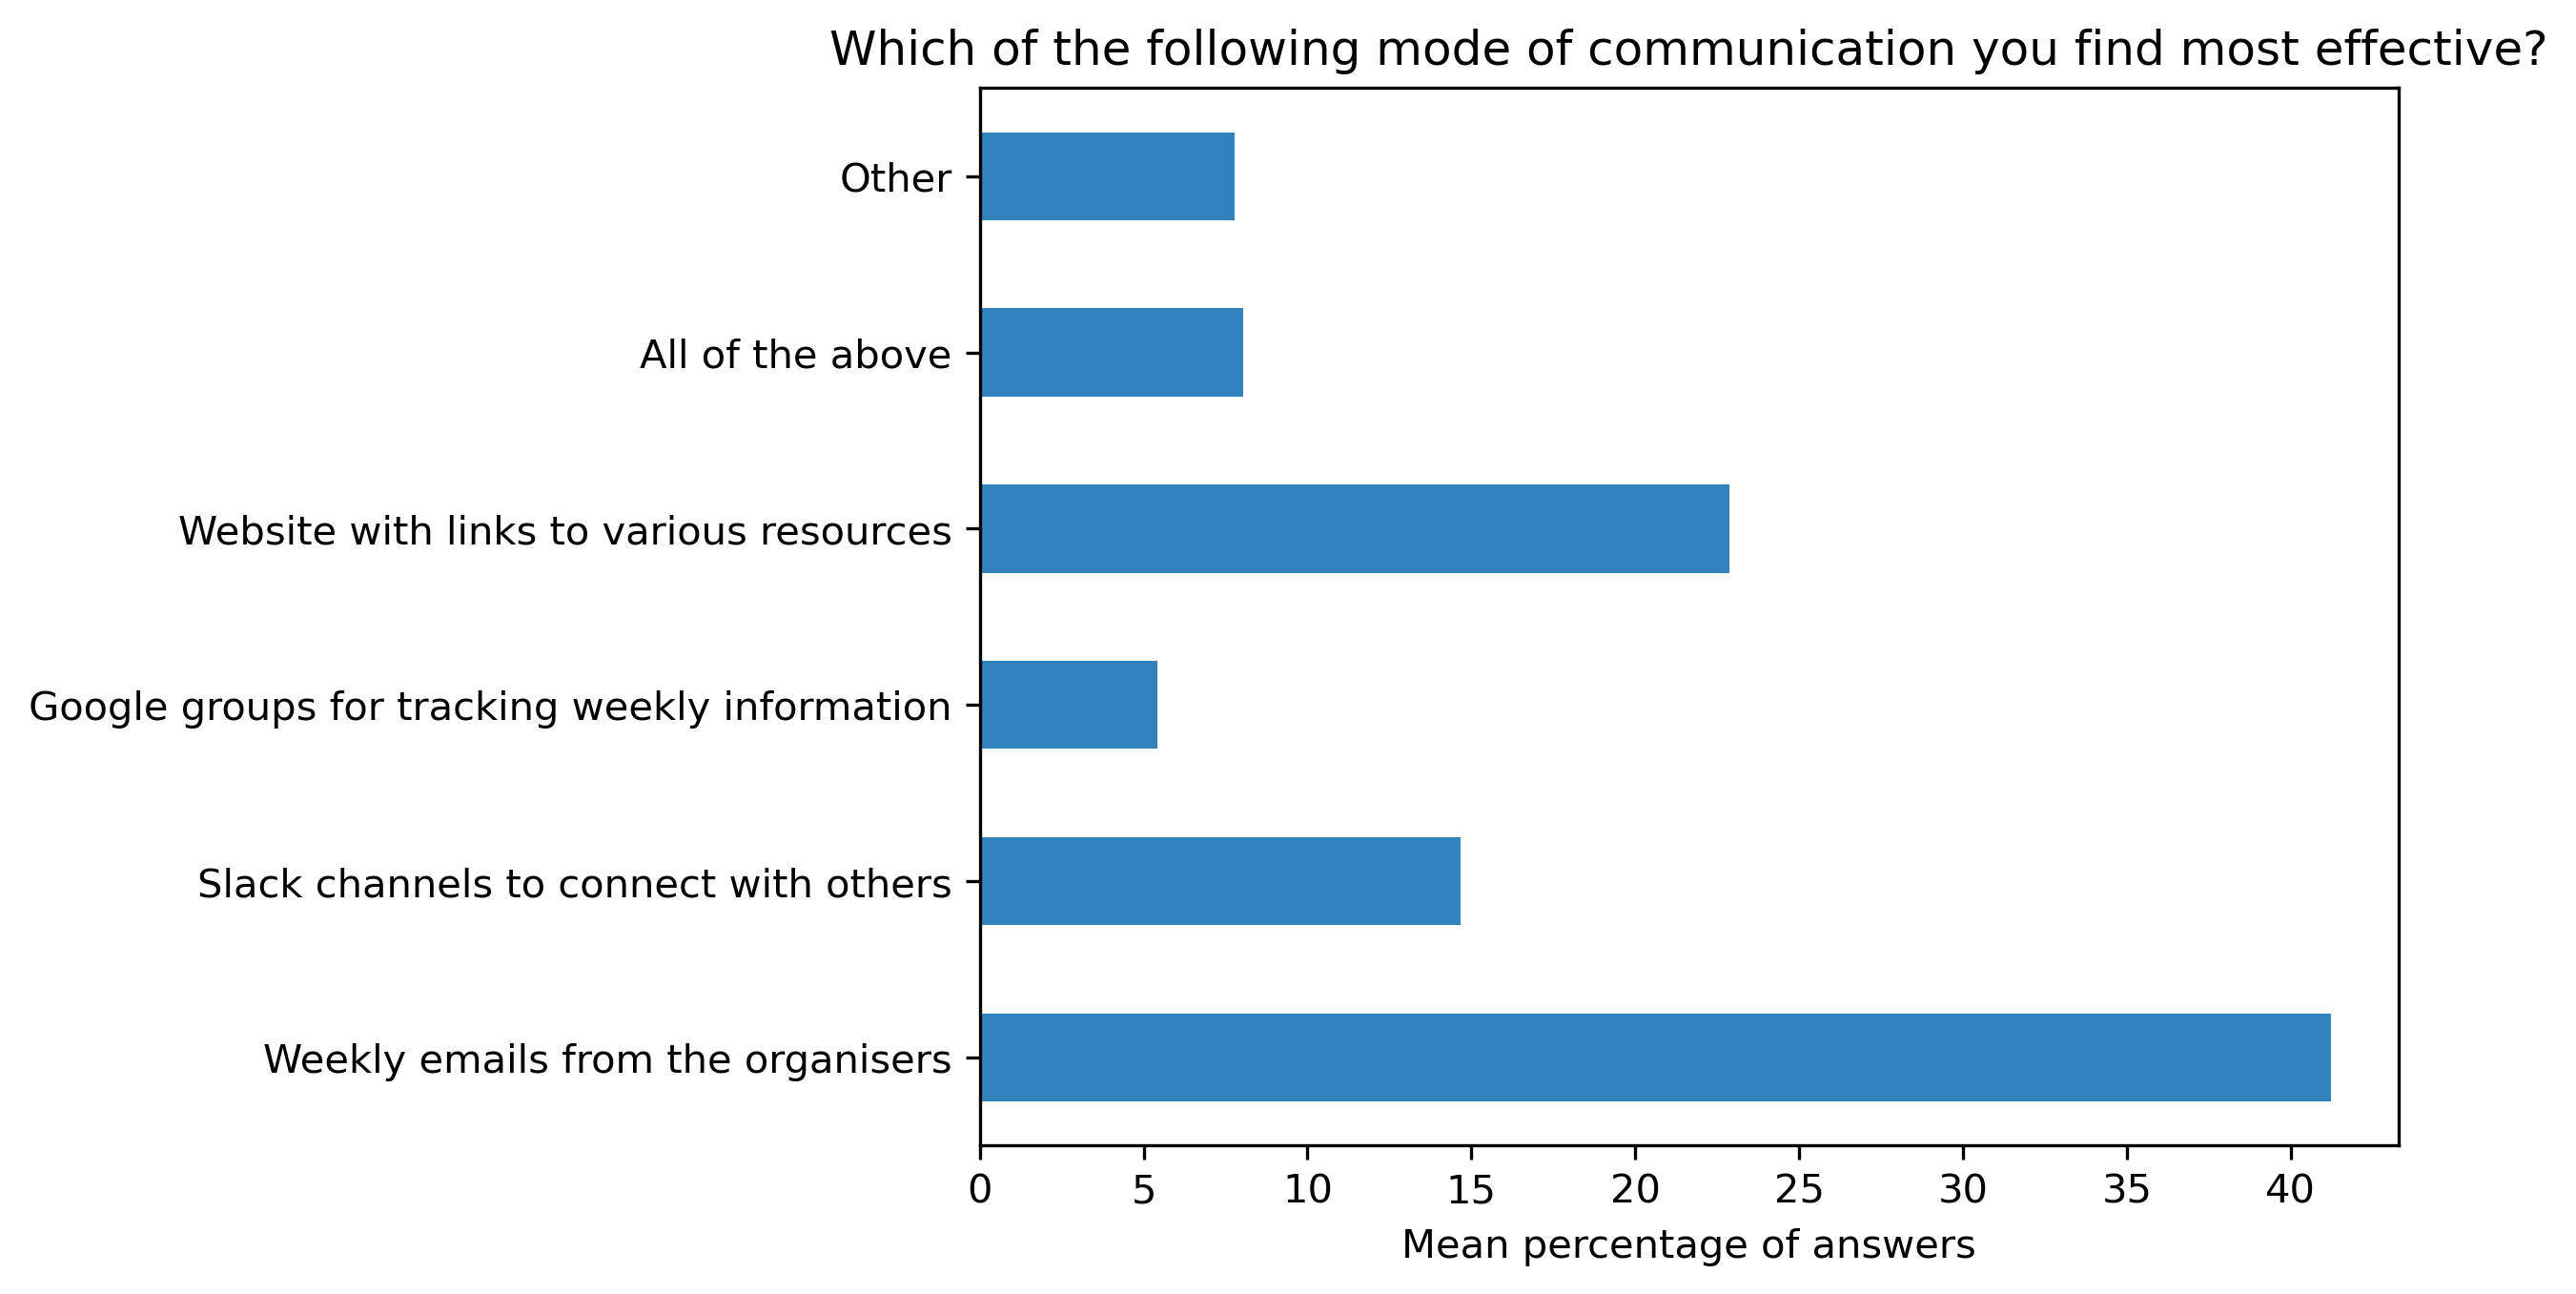

In [40]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q7_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

### Question 8: "How many cohort calls have been able to attend or watch in this round?"

Possible answers:
- I have attended all the cohort calls so far
- I have attended 1-2 cohort calls, and watched the missed call on YouTube
- I watched all the cohort calls on YouTube, but have not attended any call so far
- I have yet to watch all the cohort call videos

In [41]:
participant_mid_q8 = {}
other_answer = []
col = "How many cohort calls have been able to attend or watch in this round?"
answers = [
    "I have attended all the cohort calls so far",
    "I have attended 1-2 cohort calls and watched the missed call on YouTube",
    "I watched all the cohort calls on YouTube but have not attended any call so far",
    "I have yet to watch all the cohort call videos",
    "Other"]
for c in participant_mid_df:
    if col in participant_mid_df[c]:
        participant_mid_q8[c], oa = get_mcq_possible_answers_counts(col, participant_mid_df[c], answers)
        other_answer += oa
participant_mid_q8_df = pd.DataFrame.from_dict(participant_mid_q8)
participant_mid_q8_df

OLS-3  OLS-4  OLS-5  OLS-6
I have attended all the cohort calls so far             6      3      3      2
I have attended 1-2 cohort calls and watched th...     14      8     20     10
I watched all the cohort calls on YouTube but h...      0      0      5      1
I have yet to watch all the cohort call videos          1      0      1      0
Other                                                   4      0      5      1

In [42]:
other_answer

['I have attended all the cohort calls except one',
 'which I watched on YouTube',
 'I have attended 4 cohort calls',
 'and watched the missed call on YouTube',
 'I have attended all except one',
 'I have missed two cohort calls and watched the missed one on YouTube',
 "I've been able to join most cohort calls",
 'but have caught up on some missed sessions on YouTube.',
 'I have attended all calls except one',
 '3-4 cohort calls and the rest on Youtube']

In [43]:
participant_mid_q8_df = 100 * participant_mid_q8_df / participant_mid_q8_df.sum()

Text(0.5, 1.0, 'How many cohort calls have been able to attend or watch in this round?')

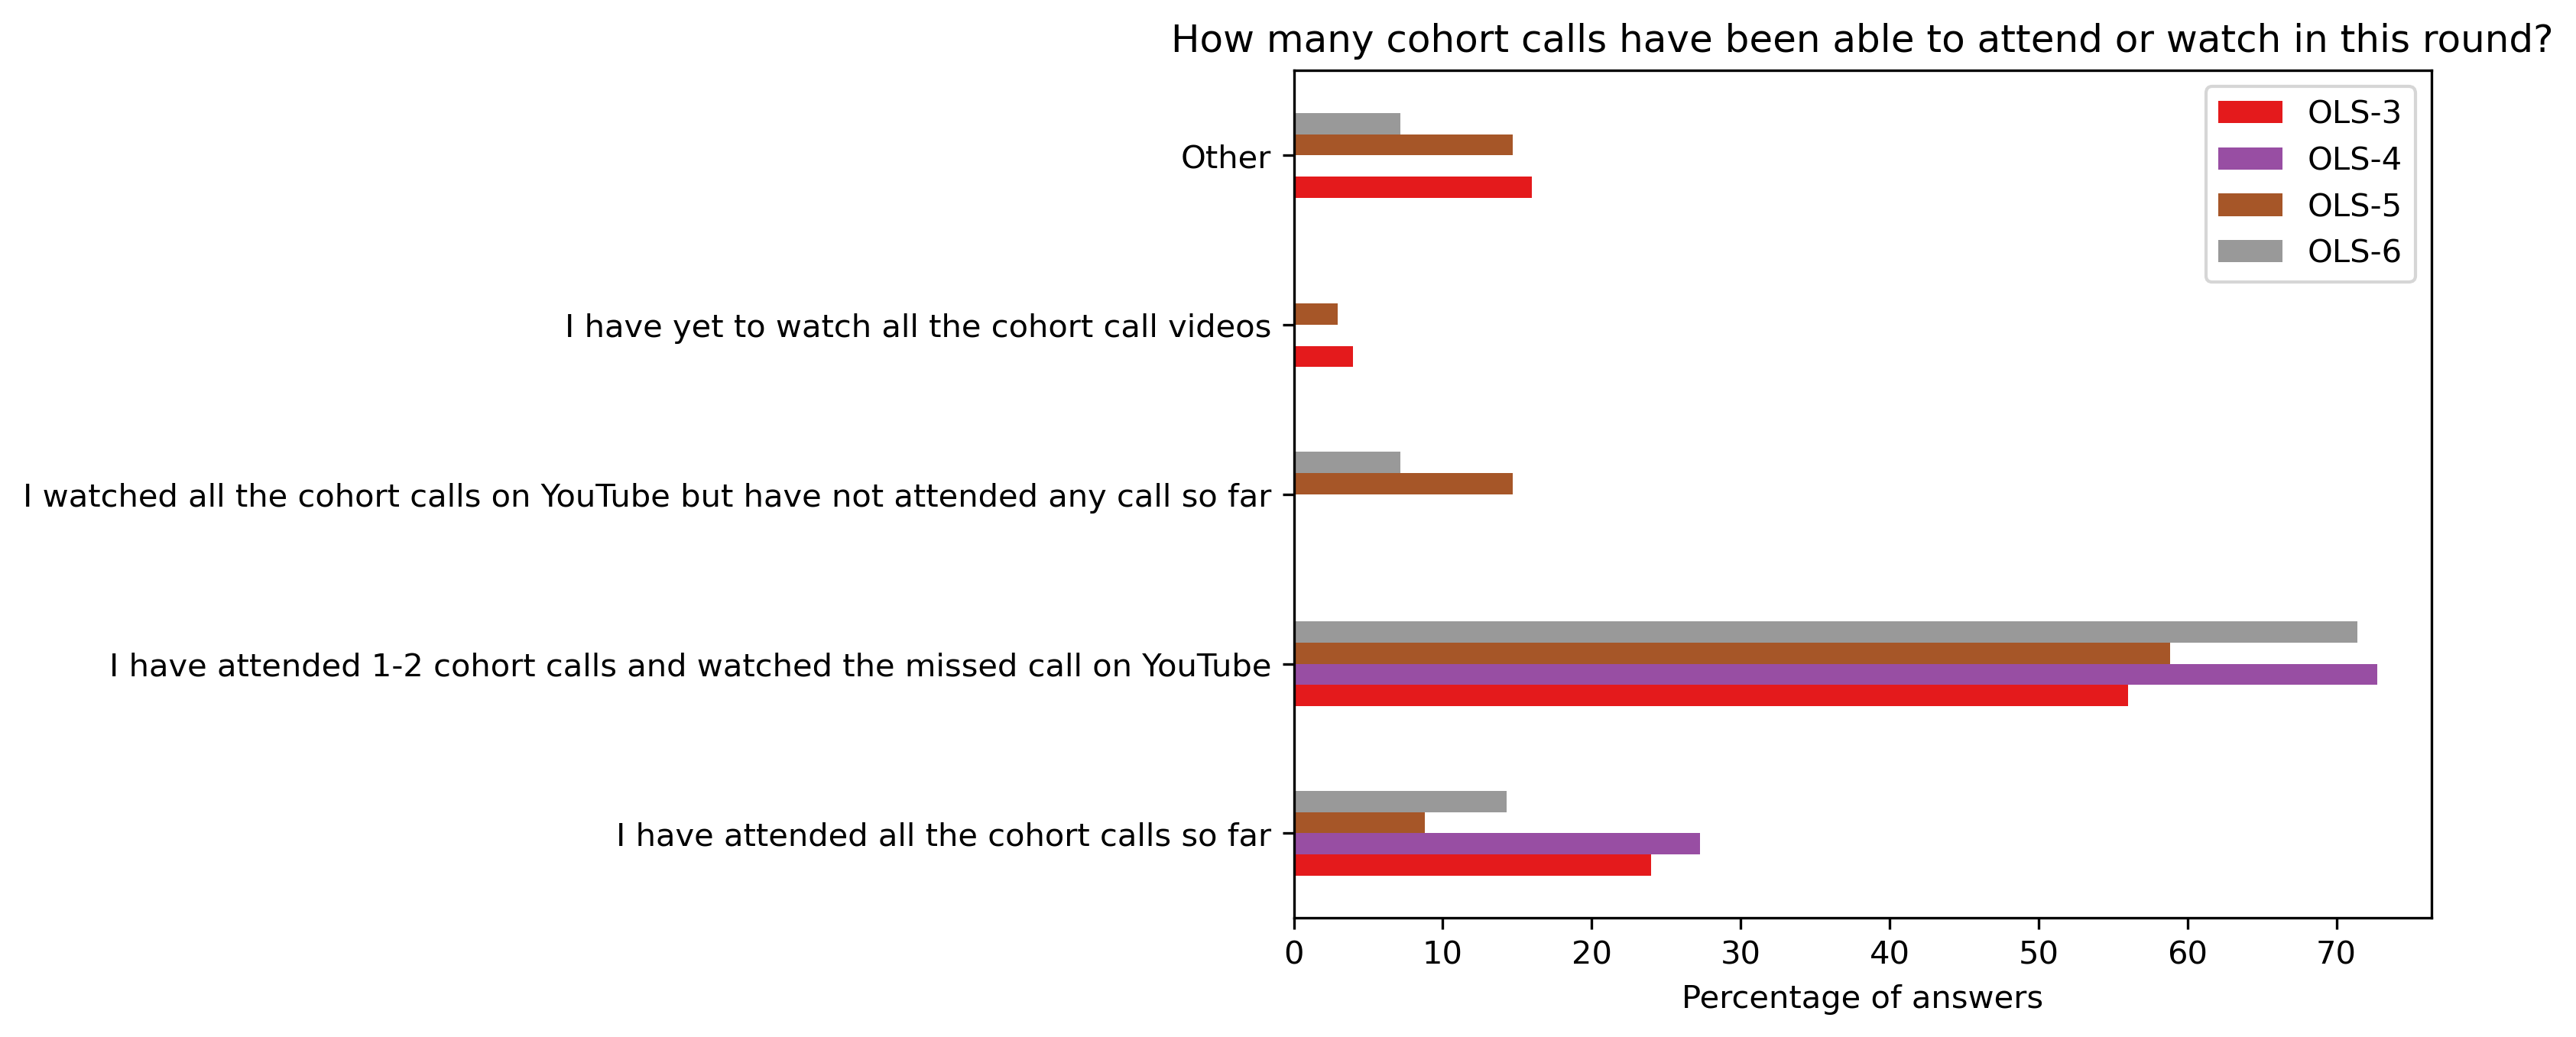

In [44]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q8_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How many cohort calls have been able to attend or watch in this round?')

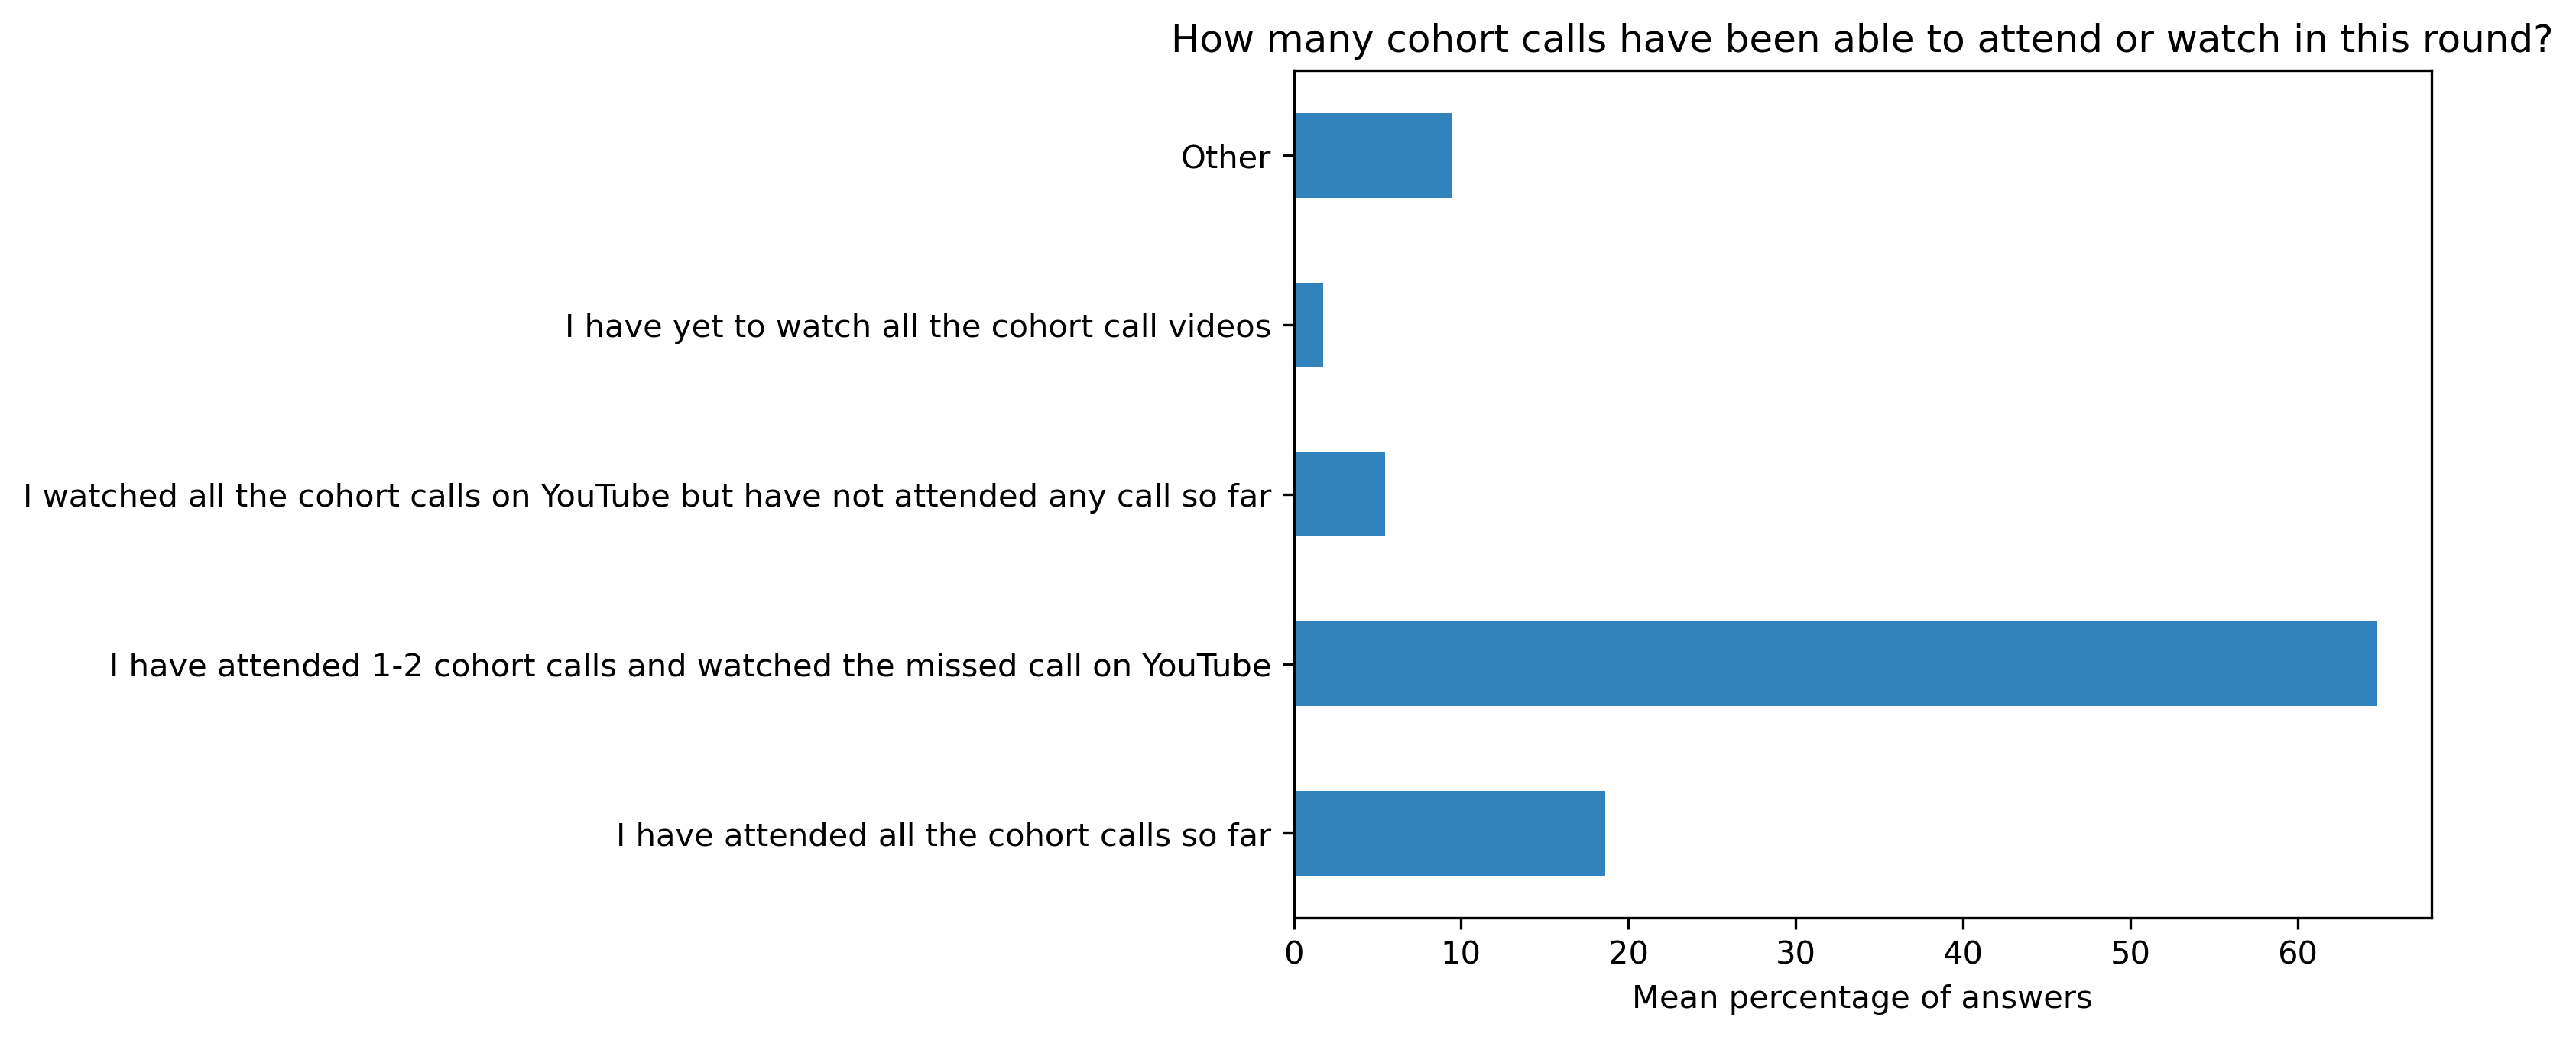

In [45]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q8_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

### Question 9: "To what extent did your mentor meet your expectations?"

Range from 1 (Not at all) to 5 (Completely)

In [46]:
participant_mid_q9 = {}
other_answer = []
col = "To what extent did your mentor meet your expectations?"
answers = list(range(1, 6)) + ["Other"]
for c in participant_mid_df:
    participant_mid_q9[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q9_df = pd.DataFrame.from_dict(participant_mid_q9)
participant_mid_q9_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
1          0      0      0      0      0      0
2          0      0      0      0      1      0
3          1      1      0      0      1      0
4          6      6      5      4     11      7
5         16      8     18      7     20      7
Other      0      0      0      0      0      0

In [47]:
other_answer

[]

In [48]:
participant_mid_q9_df = 100 * participant_mid_q9_df / participant_mid_q9_df.sum()

Text(0.5, 1.0, 'To what extent did your mentor meet your expectations?')

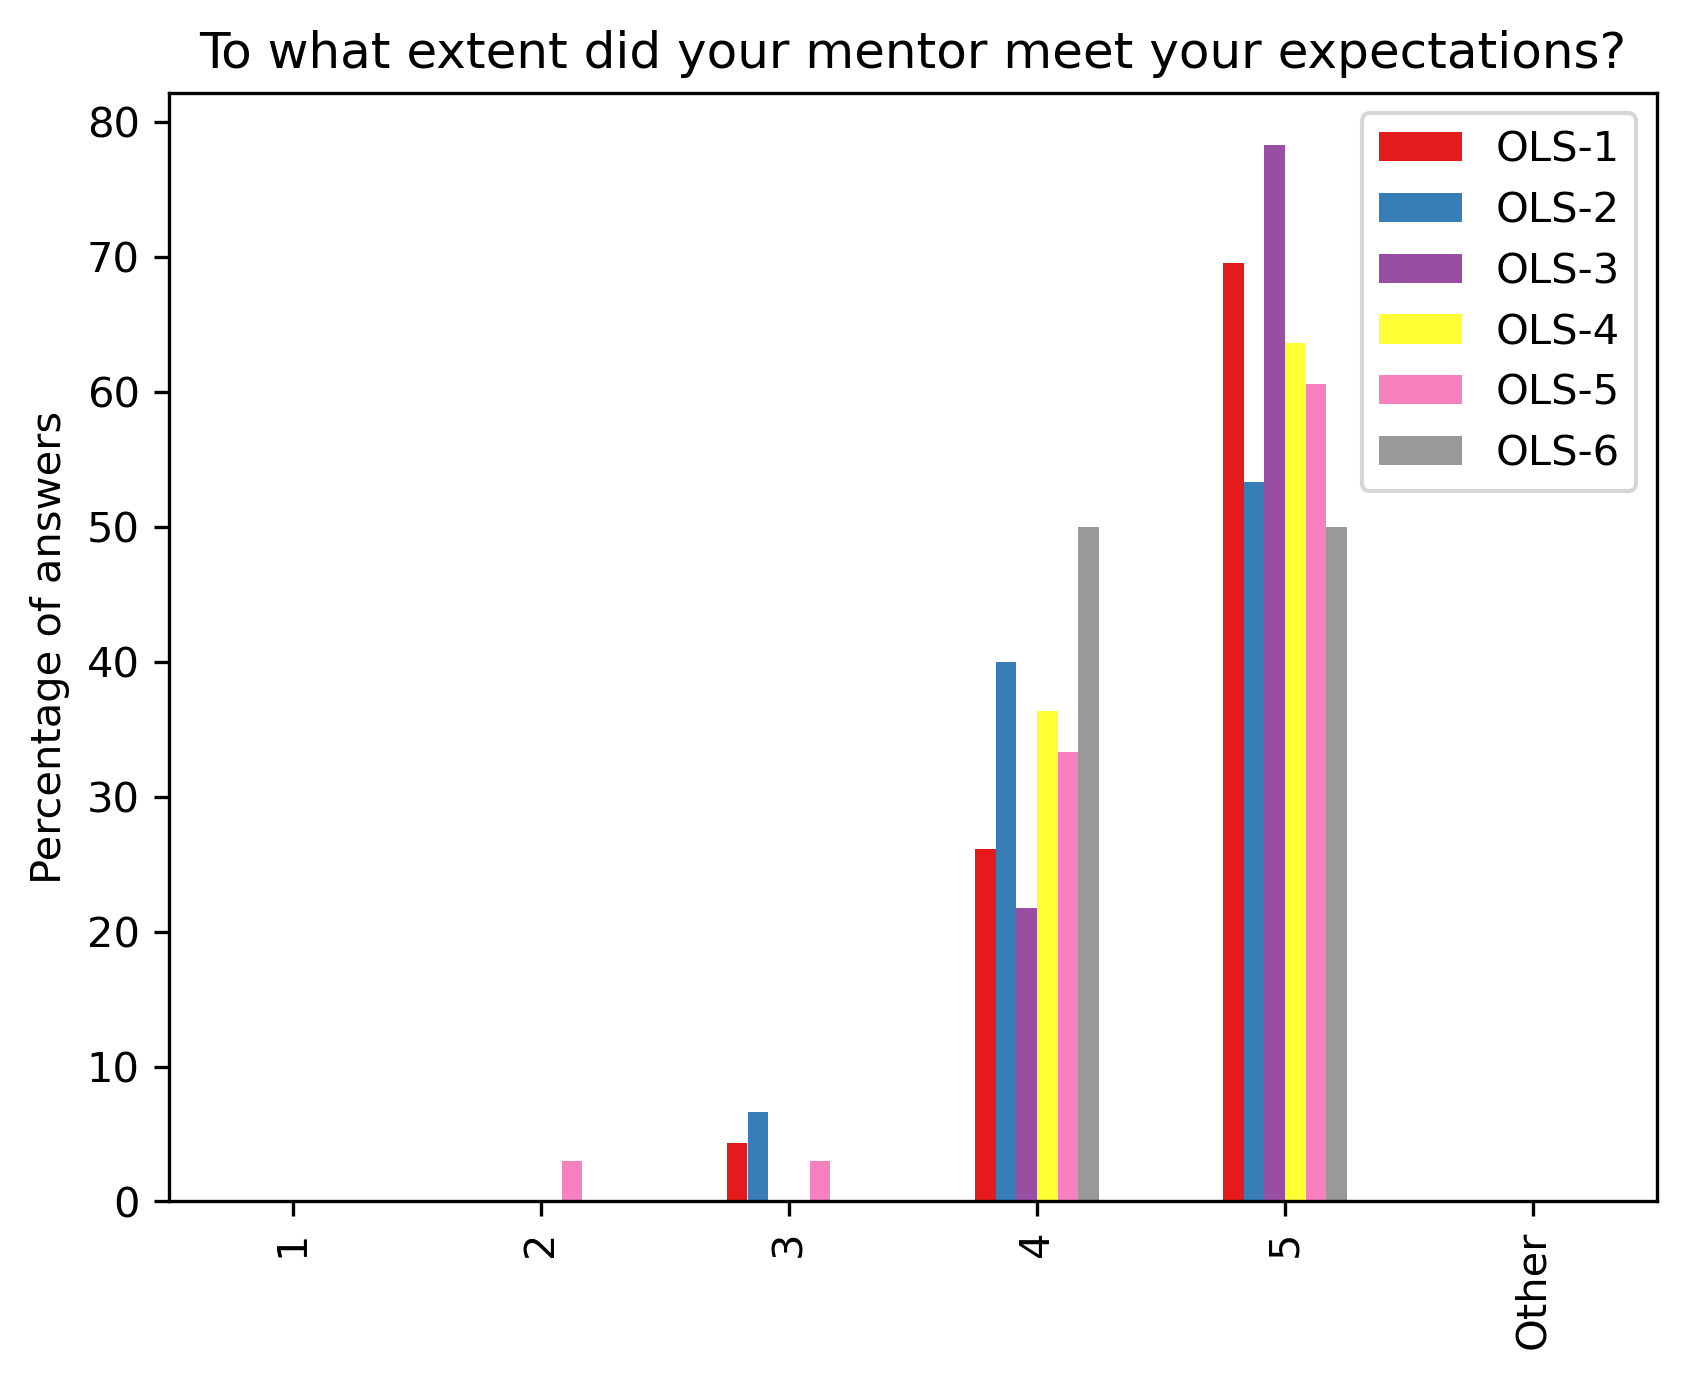

In [49]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q9_df.plot.bar(ax=ax, colormap='Set1')
plt.ylabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'To what extent did your mentor meet your expectations?')

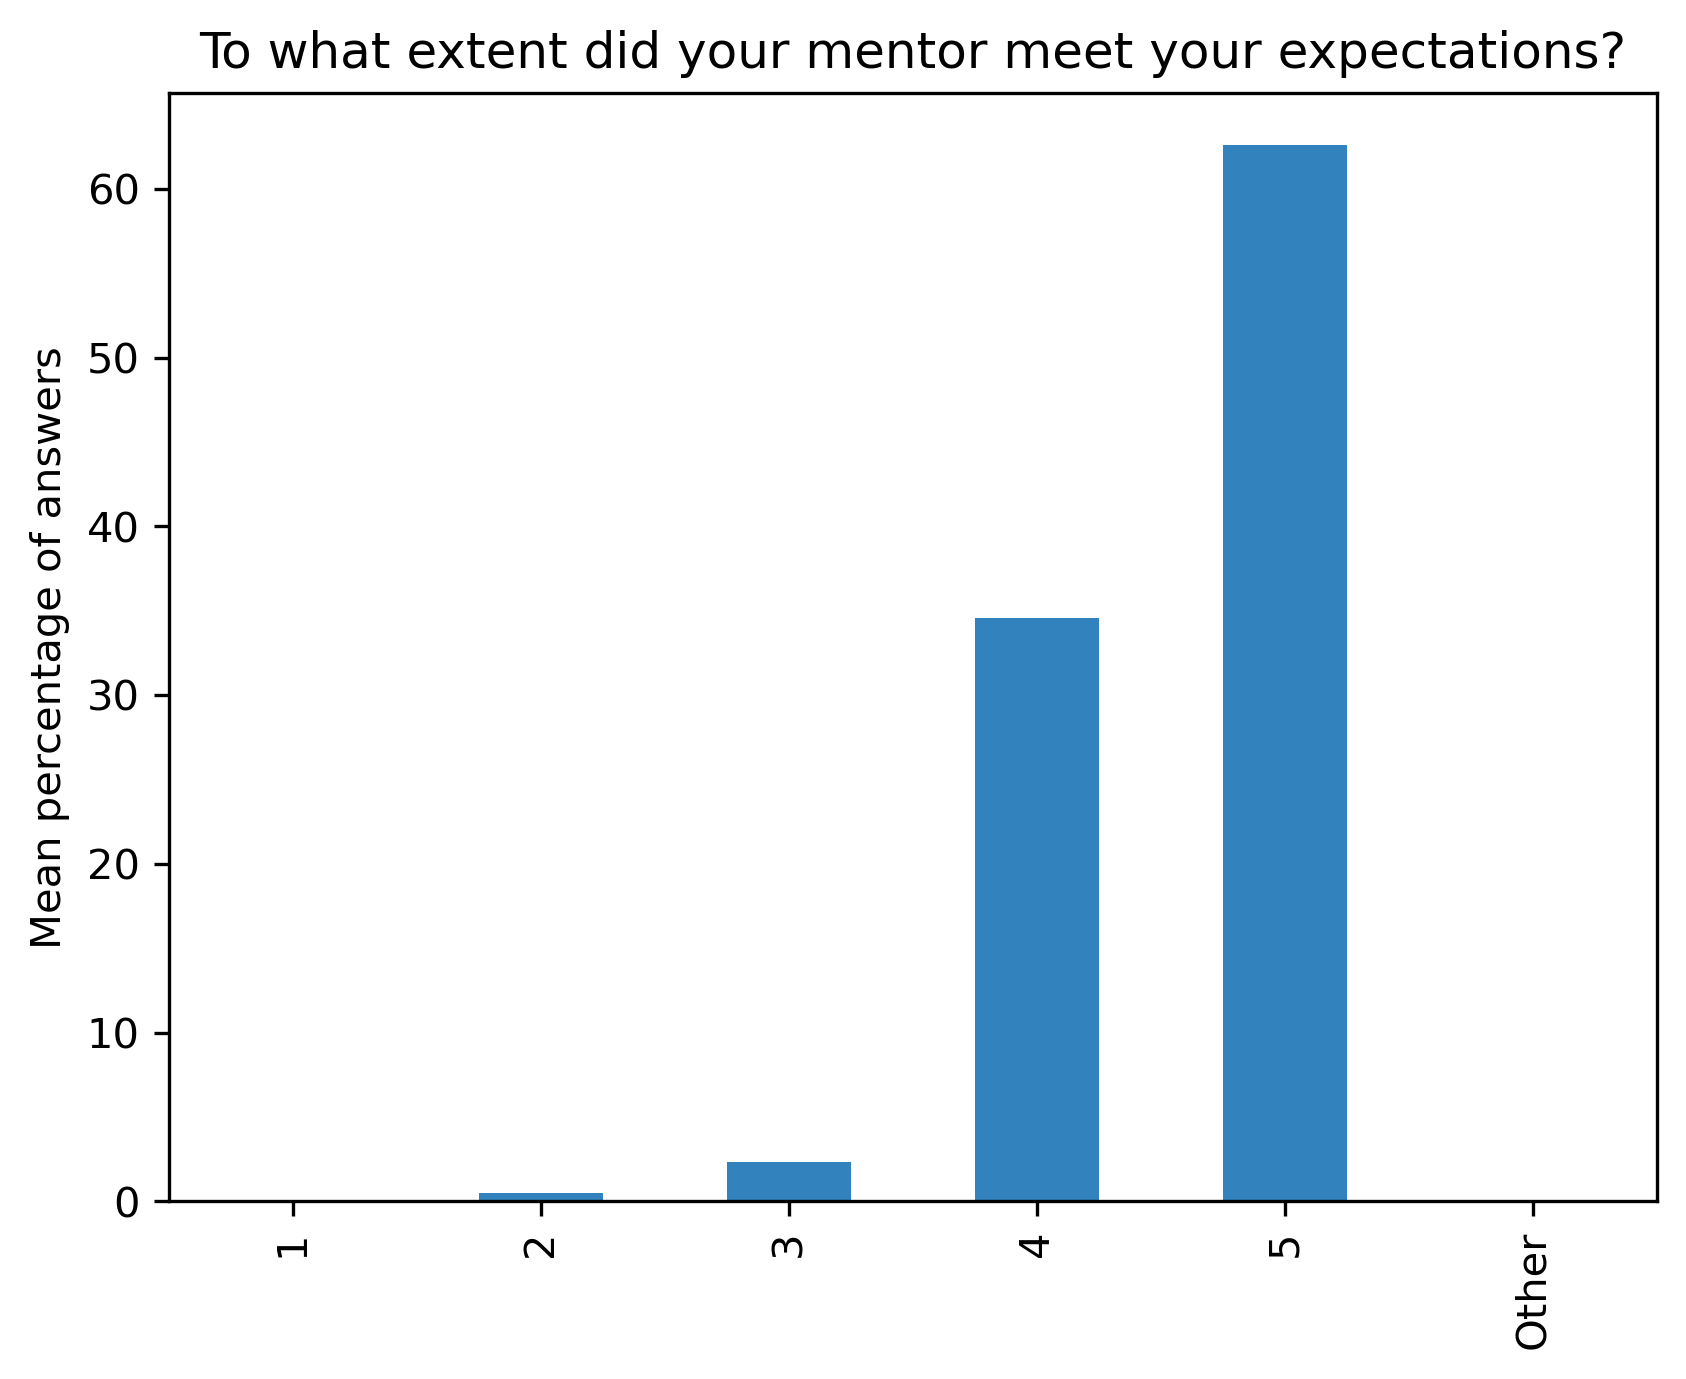

In [50]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q9_df.mean(axis=1).plot.bar(ax=ax, color=colors['participants'])
plt.ylabel('Mean percentage of answers')
plt.title(col)

### Question 10: "Would you like to work with your mentor in future?"

Possible answers:
- Yes
- No
- Maybe

In [51]:
participant_mid_q10 = {}
other_answer = []
col = "Would you like to work with your mentor in future?"
answers = ["Yes", "No", "Maybe", "Other"]
for c in participant_mid_df:
    participant_mid_q10[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q10_df = pd.DataFrame.from_dict(participant_mid_q10)
participant_mid_q10_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
Yes       19     13     18      7     27     12
No         1      0      0      0      0      0
Maybe      3      2      5      4      6      2
Other      0      0      0      0      0      0

In [52]:
other_answer

[]

In [53]:
participant_mid_q10_df = 100 * participant_mid_q10_df / participant_mid_q10_df.sum()

Text(0.5, 1.0, 'Would you like to work with your mentor in future?')

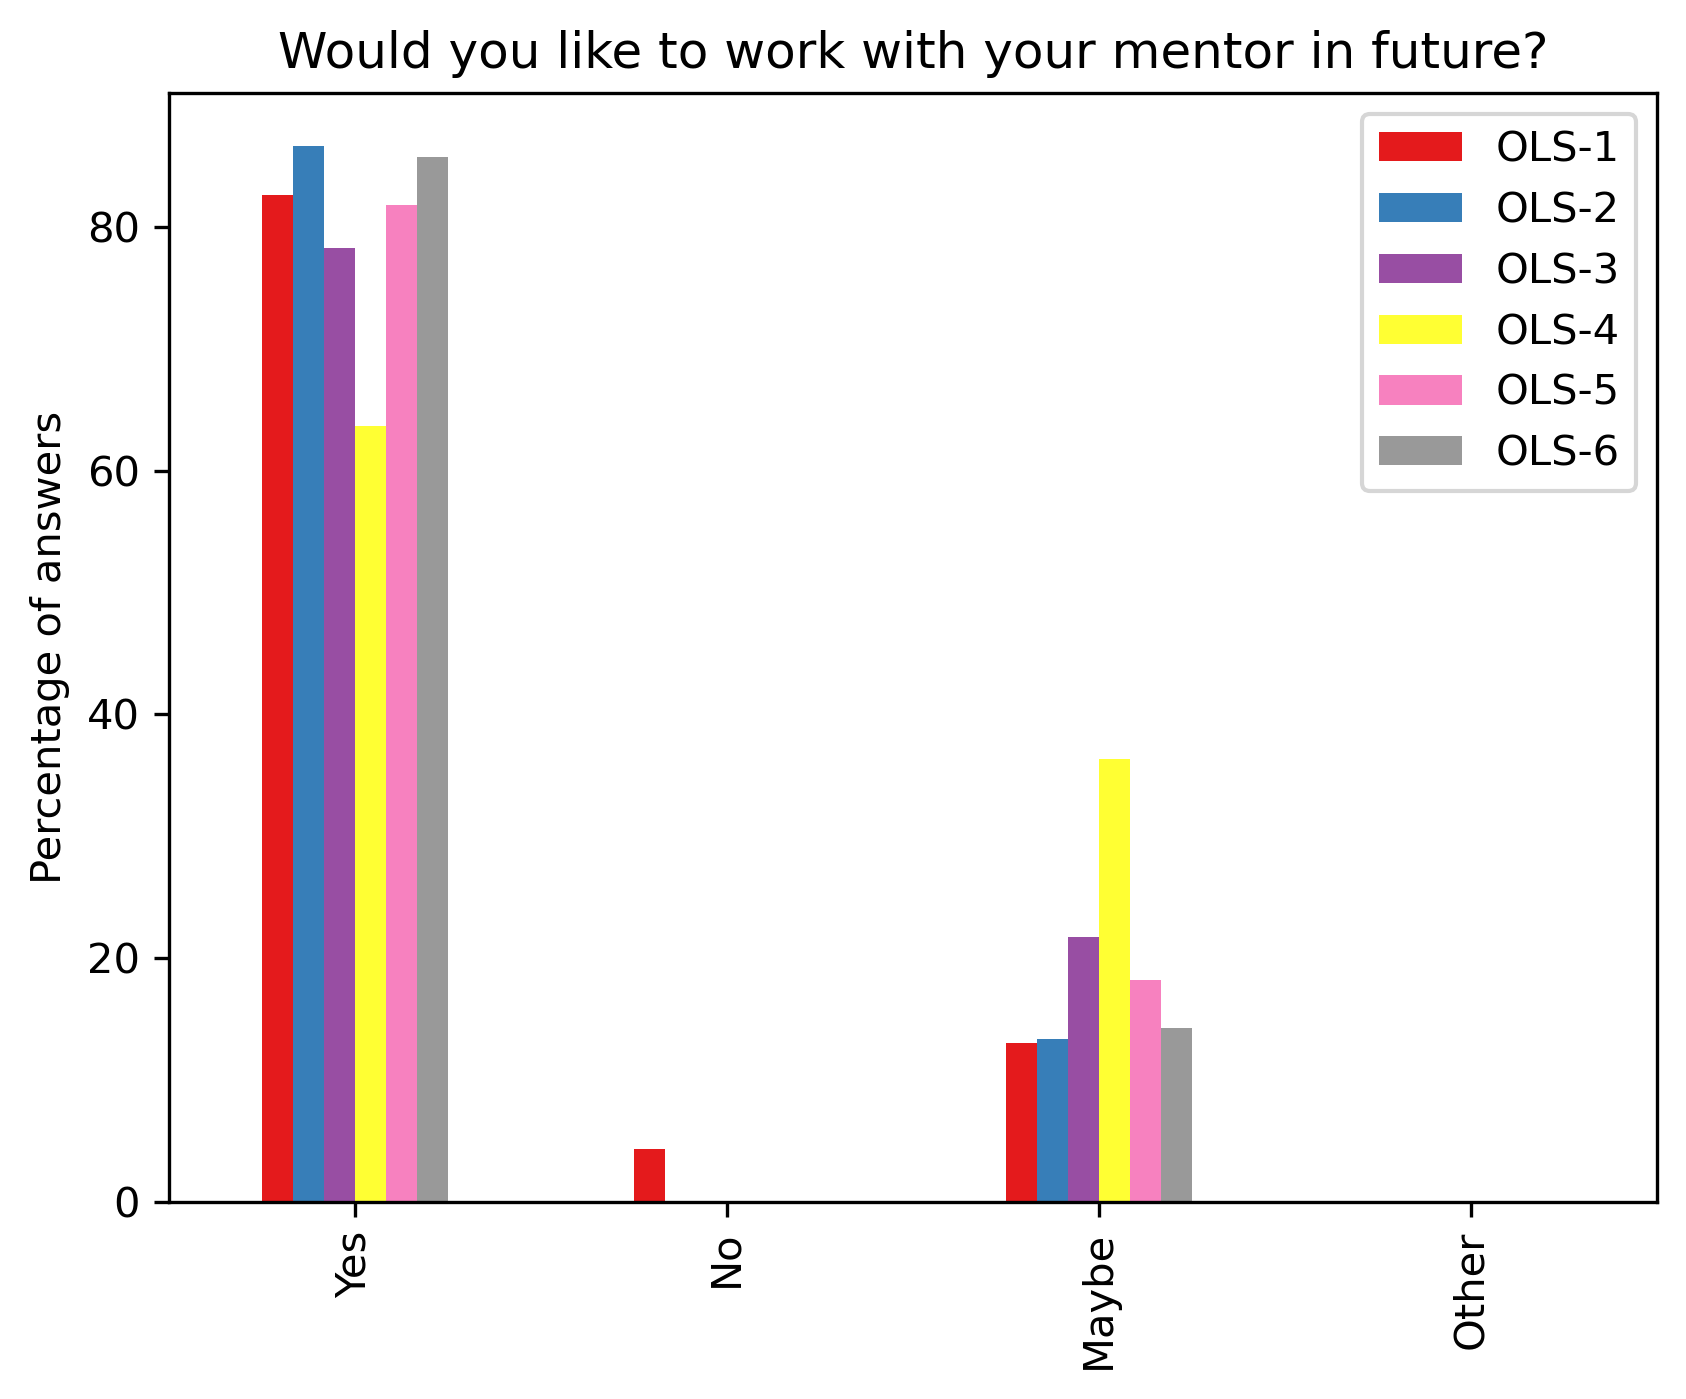

In [54]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q10_df.plot.bar(ax=ax, colormap='Set1')
plt.ylabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you like to work with your mentor in future?')

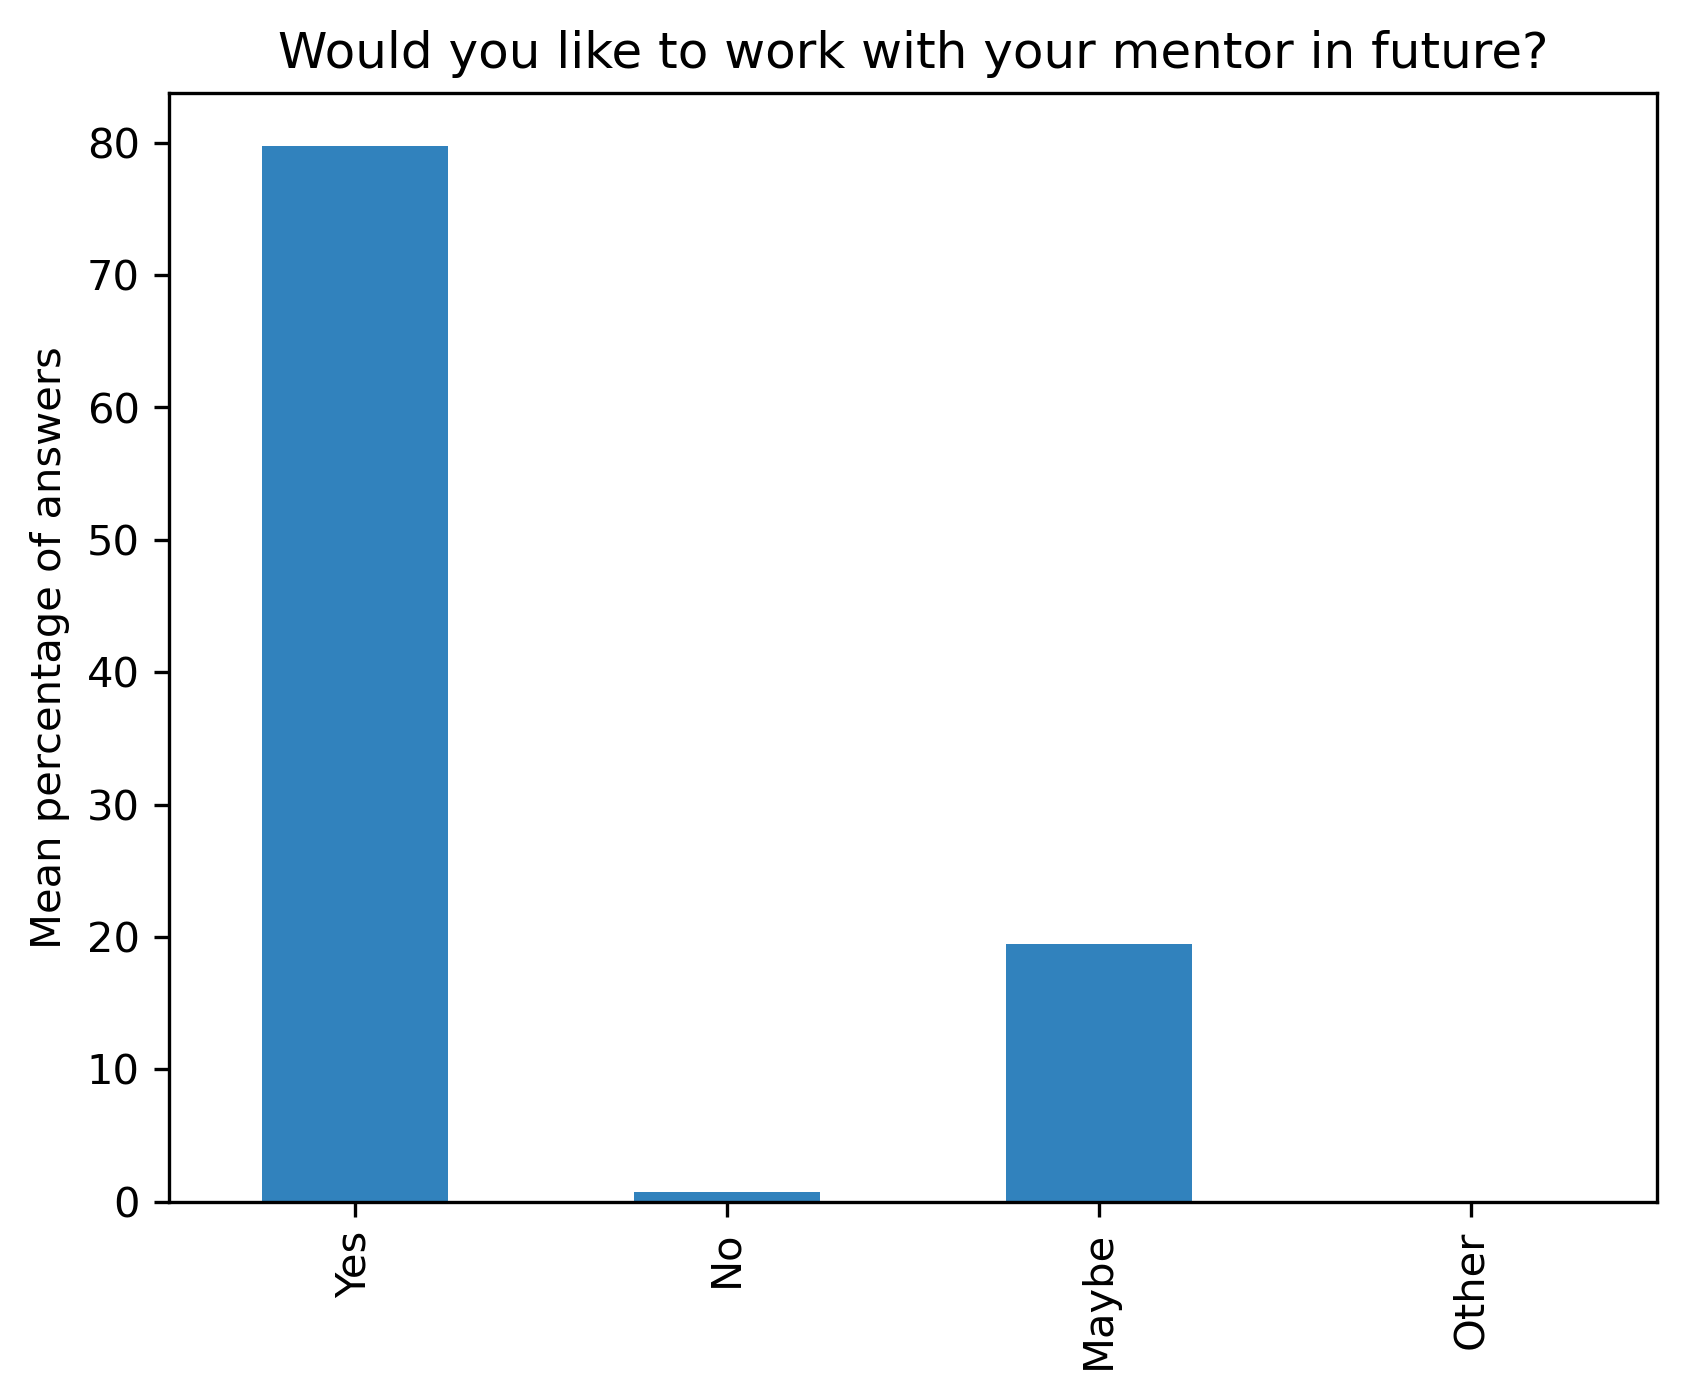

In [55]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q10_df.mean(axis=1).plot.bar(ax=ax, color=colors['participants'])
plt.ylabel('Mean percentage of answers')
plt.title(col)

# Post-cohort

## Participants

In [56]:
url = "https://docs.google.com/spreadsheets/d/1TlJ8_m1G4vLz0FH_IEgTGqjeQNvH8IYk0RM3wzaYanQ/export?format=csv"
cohort_gid = {
    'OLS-1': '1016086495',
    'OLS-2': '1605575560',
    'OLS-3': '1197781372',
    'OLS-4': '992604217',
    'OLS-5': '0',
    'OLS-6': '1071501789',
}

In [57]:
participant_df = {}
for c in cohort_gid:
    participant_df[c] = (pd.read_csv(f"{url}&gid={cohort_gid[c]}")
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(c, "cohort", regex=True)
        # q1                 
        .replace("I was able to meet ALL my project goals", "I was able to meet ALL my goals", regex=True)
        .replace("I worked consistently on my project, and met part of my goals", "I was able to meet MOST of my goals", regex=True)
        .replace("I was able to meet MOST of my goals.", "I was able to meet MOST of my goals", regex=True)
        # q4
        ## renaming (see below)
        .replace("Tooling and Roadmapping \(open canvas, project vision etc\.\)", "Project Roadmapping, Open Canvas", regex=True)
        .replace("Licensing and Code of Conduct", "Open Licensing, Code of Conduct", regex=True)
        .replace("GitHub and README files", "README, GitHub Introduction", regex=True)
        .replace("Project development: Agile and iterative project management methods & Open Aspects", "Agile & Iteractive Project Management", regex=True)
        .replace("Knowledge Dissemination: Preprints, Training and Code Publishing", "Open Access Publication, Open Educational Resources, Open Source Software", regex=True)
        .replace("Data management plans, software citation", "Open Data", regex=True)
        .replace("Citizen Science", "Open Engagement of Social Actors", regex=True)
        .replace("citizen science", "Open Engagement of Social Actors", regex=True)
        .replace("Diversity & Inclusion", "Equity Diversity & Inclusion (EDI)", regex=True)
        .replace("Mountain of engagement and Community interactions", "Mountain of Engagement, Community Interactions", regex=True)
        .replace("Persona and pathways and inviting contributions", "Personas & Pathways", regex=True)
        .replace("Mental health, self care, personal ecology", "Personal Ecology", regex=True)
        .replace("Ally skills", "Ally Skills for Open Leaders", regex=True)
        .replace("Open Leadership: Career Guidance call", "Open Leadership in Practice", regex=True)
        .replace("Open office/co-working hours and social calls", "Open office/co-working hours and social calls", regex=True)
        .replace("Final presentation rehearsals", "Graduation rehearsals", regex=True)
        .replace("Final presentation call \(open and live streamed\)", "Graduations", regex=True)
        ## cleaning
        .replace("Tooling and Roadmapping \(\)", "Project Roadmapping, Open Canvas", regex=True)
        #.replace("Tooling and Roadmapping(open canvas, project vision etc.)", "Project Roadmapping, Open Canvas", regex=True)
        .replace("Designing for inclusion: Implicit bias", "Community Design for Inclusivity", regex=True)
        .replace("Diversity and Inclusion", "Equity Diversity & Inclusion (EDI)", regex=True)
        .replace("Preprints", "Open Access Publication", regex=True)
        .replace("open protocols", "Open Evaluation", regex=True)
        .replace("Knowledge Dissemination: Citizen science", "Open Engagement of Social Actors", regex=True)
        .replace("Knowledge Dissemination: open education", "Open Educational Resources", regex=True)
        .replace("Knowledge Dissemination: Open Access Publication", "Open Access Publication", regex=True)
        .replace("open education", "Open Educational Resources", regex=True)
        .replace("Open agenda and social calls", "Open office/co-working hours and social calls", regex=True)
        .replace("Career Guidance calls", "Open Leadership in Practice", regex=True)
        .replace("Applying FAIR principles on research components", "Open Data", regex=True)
        # q5
        .replace("I am not sure yet, but ask me later when you have launched OLS-2", "I am not sure yet but ask me later", regex=True)
        .replace("I am not sure yet, but ask me later when you have launched cohort", "I am not sure yet but ask me later", regex=True)
        .replace("I am not sure yet, but ask me later", "I am not sure yet but ask me later", regex=True)
        .replace("Yes I'd like to return as a collaborator to run an OLS cohort for my network", "Yes I'd like to return as a collaborator to run this program in my network", regex=True)
        .replace("No, I would not be able to return to OLS-2", "No I would not be able to return", regex=True)
        .replace("No, I would not be able to return to cohort", "No I would not be able to return", regex=True)
        .replace("No, I would not be able to return to OLS-4", "No I would not be able to return", regex=True)
        .replace("I would not be able to return to OLS-3 but I am hopeful to return to OLS-4 with an active role.", "I would take a break but please keep me informed about the next cohort", regex=True)
        .replace("No, but only because I really would not have the time", "No I would not be able to return", regex=True)
        .replace("Maybe in OLS-7?", "I would take a break but please keep me informed about the next cohort", regex=True)
        
    )

### Question 1: "How was your overall project leadership experience in OLS?"

Possible answers:
- I was NOT able to work on my project idea
- I was able work on my project but only PARTIALLY
- I was able to meet MOST of my goals
- I was able to meet ALL my goals
- Other

In [58]:
participant_q1 = {}
other_answer = []
col = "How was your overall project leadership experience in OLS?"
answers = [
    "I was able to meet ALL my goals",
    "I was able to meet MOST of my goals",
    "I was able work on my project but only PARTIALLY",
    "I was NOT able to work on my project idea",
    "Other"]
for c in participant_df:
    participant_q1[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q1_df = pd.DataFrame.from_dict(participant_q1)
participant_q1_df

OLS-1  OLS-2  OLS-3  OLS-4  \
I was able to meet ALL my goals                       7      5      6      7   
I was able to meet MOST of my goals                   7     18     23      9   
I was able work on my project but only PARTIALLY      7      9      6      3   
I was NOT able to work on my project idea             0      0      0      0   
Other                                                 1      1      0      0   

                                                  OLS-5  OLS-6  
I was able to meet ALL my goals                       6      7  
I was able to meet MOST of my goals                  10     14  
I was able work on my project but only PARTIALLY      7      9  
I was NOT able to work on my project idea             0      0  
Other                                                 0      0

In [59]:
participant_q1_df = 100 * participant_q1_df / participant_q1_df.sum()

Text(0.5, 1.0, 'How was your overall project leadership experience in OLS?')

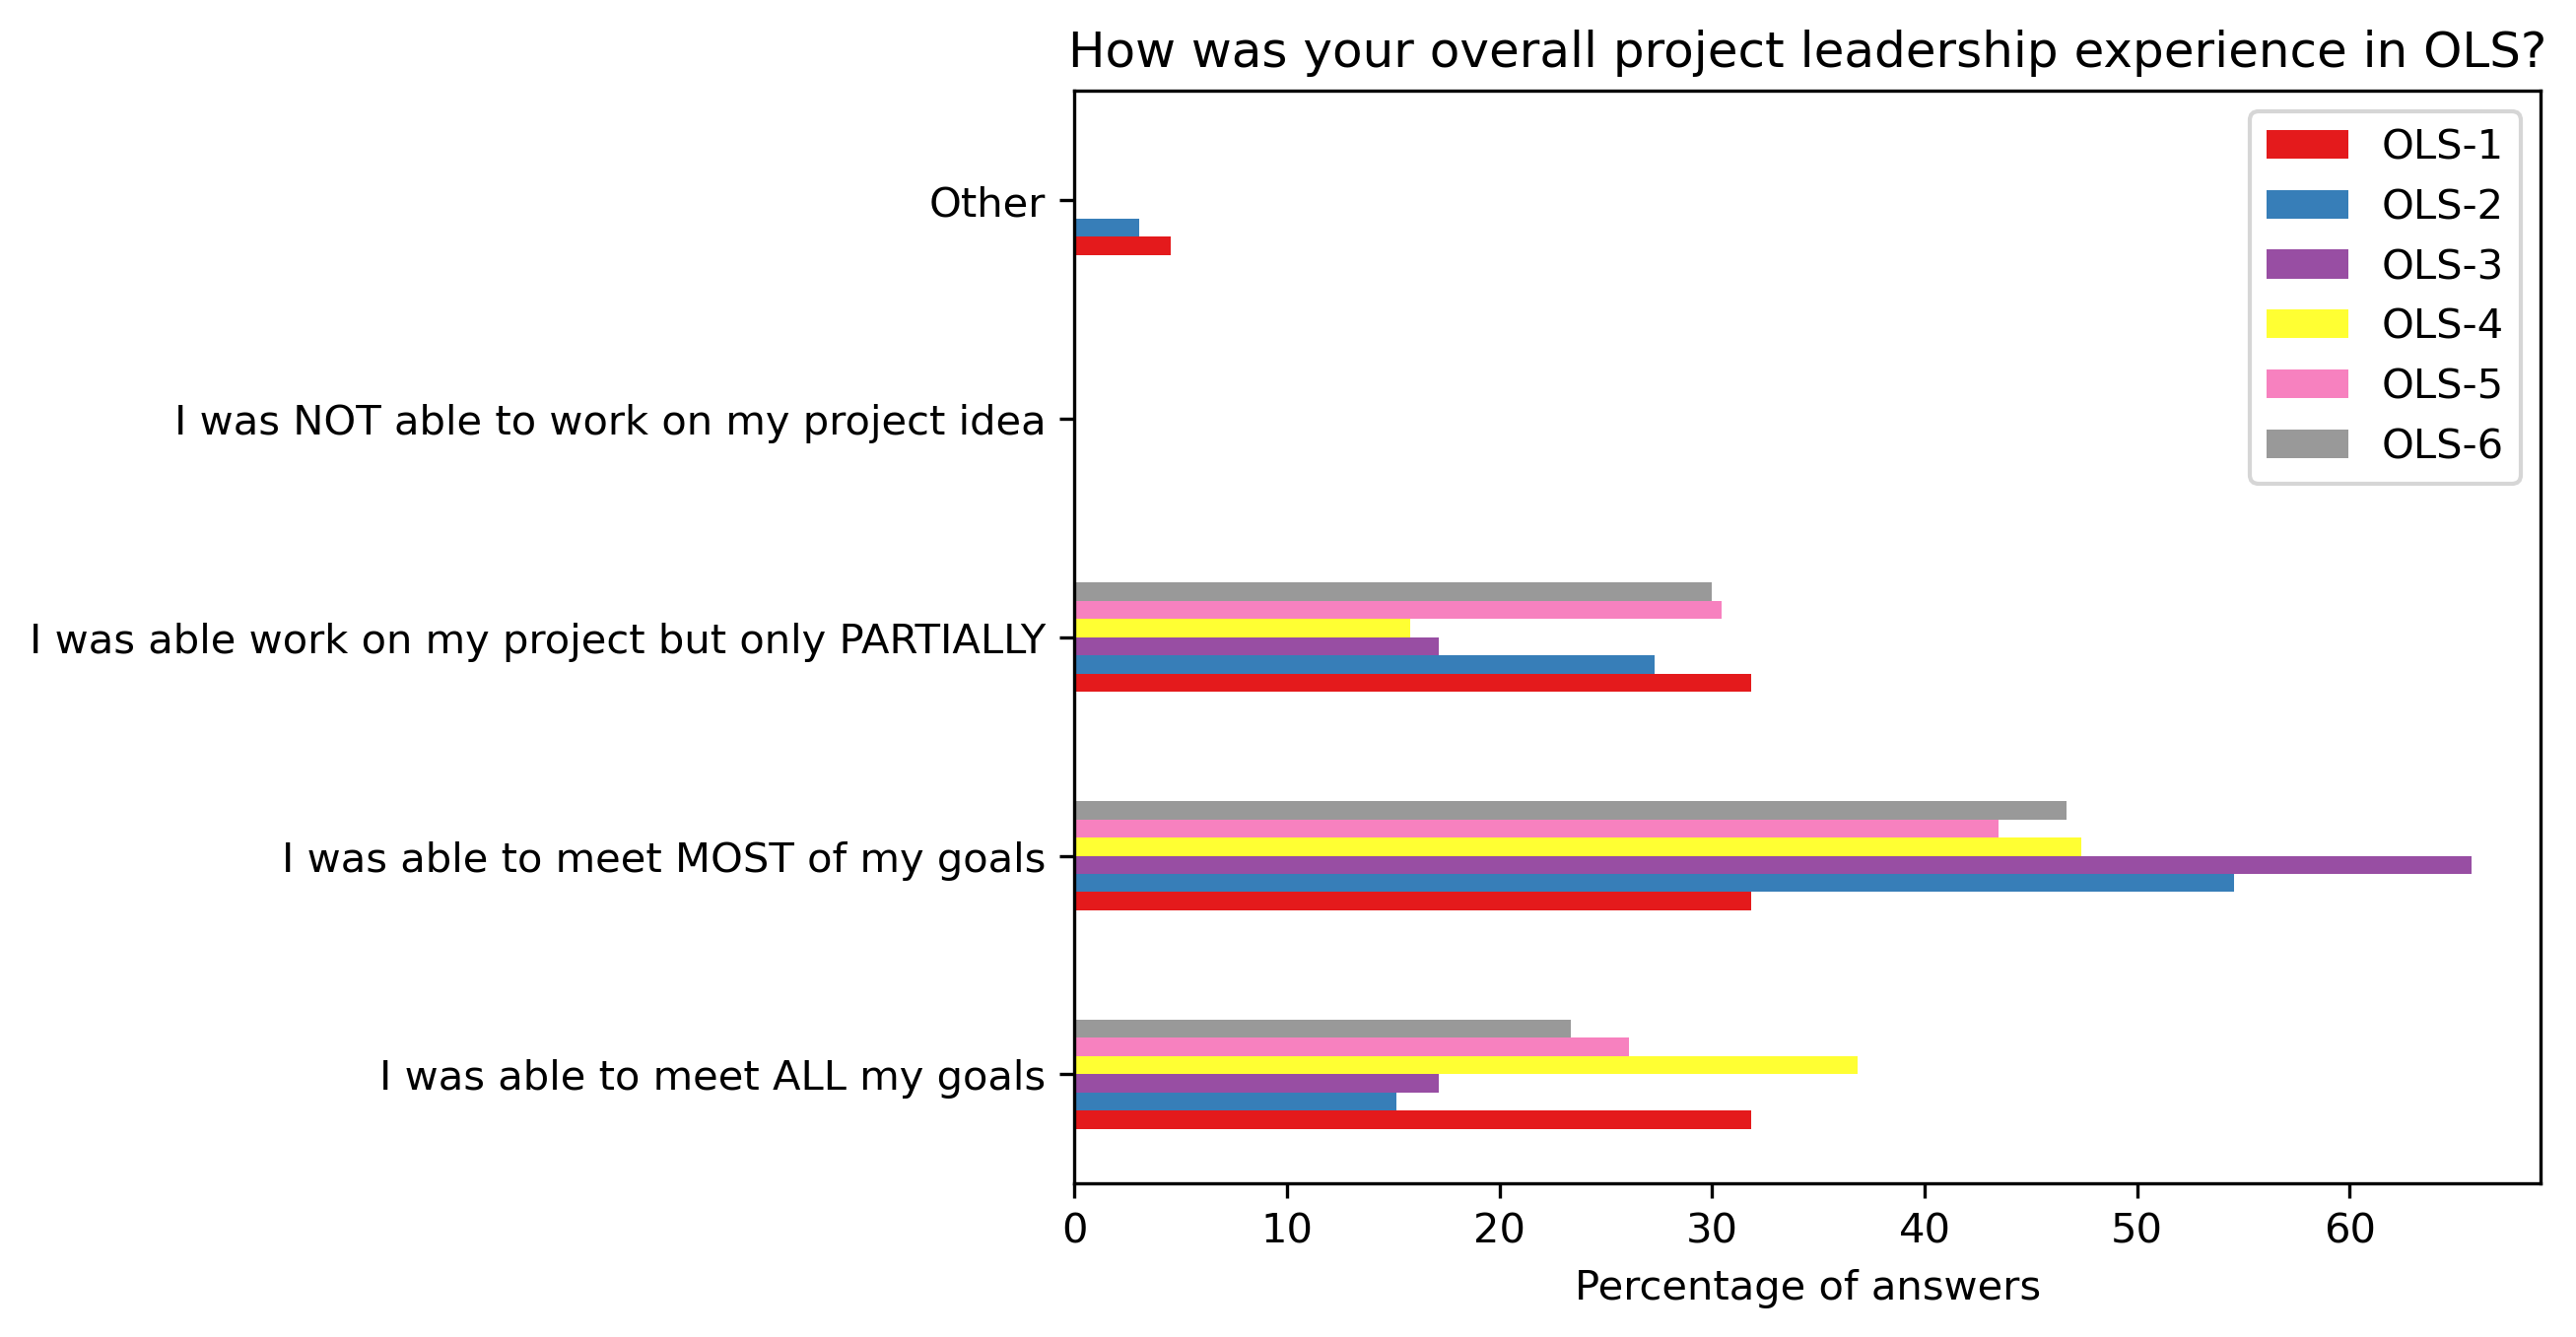

In [60]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall project leadership experience in OLS?')

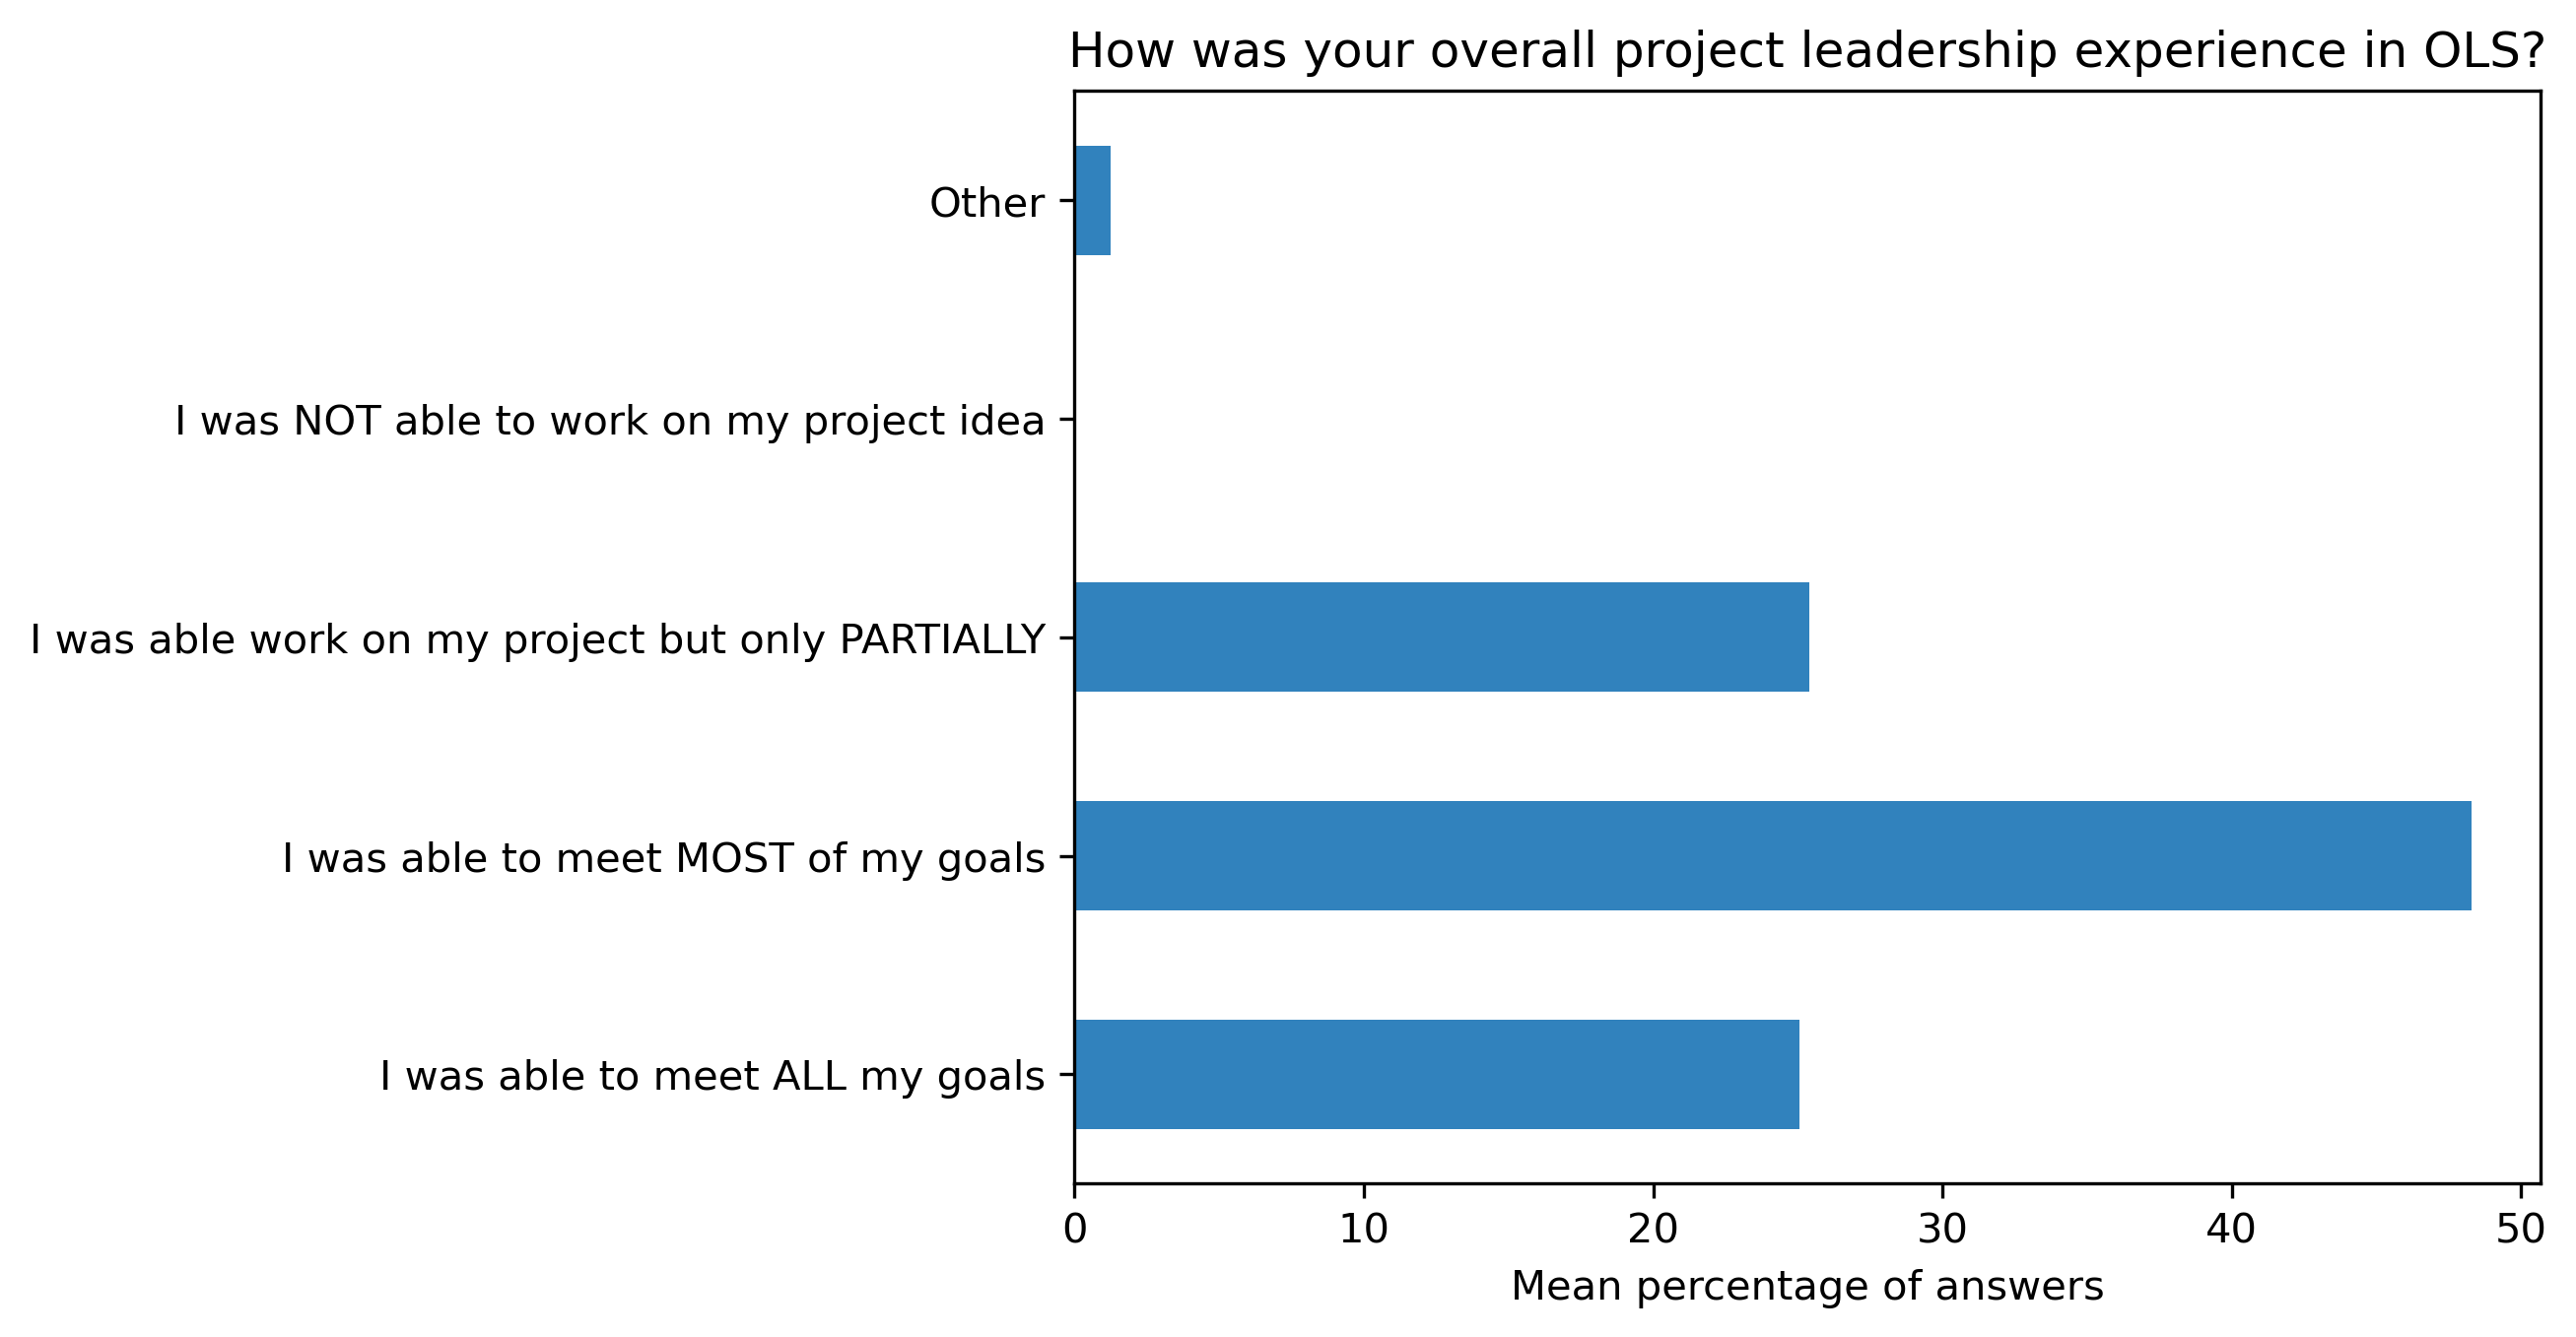

In [61]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q1_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [62]:
other_answer

['Goals evolved as we learned but we were very productive ',
 "I had some personal goals which were not completed - but that's fine :)"]

### Question 2: "How was your overall experience with the mentor-mentee calls?"

Possible answers:
- Mentoring calls were not useful
- Mentoring calls were somewhat useful
- Mentoring calls were mostly useful
- Mentoring calls were always useful

In [63]:
participant_q2 = {}
other_answer = []
col = "How was your overall experience with the mentor-mentee calls?"
answers = [
    "Mentoring calls were not useful",
    "Mentoring calls were somewhat useful",
    "Mentoring calls were mostly useful",
    "Mentoring calls were always useful",
    "Other"]
for c in participant_df:
    participant_q2[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q2_df = pd.DataFrame.from_dict(participant_q2)
participant_q2_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
Mentoring calls were not useful           0      0      0      0      0      0
Mentoring calls were somewhat useful      2      1      2      1      1      1
Mentoring calls were mostly useful        6      9      7      2      4      6
Mentoring calls were always useful       14     22     26     16     19     24
Other                                     0      0      0      0      0      0

In [64]:
participant_q2_df = 100 * participant_q2_df / participant_q2_df.sum()

Text(0.5, 1.0, 'How was your overall experience with the mentor-mentee calls?')

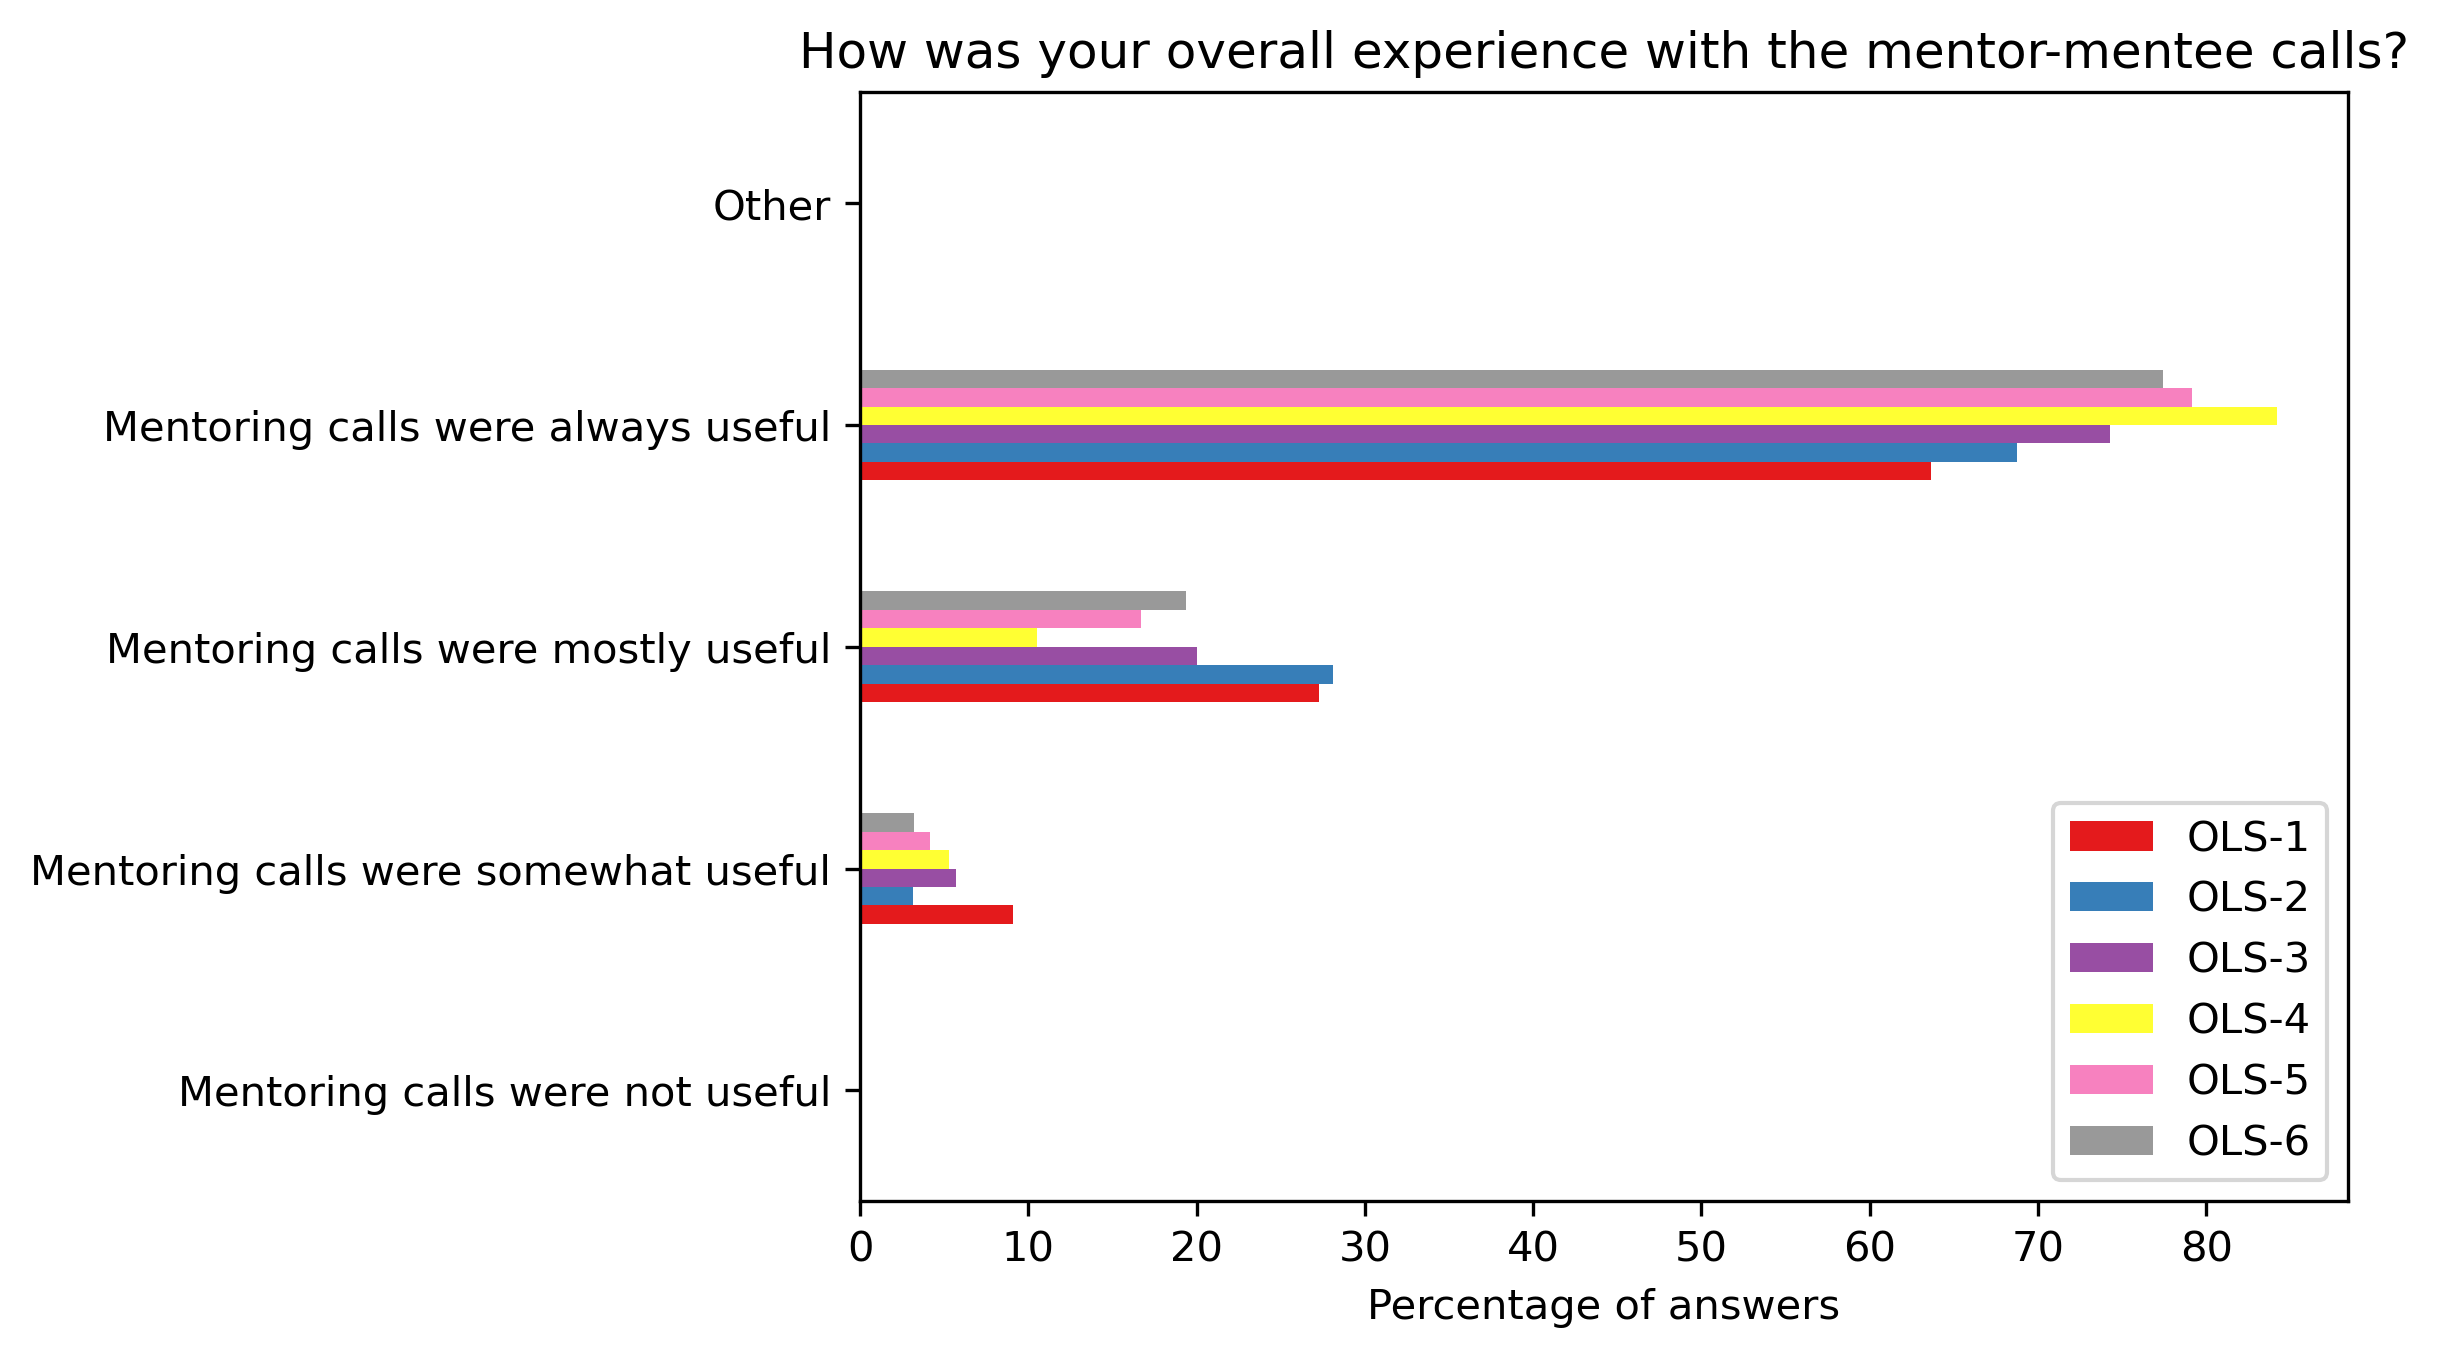

In [65]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q2_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall experience with the mentor-mentee calls?')

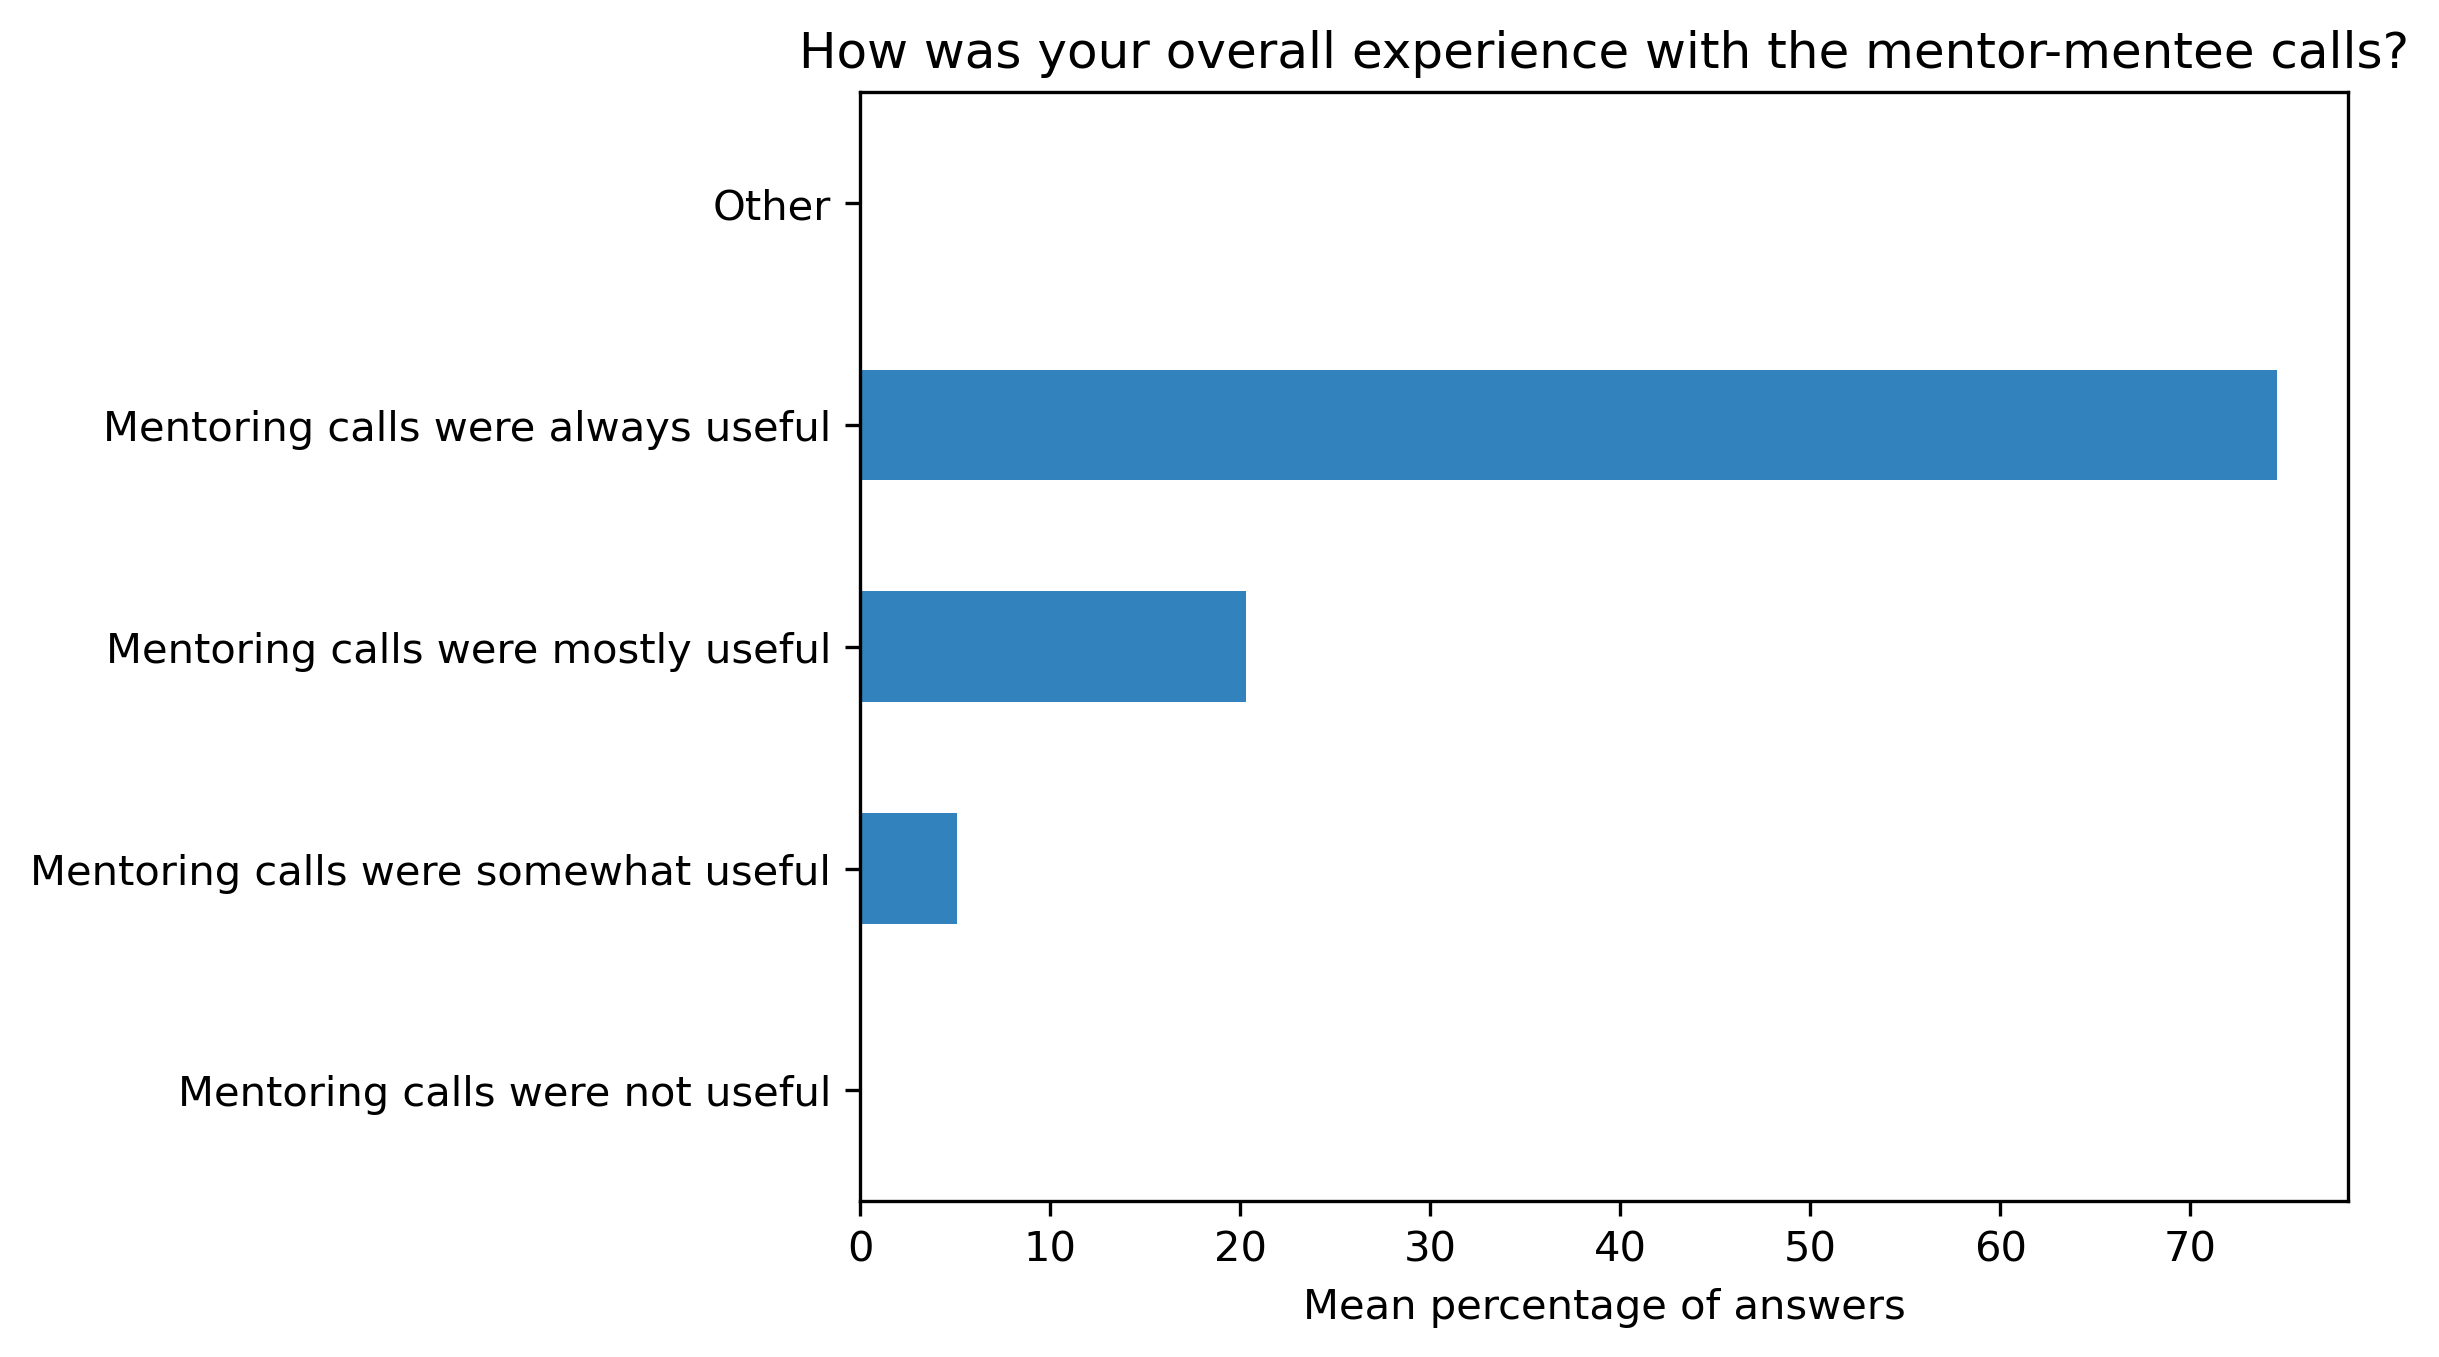

In [66]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q2_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [67]:
other_answer

[]

### Question 3: "How was your overall experience with the cohort calls?"

Possible answers:
- They were not useful for me
- They were somewhat useful
- They were mostly useful
- They were always useful
- I could not attend

In [68]:
participant_q3 = {}
other_answer = []
col = "How was your overall experience with the cohort calls?"
answers = [
    "They were always useful",
    "They were mostly useful",
    "They were somewhat useful",
    "They were not useful for me",
    "I could not attend",
    "Other"]
for c in participant_df:
    participant_q3[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q3_df = pd.DataFrame.from_dict(participant_q3)
participant_q3_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
They were always useful         10     13     22     11     10     12
They were mostly useful         11     15     11      8     11     14
They were somewhat useful        1      5      2      0      2      4
They were not useful for me      0      0      1      0      0      0
I could not attend               0      0      0      0      0      1
Other                            0      0      0      0      0      0

In [69]:
participant_q3_df = 100 * participant_q3_df / participant_q3_df.sum()

Text(0.5, 1.0, 'How was your overall experience with the cohort calls?')

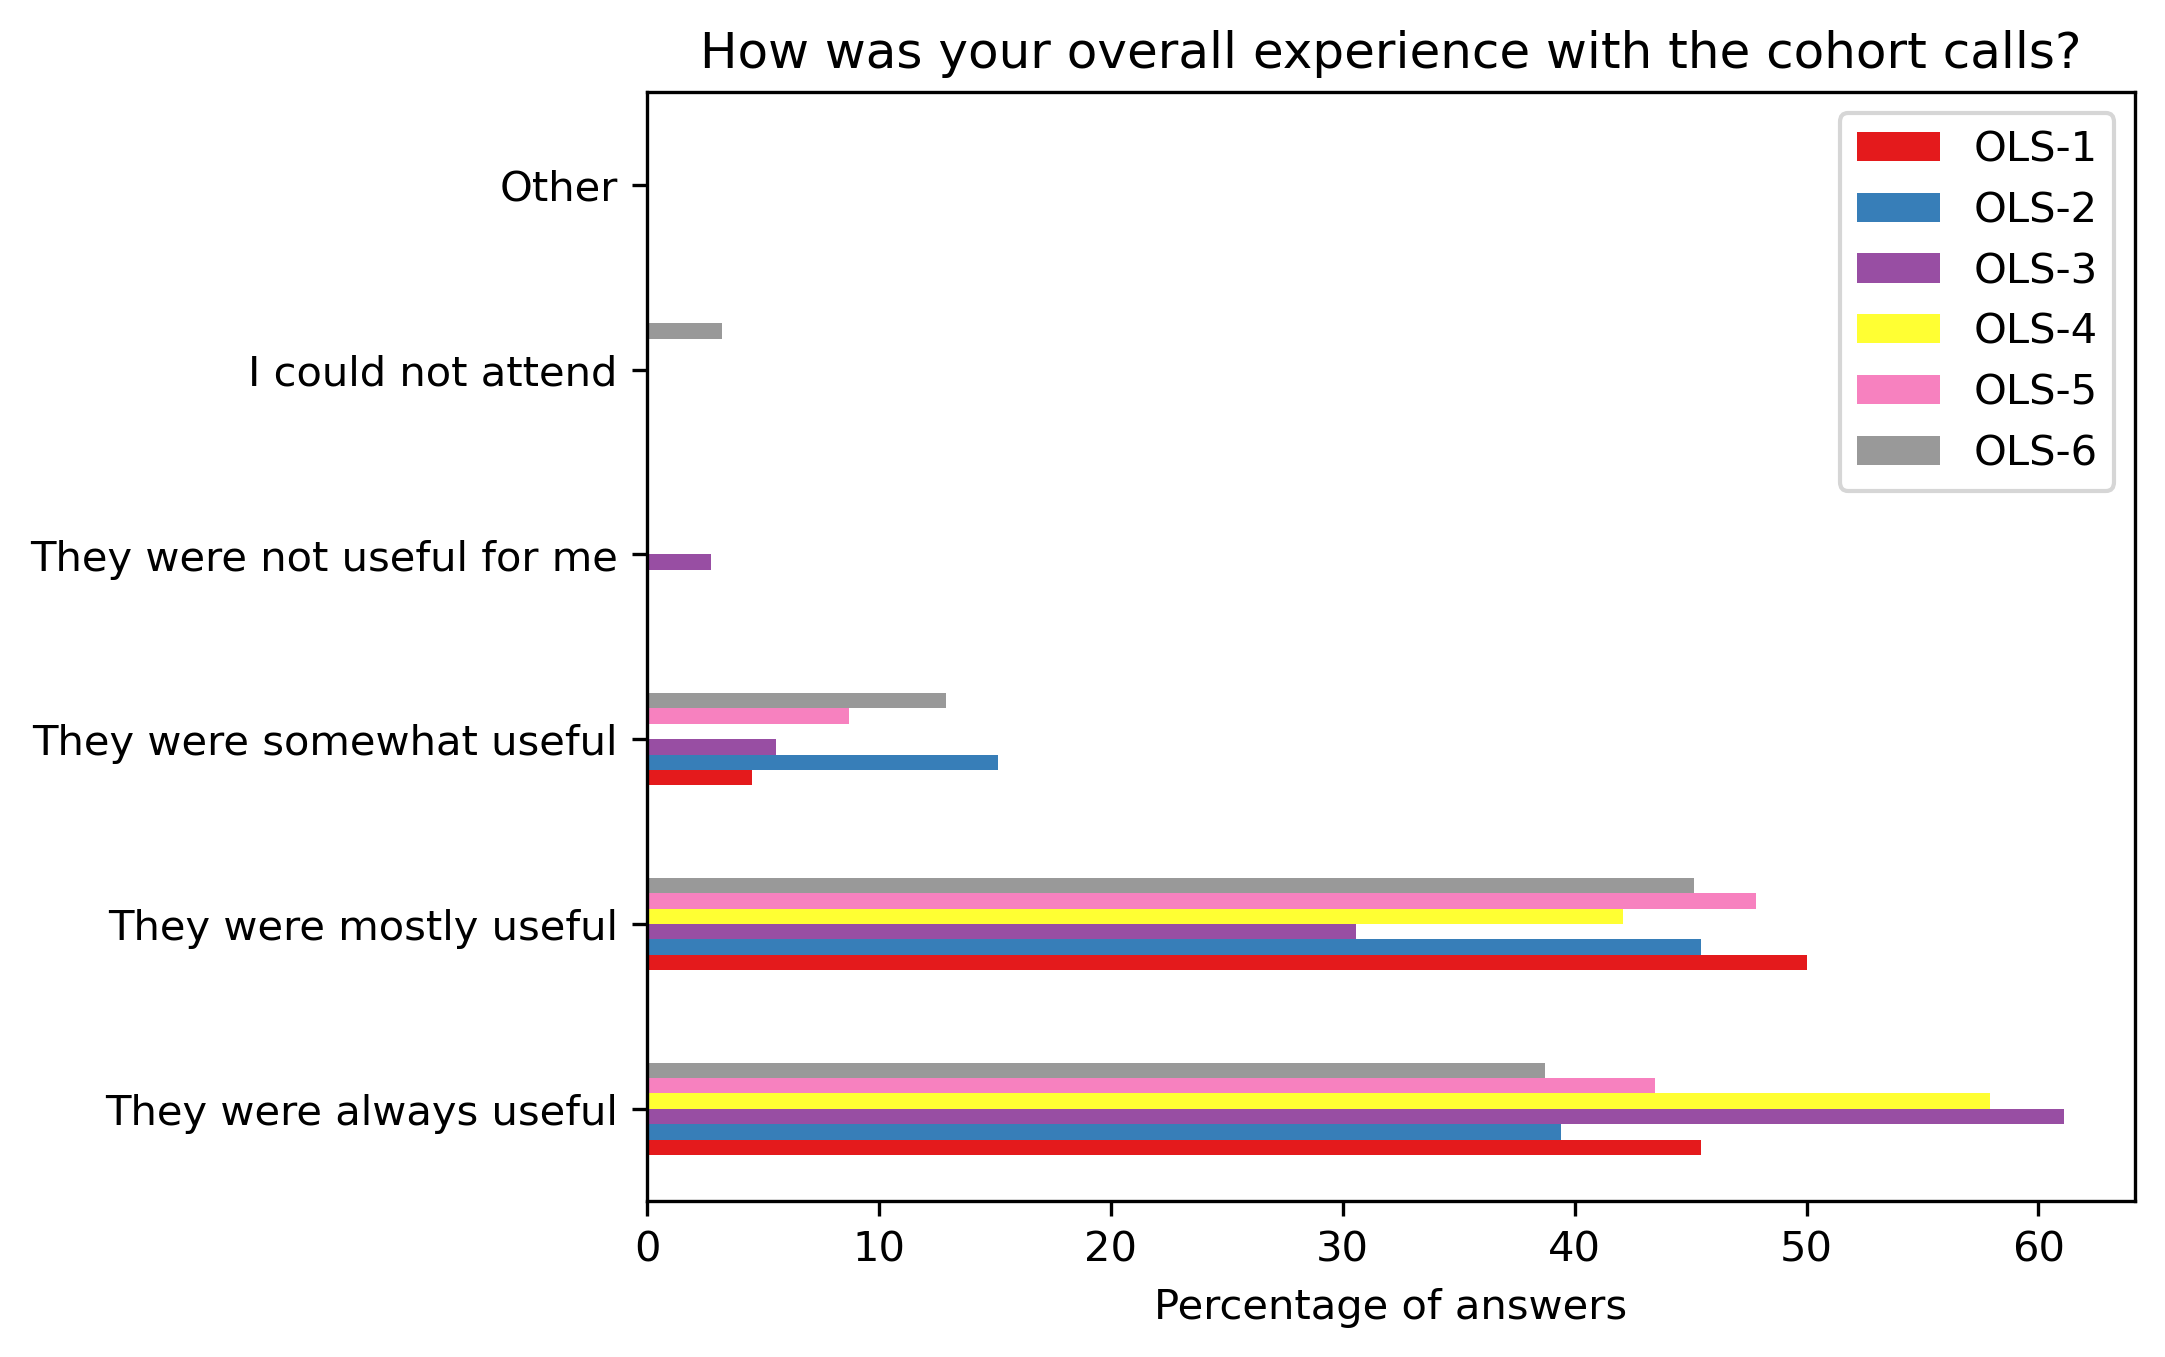

In [70]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q3_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall experience with the cohort calls?')

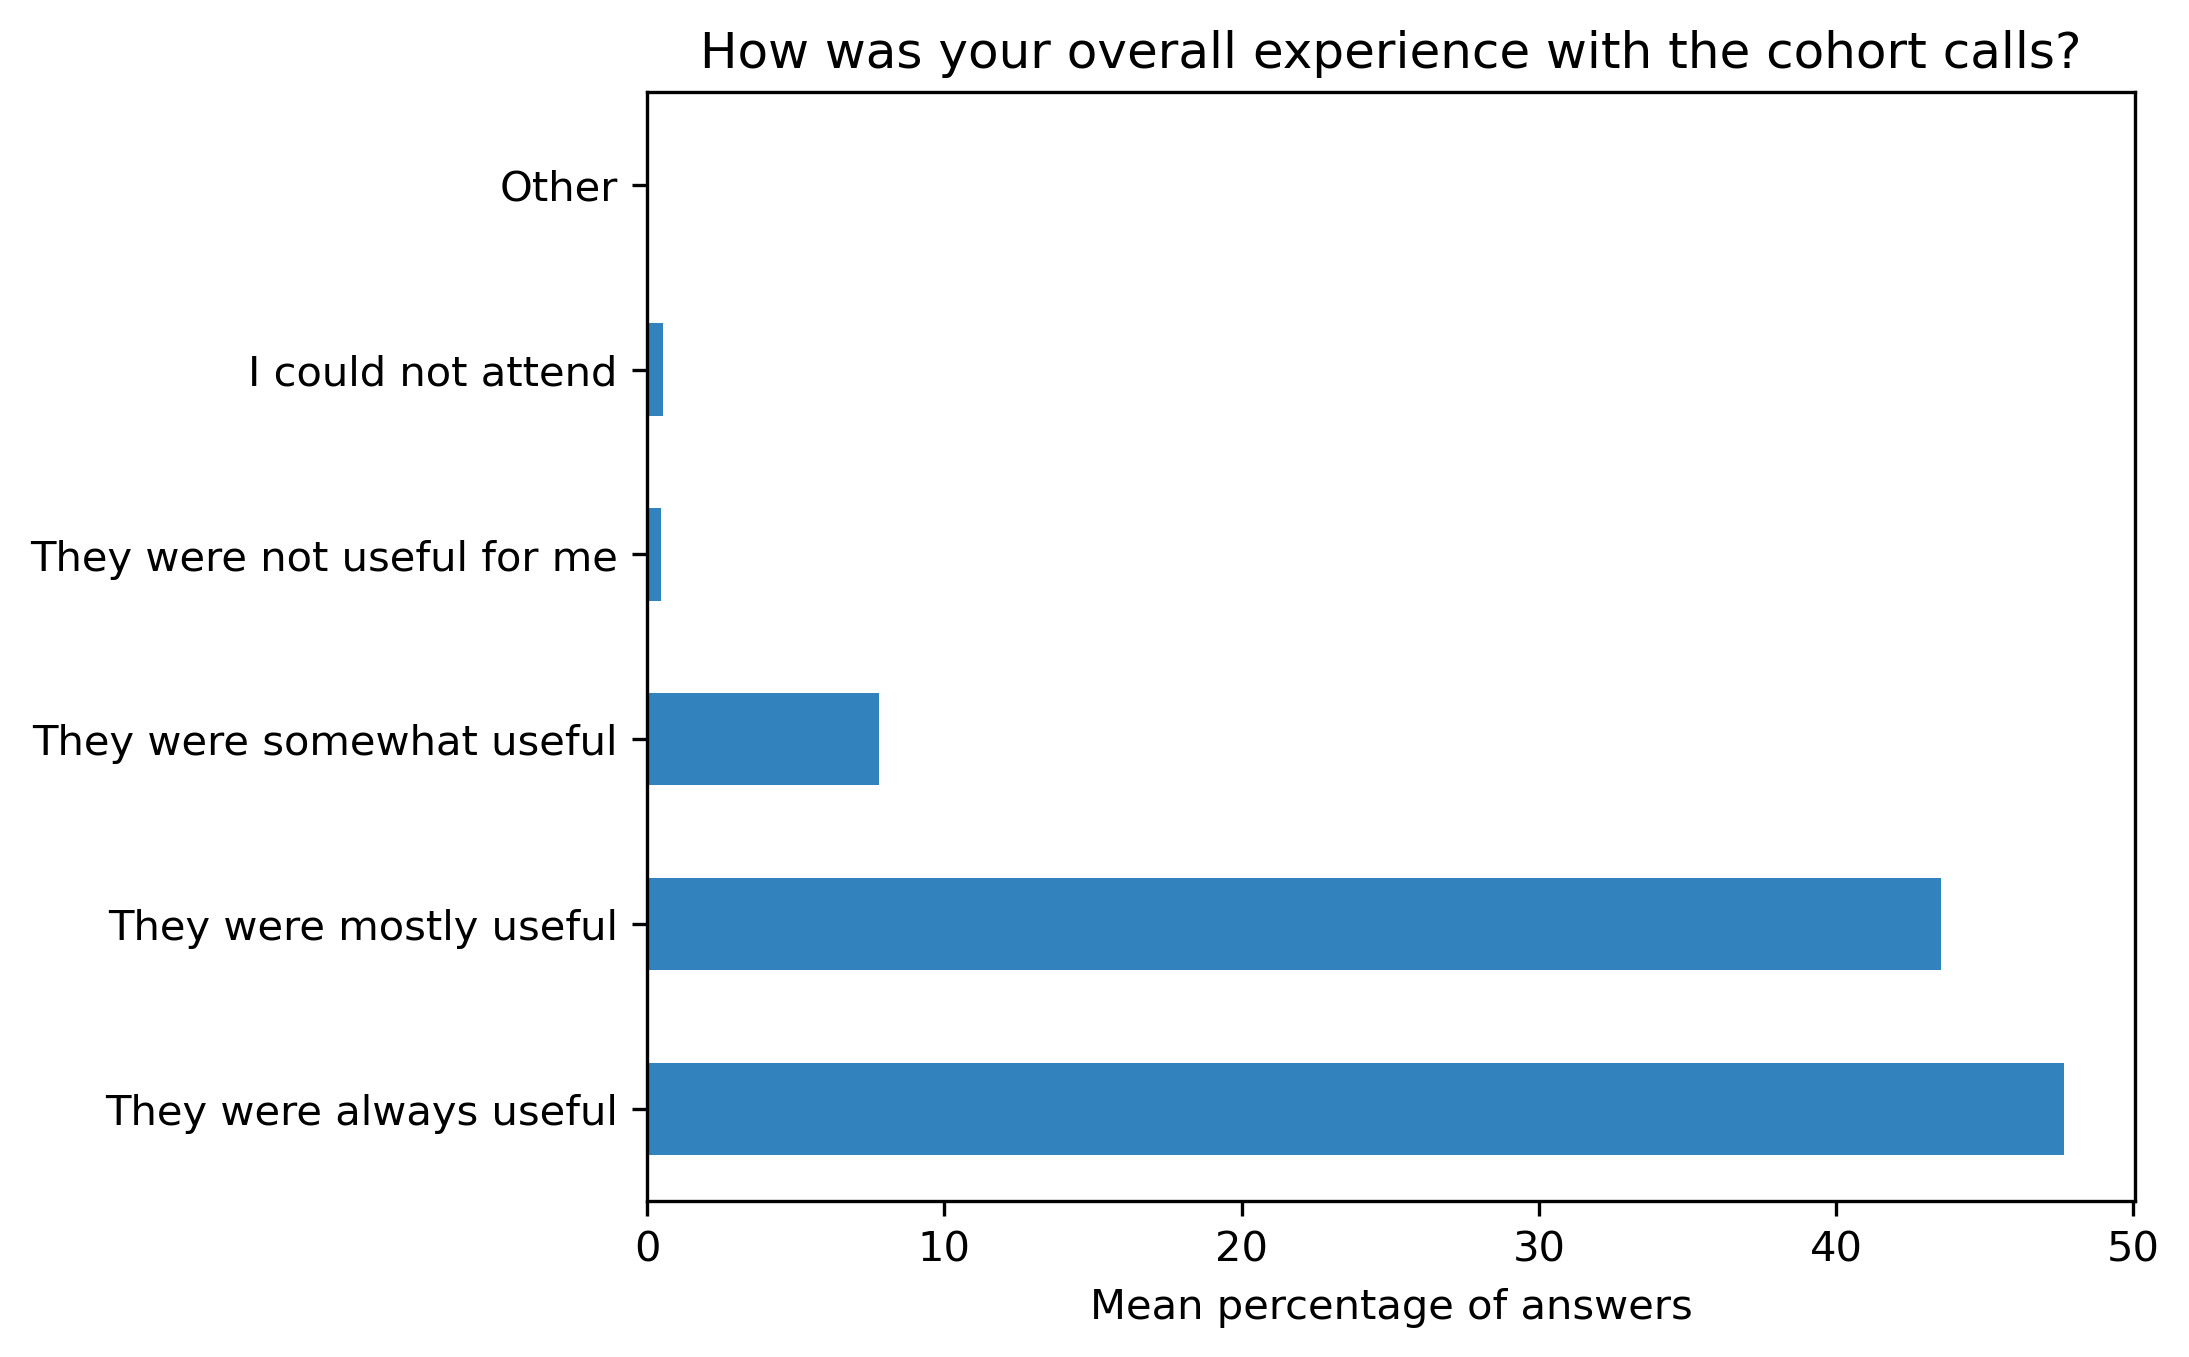

In [71]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q3_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [72]:
other_answer

[]

### Question 4: "Which of the following topics introduced in these cohort calls were useful for your open science journey?"

Possible answers:
- OLS Introduction
- Open Science Introduction
- Open Source Software
- Open Data
- Open Access Publication
- Open Science Infrastructures
- Open Educational Resources
- Open Engagement of Social Actors
- Open Hardware
- Open Evaluation
- Openness to Diversity of Knowledge
- Project Roadmapping
- Open Canvas
- Code of Conduct
- GitHub Introduction
- Open Licensing
- README
- Package Management
- Setting up a project
- Project Design for Collaboration
- Good Coding Practices
- Code Review
- Agile & Iteractive Project Management
- Community Design for Inclusivity
- Community Interactions
- Mountain of Engagement
- Equity Diversity & Inclusion (EDI)
- Ally Skills for Open Leaders
- Personal Ecology
- Personas & Pathways
- Open Leadership in Practice
- Open office/co-working hours and social calls
- Graduations
- Other

In [73]:
participant_q4 = {}
other_answer = []
col = "Which of the following topics introduced in these cohort calls were useful for your open science journey?"
answers = [
    "OLS Introduction",
    "Open Science Introduction",
    "Open Source Software",
    "Open Data",
    "Open Access Publication",
    "Open Science Infrastructures",
    "Open Educational Resources",
    "Open Engagement of Social Actors",
    "Open Hardware",
    "Open Evaluation",
    "Openness to Diversity of Knowledge",
    "Project Roadmapping",
    "Open Canvas",
    "Code of Conduct",
    "GitHub Introduction",
    "Open Licensing",
    "README",
    "Package Management",
    "Setting up a project",
    "Project Design for Collaboration",
    "Good Coding Practices",
    "Code Review",
    "Agile & Iteractive Project Management",
    "Community Design for Inclusivity",
    "Community Interactions",
    "Mountain of Engagement",
    "Equity Diversity & Inclusion (EDI)",
    "Ally Skills for Open Leaders",
    "Personal Ecology",
    "Personas & Pathways",
    "Open Leadership in Practice",
    "Open office/co-working hours and social calls",
    "Graduation rehearsals",
    "Graduations",
    "Other"]
for c in participant_df:
    participant_q4[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q4_df = pd.DataFrame.from_dict(participant_q4)
participant_q4_df

OLS-1  OLS-2  OLS-3  OLS-4  \
OLS Introduction                                   0      0      0      0   
Open Science Introduction                          0      0      0      0   
Open Source Software                               0      0      0     10   
Open Data                                          0     22     22     10   
Open Access Publication                           13     23     23     10   
Open Science Infrastructures                       0      0      0      0   
Open Educational Resources                        13     23      0     10   
Open Engagement of Social Actors                  13      0     23      8   
Open Hardware                                      0      0      0      0   
Open Evaluation                                   13     23     23      0   
Openness to Diversity of Knowledge                 0      0      0      0   
Project Roadmapping                               20     30     27     18   
Open Canvas                                       20     30     27     18   
Code of Conduct                                   16     27     23     18   
GitHub Introduction                               14     26     21     13   
Open Licensing                                    16     27     23     18   
README                                            14     26     21     13   
Package Management                                 0      0      0      0   
Setting up a project                               0      0      0      0   
Project Design for Collaboration                   0      0      0      0   
Good Coding Practices                              0      0      0      0   
Code Review                                        0      0      0      0   
Agile & Iteractive Project Management             13     17     21     11   
Community Design for Inclusivity                  18     26     20      0   
Community Interactions                            19     20     12      9   
Mountain of Engagement                            19     20     12      9   
Equity Diversity & Inclusion (EDI)                18     26     20     10   
Ally Skills for Open Leaders                      12     20     10     13   
Personal Ecology                                  13     21     16     10   
Personas & Pathways                               16     22     13     12   
Open Leadership in Practice                        7     13     10     12   
Open office/co-working hours and social calls     12      9     10      6   
Graduation rehearsals                             11     16     15     13   
Graduations                                       15     23     16     11   
Other                                              0      7      0      3   

                                               OLS-5  OLS-6  
OLS Introduction                                   0      0  
Open Science Introduction                          0      0  
Open Source Software                              10     11  
Open Data                                          7     11  
Open Access Publication                           10     11  
Open Science Infrastructures                       0      0  
Open Educational Resources                        10     11  
Open Engagement of Social Actors                   5      6  
Open Hardware                                      0      0  
Open Evaluation                                    0      0  
Openness to Diversity of Knowledge                 0      0  
Project Roadmapping                               21     24  
Open Canvas                                       21     24  
Code of Conduct                                   13     15  
GitHub Introduction                               18     21  
Open Licensing                                    13     15  
README                                            18     21  
Package Management                                 0      0  
Setting up a project                               0      0  
Project Design for Collaboration  

In [74]:
participant_q4_df = 100 * participant_q4_df / participant_q4_df.sum()

Text(0.5, 1.0, 'Which of the following topics introduced in these cohort calls were useful for your open science journey?')

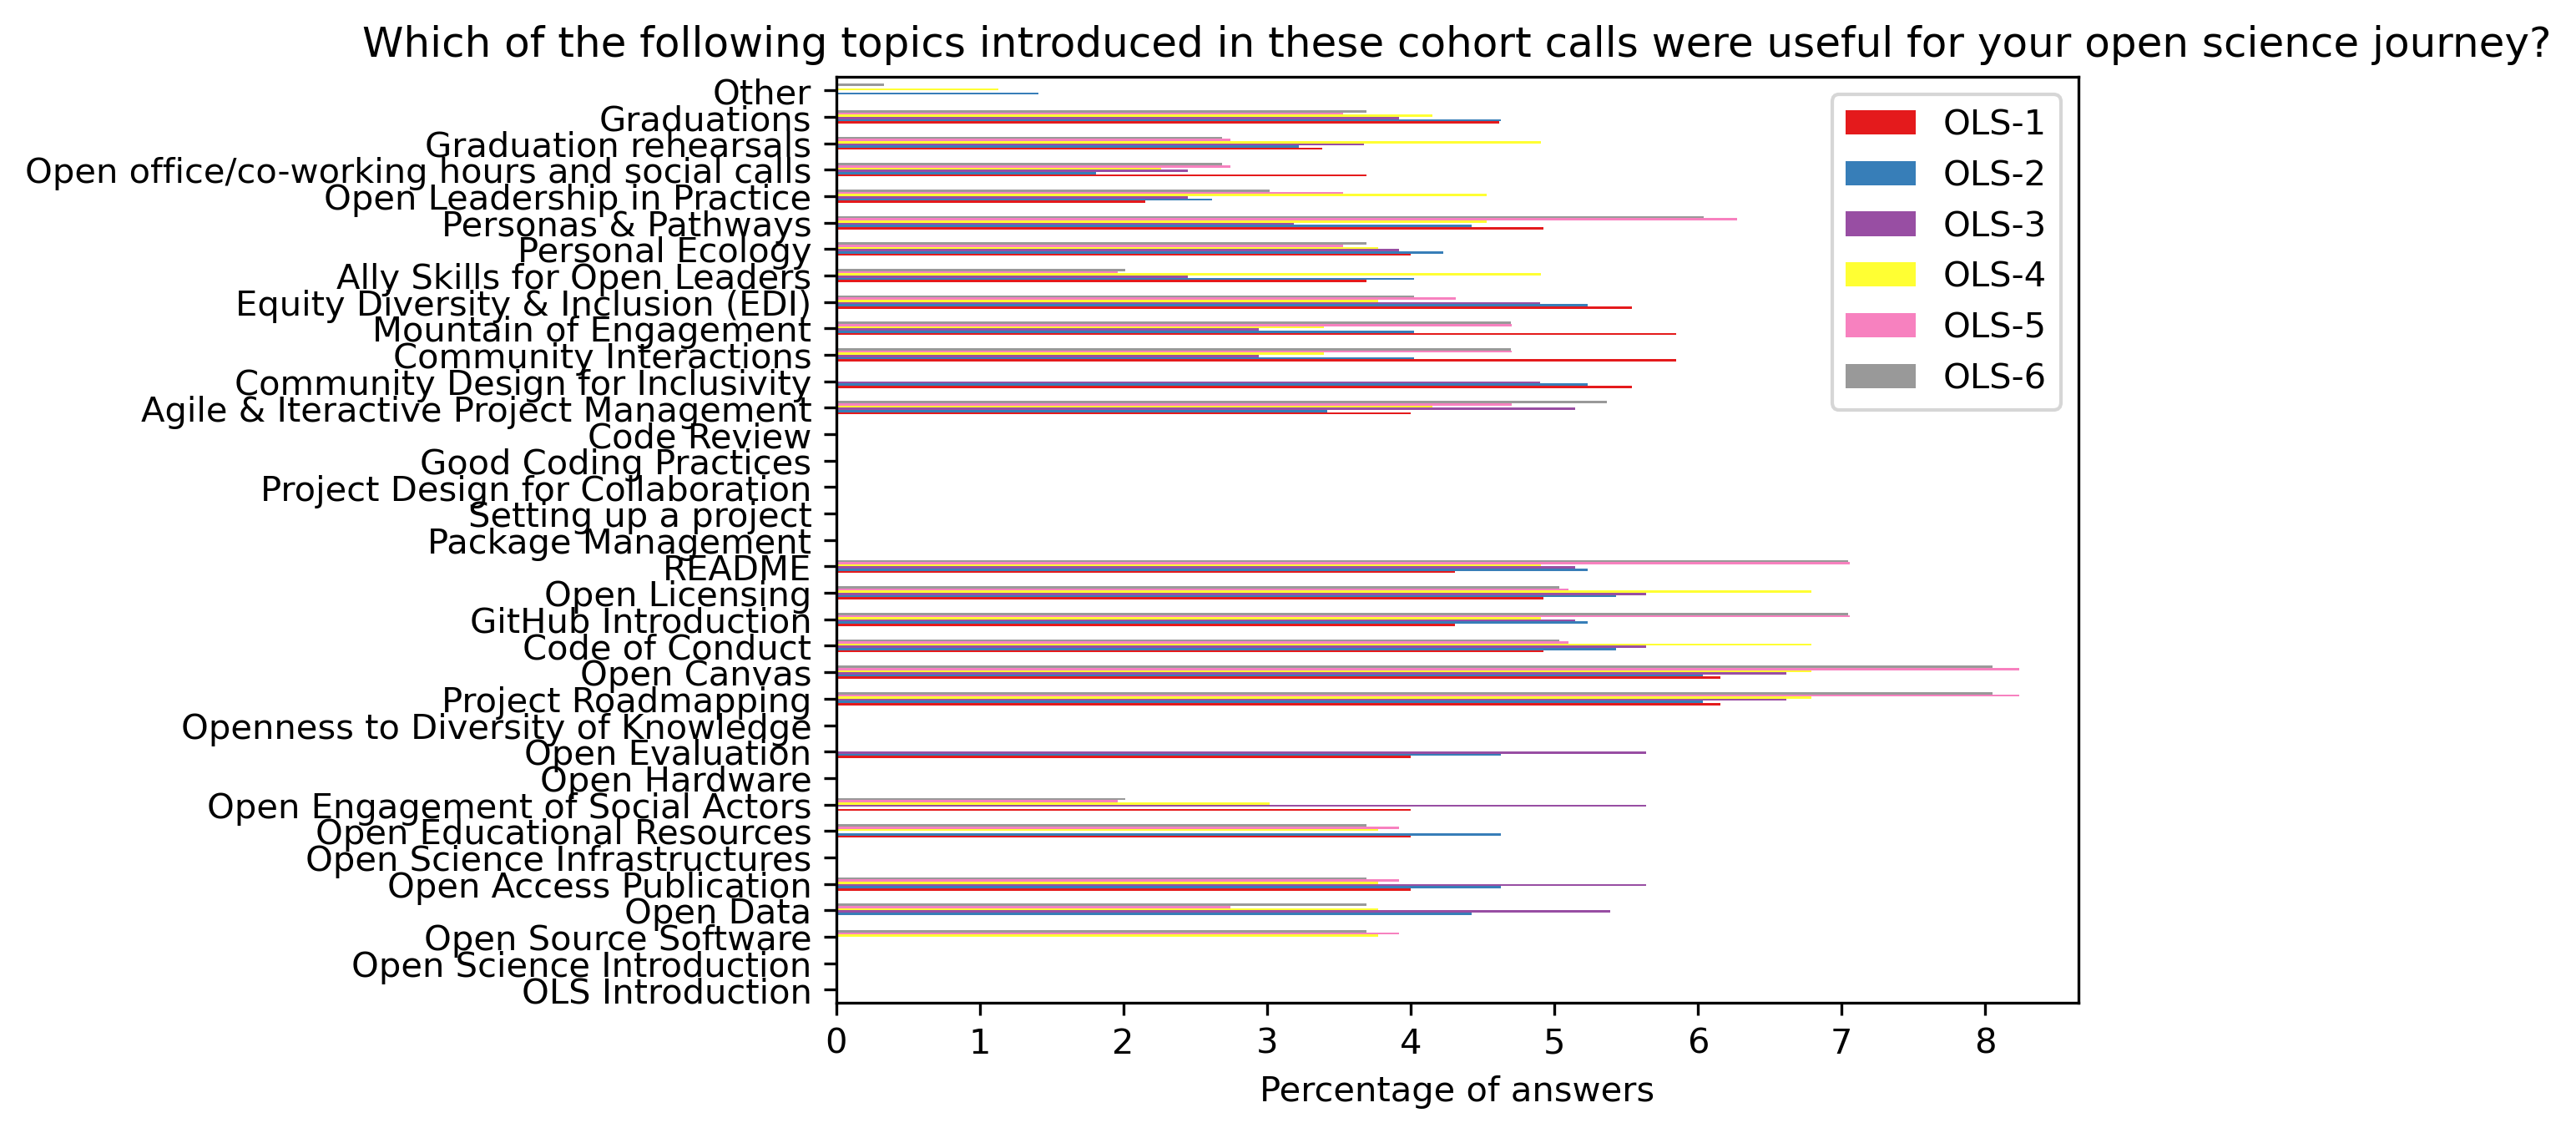

In [75]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q4_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Which of the following topics introduced in these cohort calls were useful for your open science journey?')

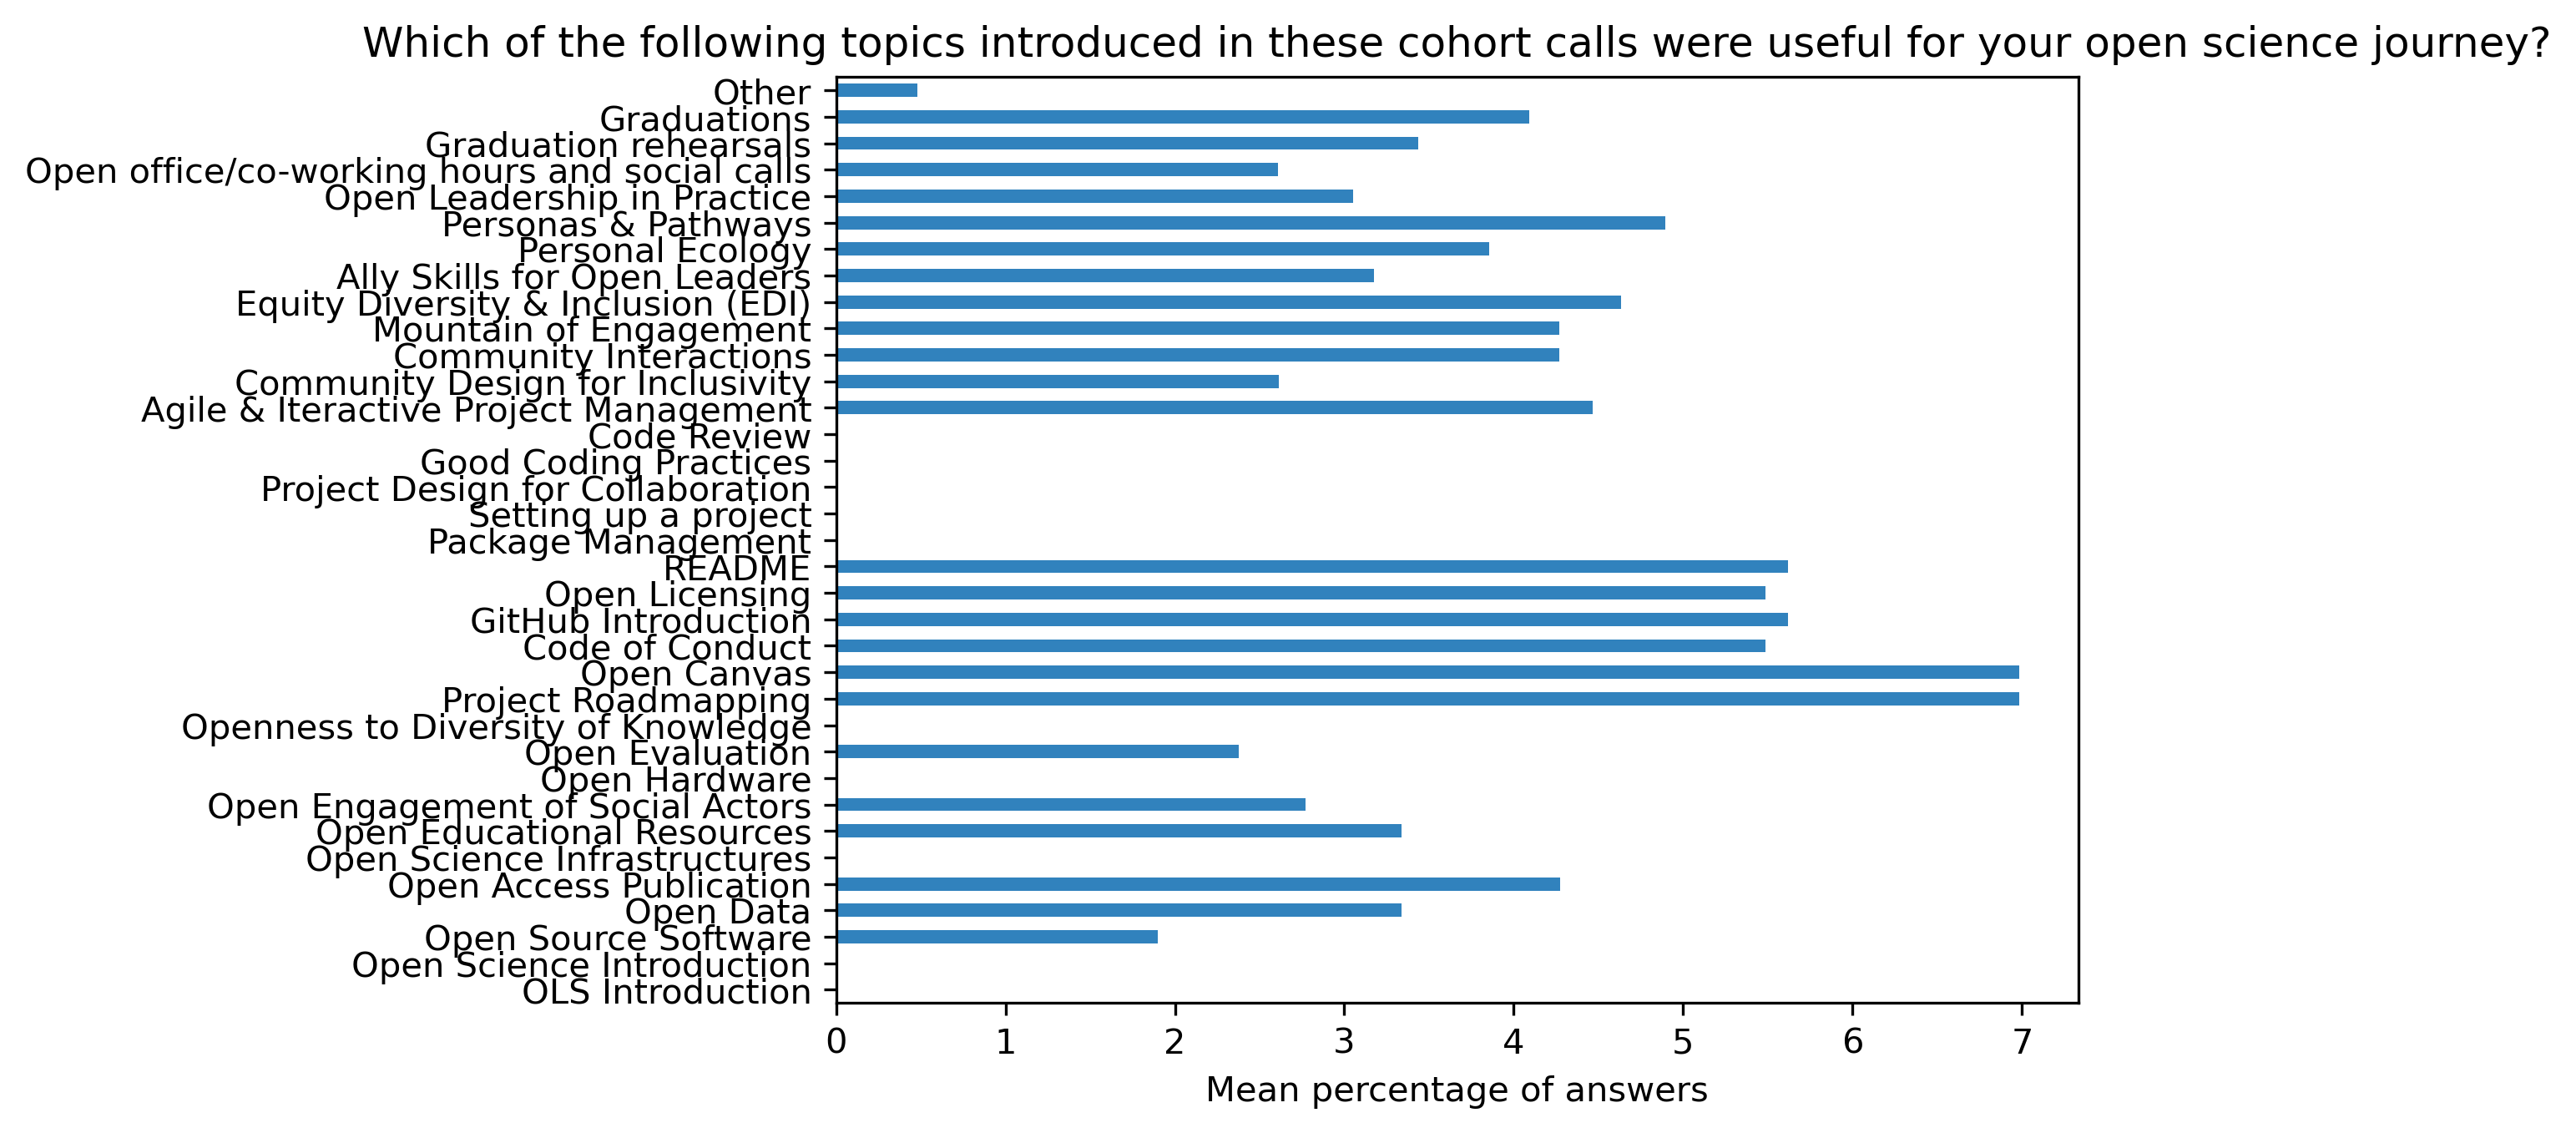

In [76]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q4_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [77]:
tag_topic_mapping = (pd.read_csv("https://docs.google.com/spreadsheets/d/1sDJLG8RuoShWUQN78lvx_mghBbGfusdzlb1WwYrCbjk/export?format=csv&gid=0")
    .replace("Equity, Diversity and ", "Equity Diversity & ", regex=True)
    .set_index("Tag")
    .drop(columns=["Description", "Comments from Malvika"]))
extra_mapping = (pd.DataFrame({
    'Tag':['Graduation rehearsals', 'Graduations', 'Open office/co-working hours and social calls', 'Other'],
    'Topic':['Graduations','Graduations','Open office/co-working hours and social calls', 'Other']})
    .set_index("Tag"))
tag_topic_mapping = pd.concat([tag_topic_mapping, extra_mapping])

In [78]:
participant_q4_by_topic_df = (participant_q4_df.join(tag_topic_mapping)
    .groupby(by="Topic")
    .sum())

Text(0.5, 1.0, 'Which of the following topics introduced in these cohort calls were useful for your open science journey?')

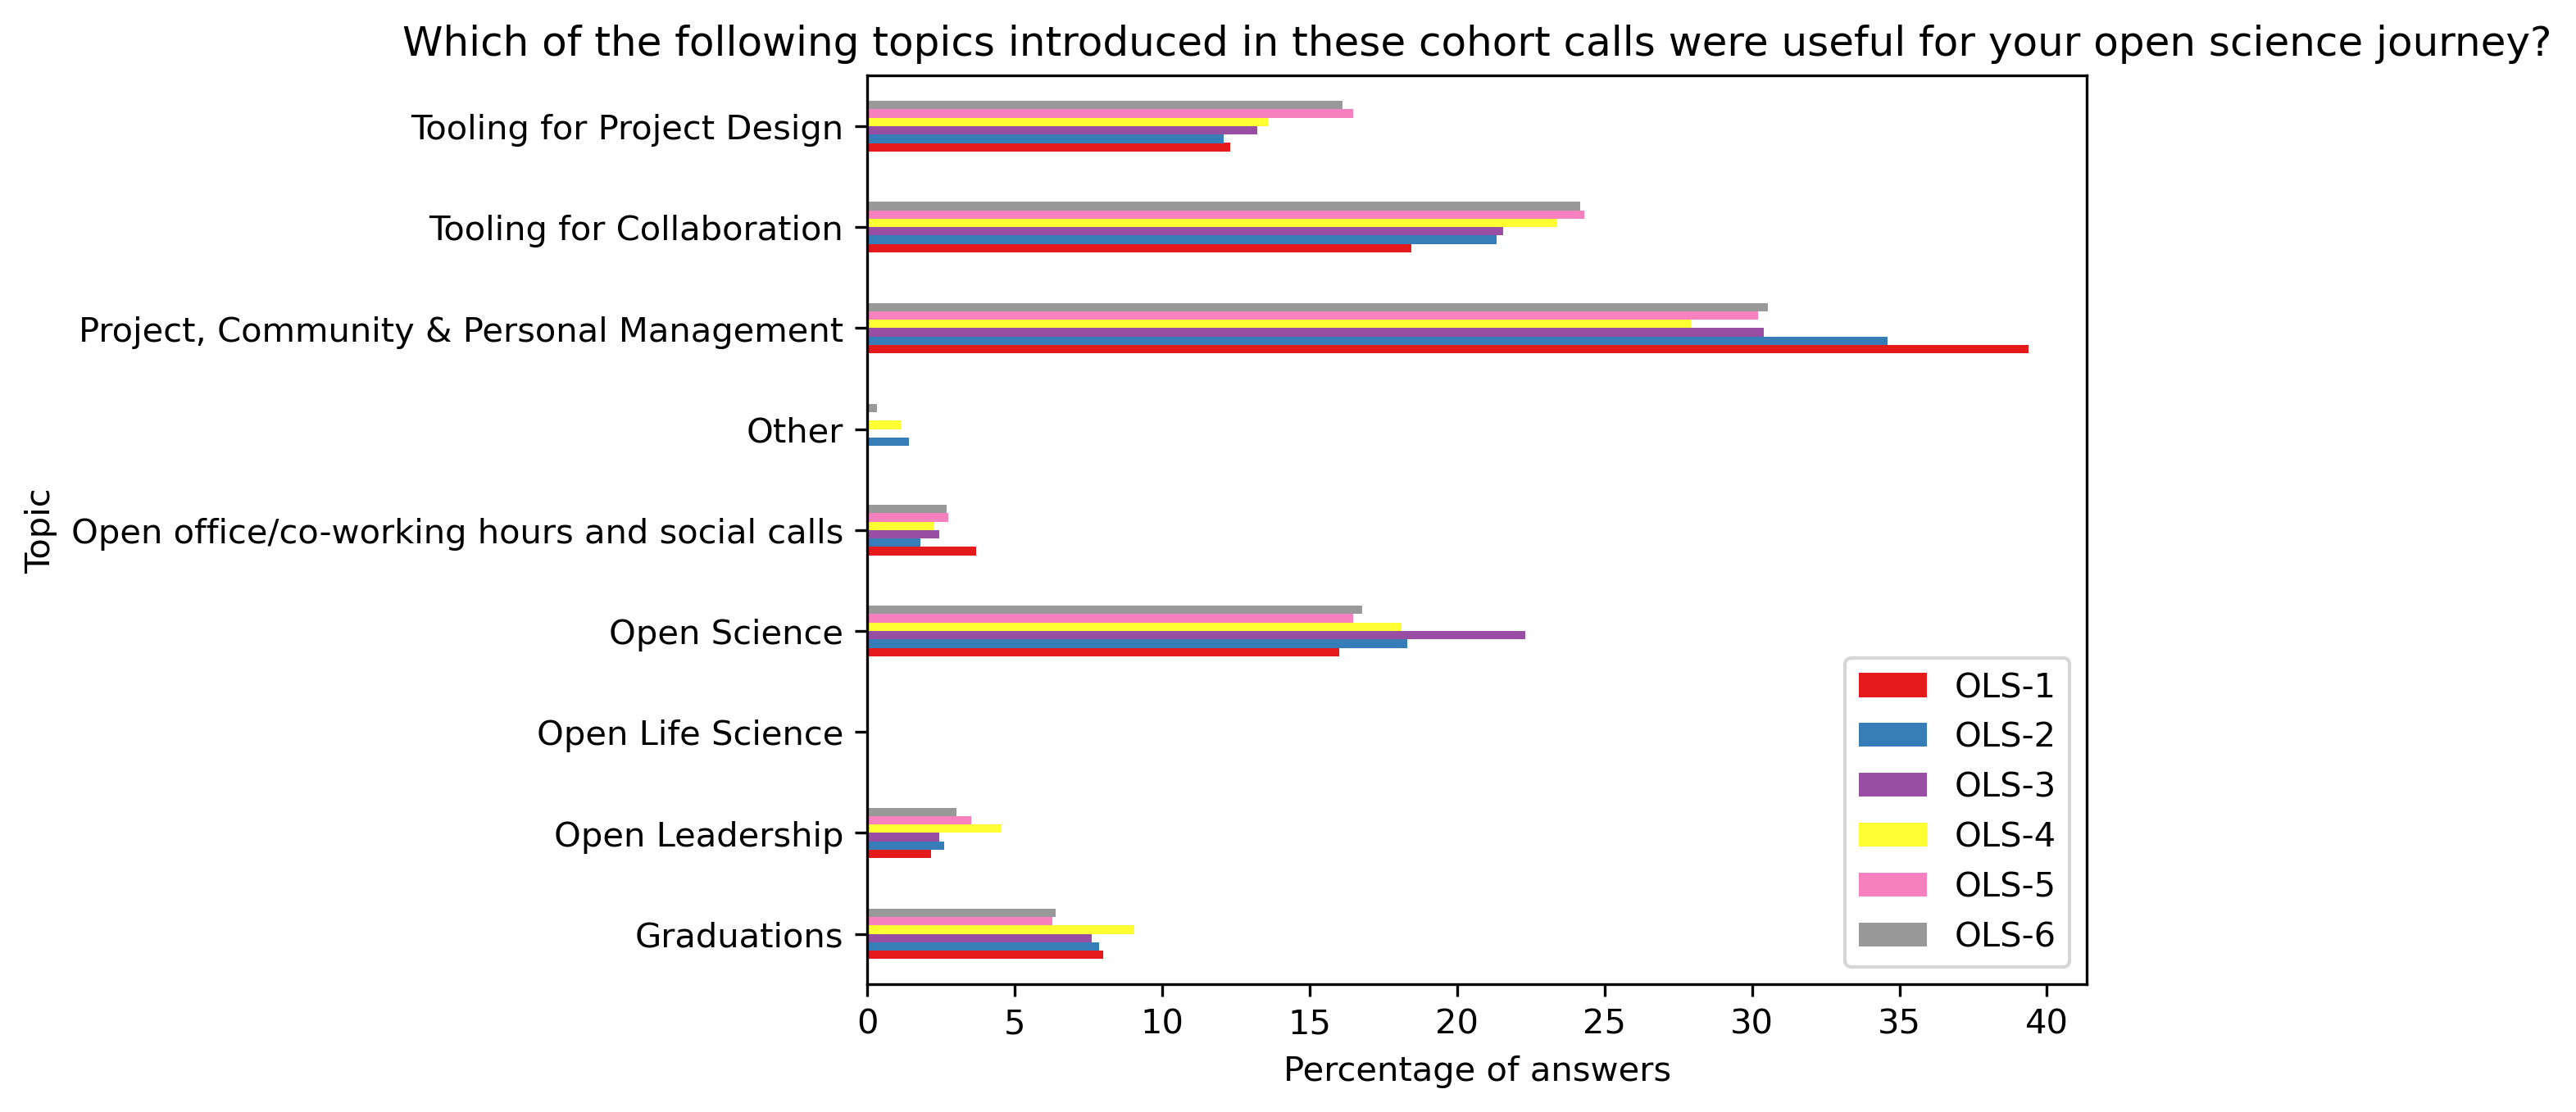

In [79]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q4_by_topic_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)

Text(0.5, 1.0, 'Which of the following topics introduced in these cohort calls were useful for your open science journey?')

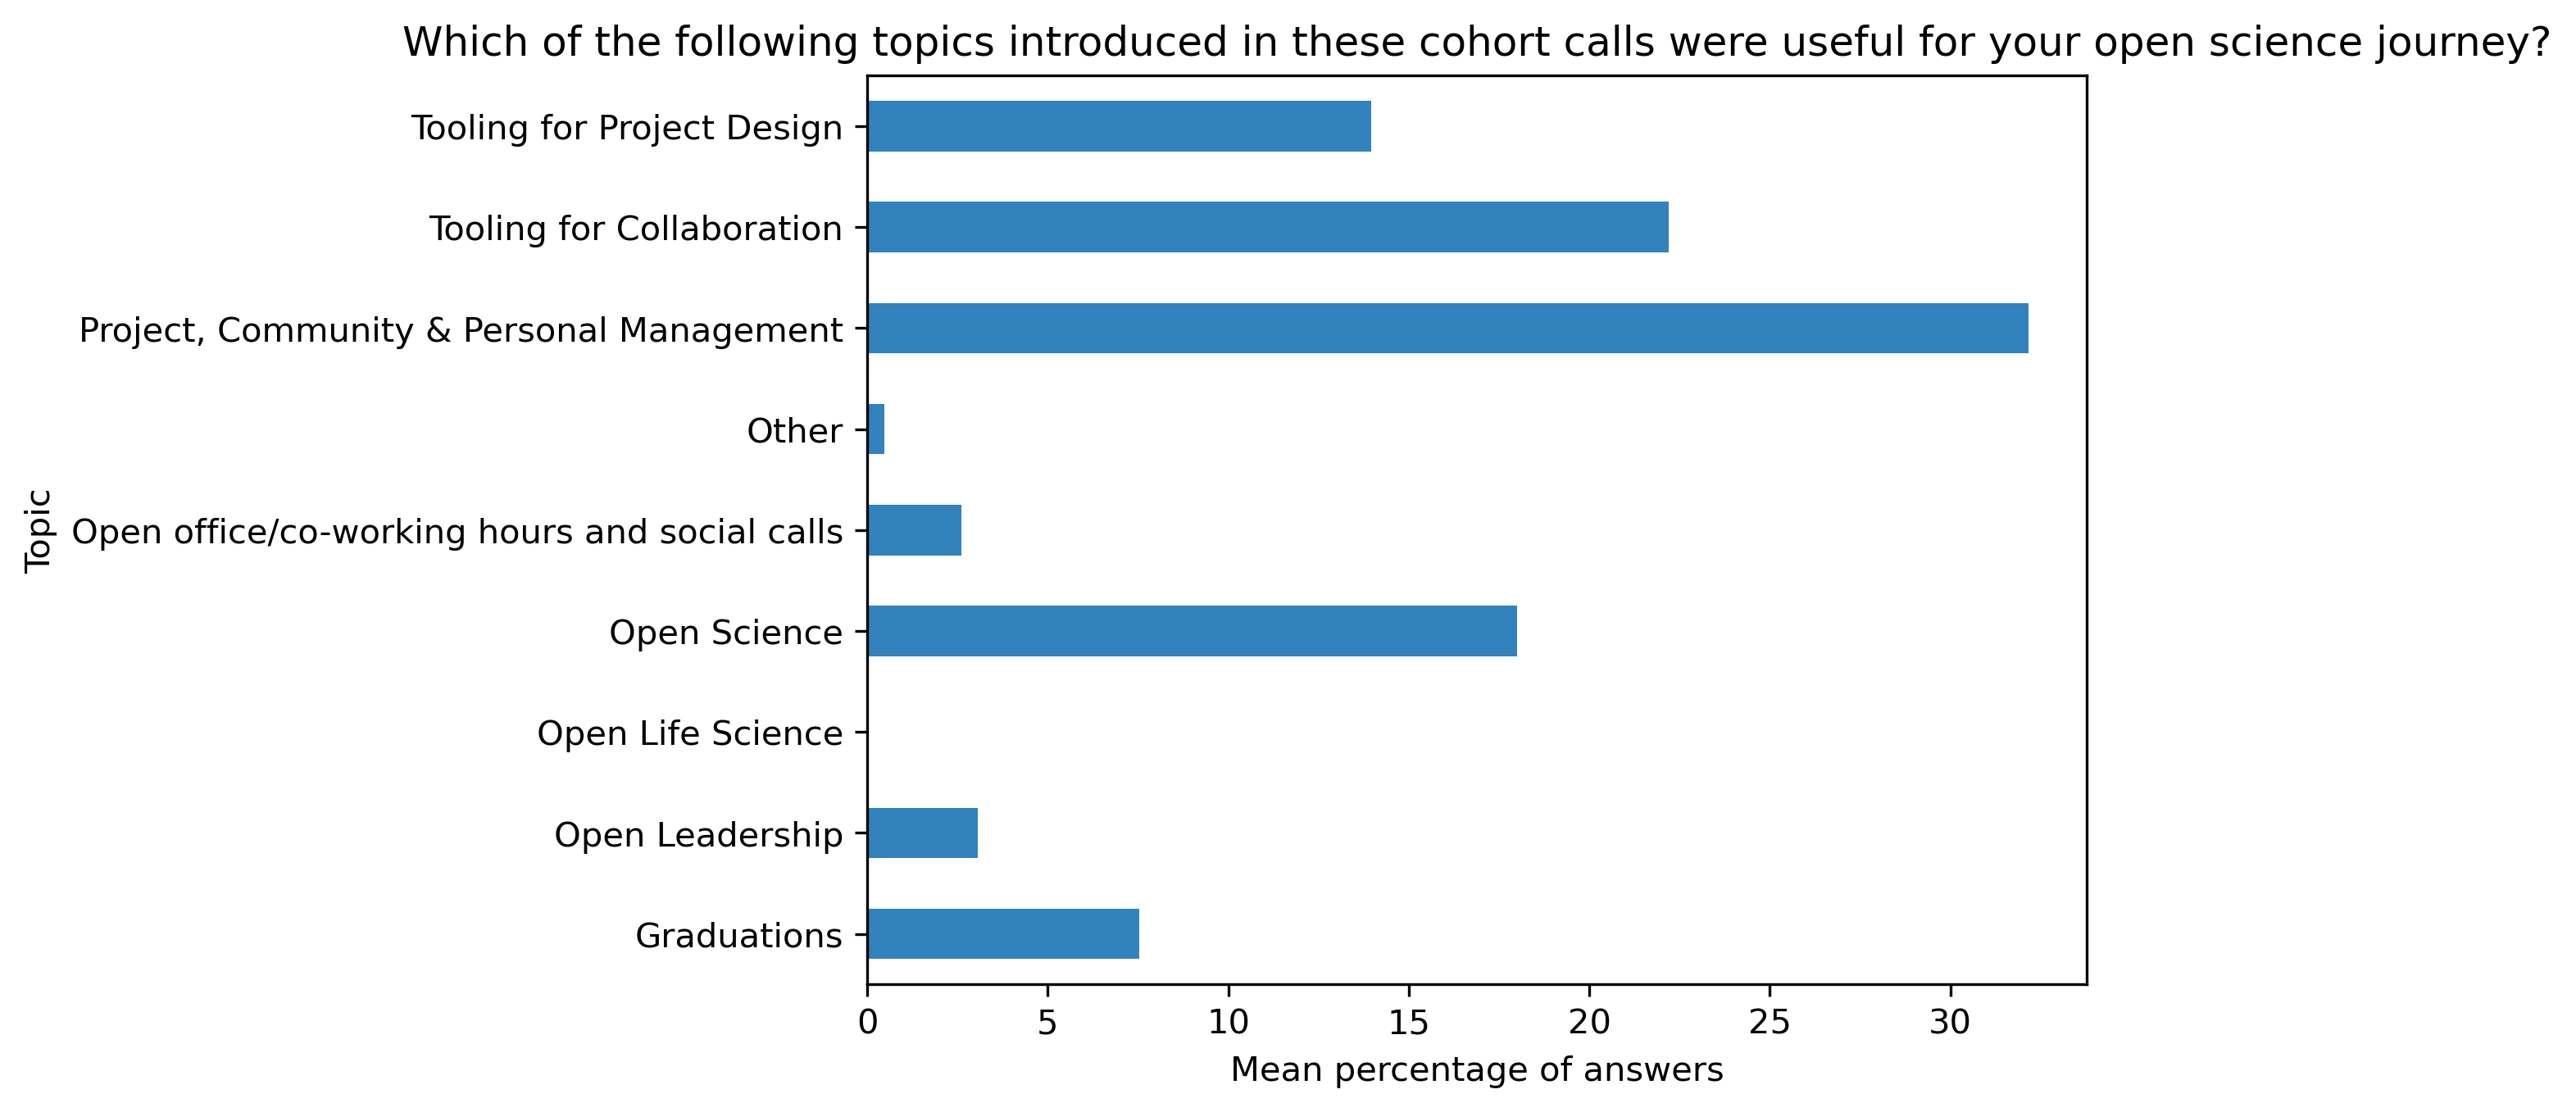

In [80]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q4_by_topic_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [81]:
other_answer

['Breakout rooms were really nice exploit to get to know other participants and share experience. ',
 "The ones I haven't ticked are mainly because I haven't caught up with them yet. Generally - all useful (in varying amounts). The less useful ones were only less useful because I knew a moderate amount about them already. Several",
 'that I thought I knew a fair amount about',
 "turns out I didn't / there was still a lot for me to learn!",
 'Breakout rooms was so useful too.',
 'As I read this list I am reminded on all I learnt and all I hope to read further into!',
 "They were all useful! The ones I've ticked were just the particularly relevant ones at this stage.",
 'Actually all were useful',
 'those ones were just my favourite ones :)',
 'I still need to watch some of the recordings',
 "Can't accurately answer as haven't worked through all of the sessions"]

### Question 5: "Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?"

Possible answers:
- Yes I'd like to return as a mentor
- Yes I'd like to return as an expert
- Yes I'd like to return as a collaborator to run this program in my network
- Yes I am interesting in joining the OLS steering committee
- I am not sure yet, but ask me later
- No, I would not be able to return to OLS-6
- Other

In [82]:
participant_q5 = {}
other_answer = []
col = "Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a call facilitator",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in participant_df:
    participant_q5[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q5_df = pd.DataFrame.from_dict(participant_q5)
participant_q5_df

OLS-1  OLS-2  OLS-3  \
Yes I'd like to return as a mentor                      7     12      5   
Yes I'd like to return as an expert                     1      6      4   
Yes I'd like to return as a call facilitator            0      0      0   
Yes I'd like to return as a collaborator to run...      5      4      5   
I am not sure yet but ask me later                     10     15      0   
I would take a break but please keep me informe...      0      1      0   
No I would not be able to return                        3      1      7   
Other                                                   7     13     21   

                                                    OLS-4  OLS-5  OLS-6  
Yes I'd like to return as a mentor                      9      9      9  
Yes I'd like to return as an expert                     7      4      6  
Yes I'd like to return as a call facilitator            2      6      8  
Yes I'd like to return as a collaborator to run...      1      6      9  
I am not sure yet but ask me later                      4      8     10  
I would take a break but please keep me informe...      0      0      0  
No I would not be able to return                        0      0      2  
Other                                                   9      8      4

In [83]:
participant_q5_df = 100 * participant_q5_df / participant_q5_df.sum()

Text(0.5, 1.0, 'Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?')

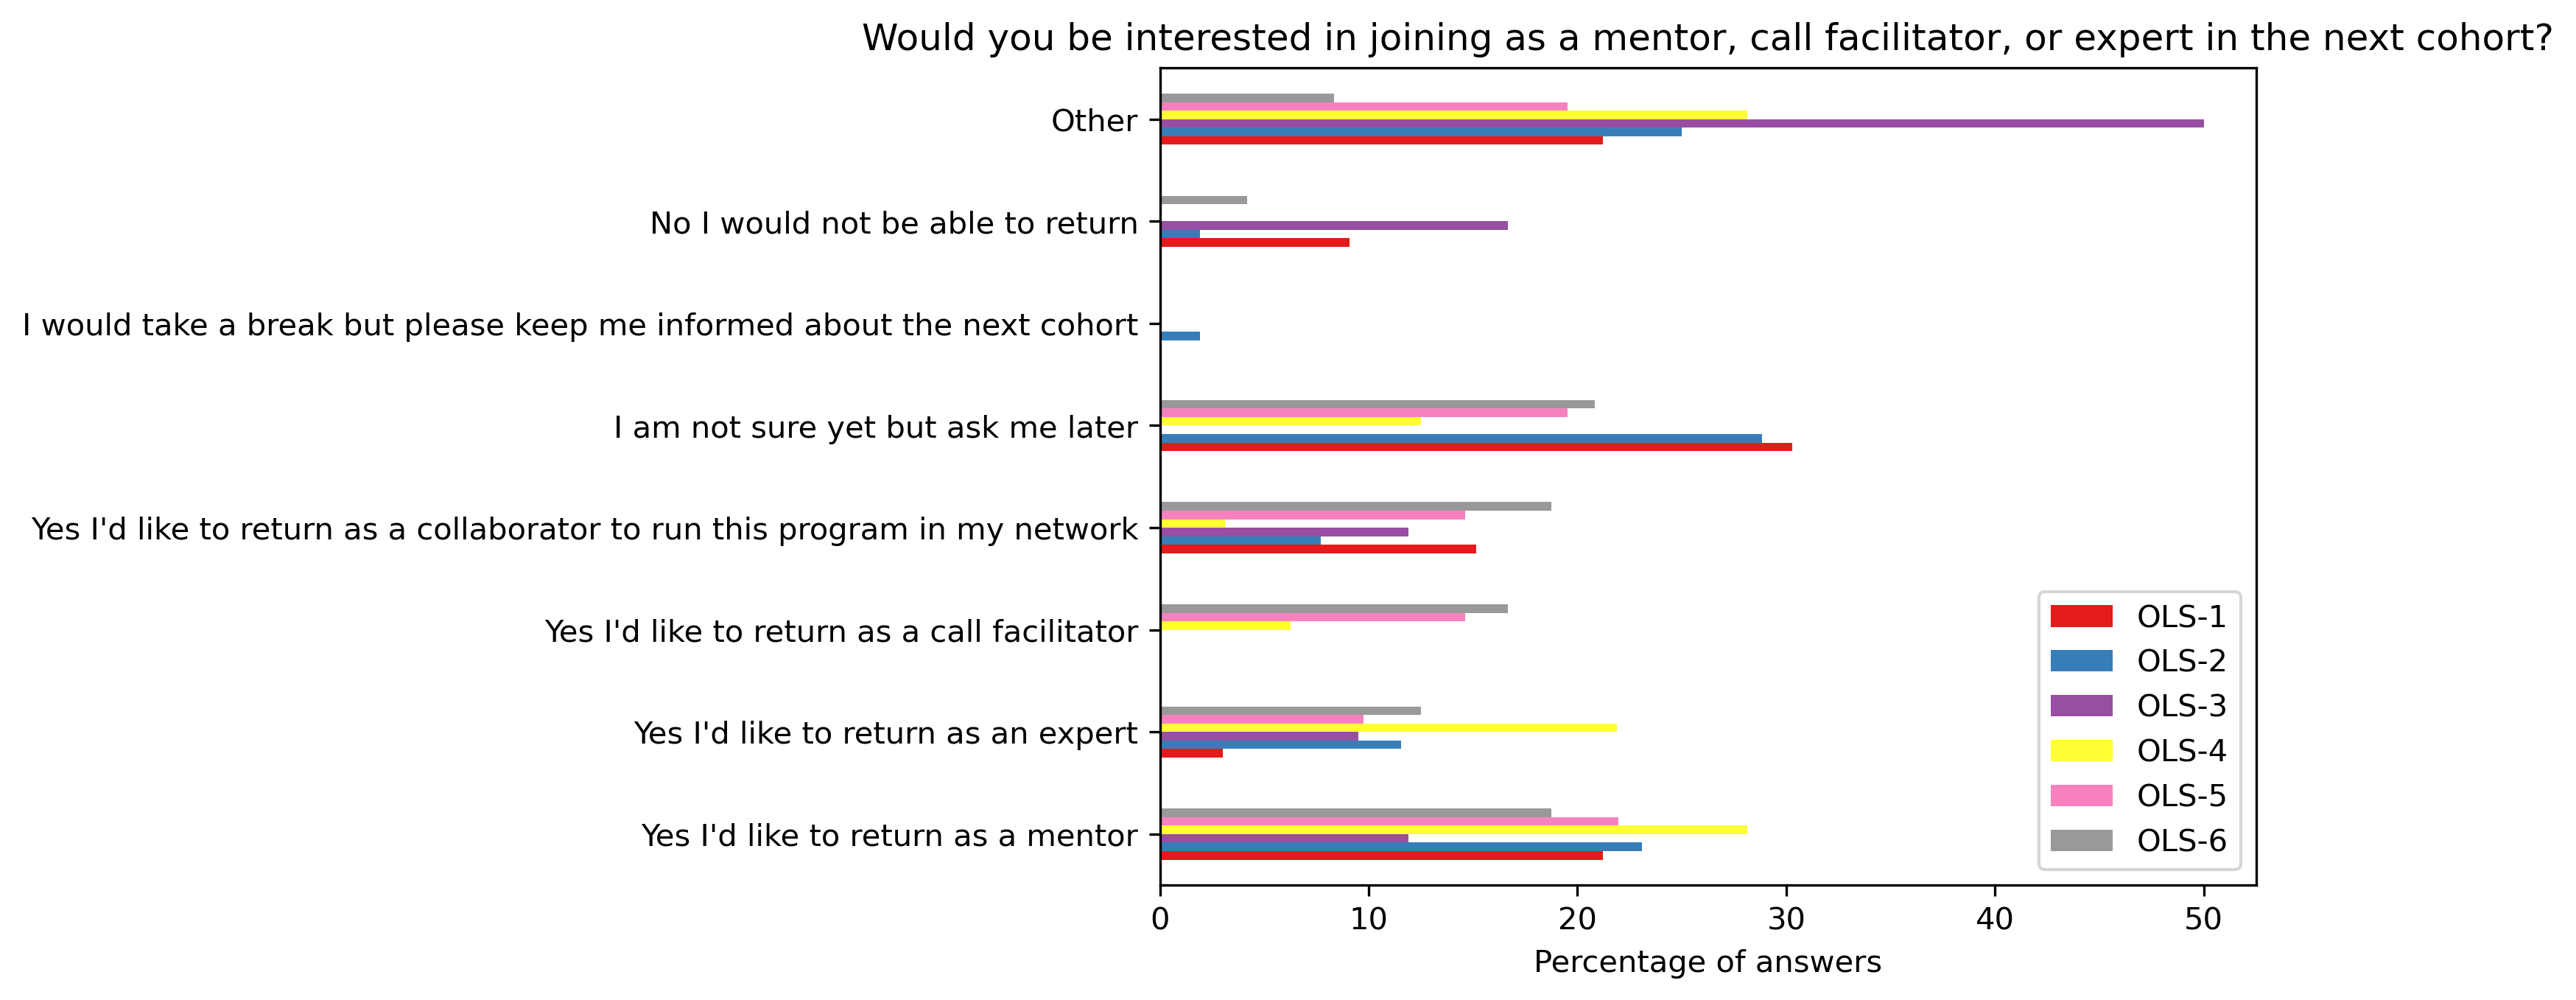

In [84]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q5_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?')

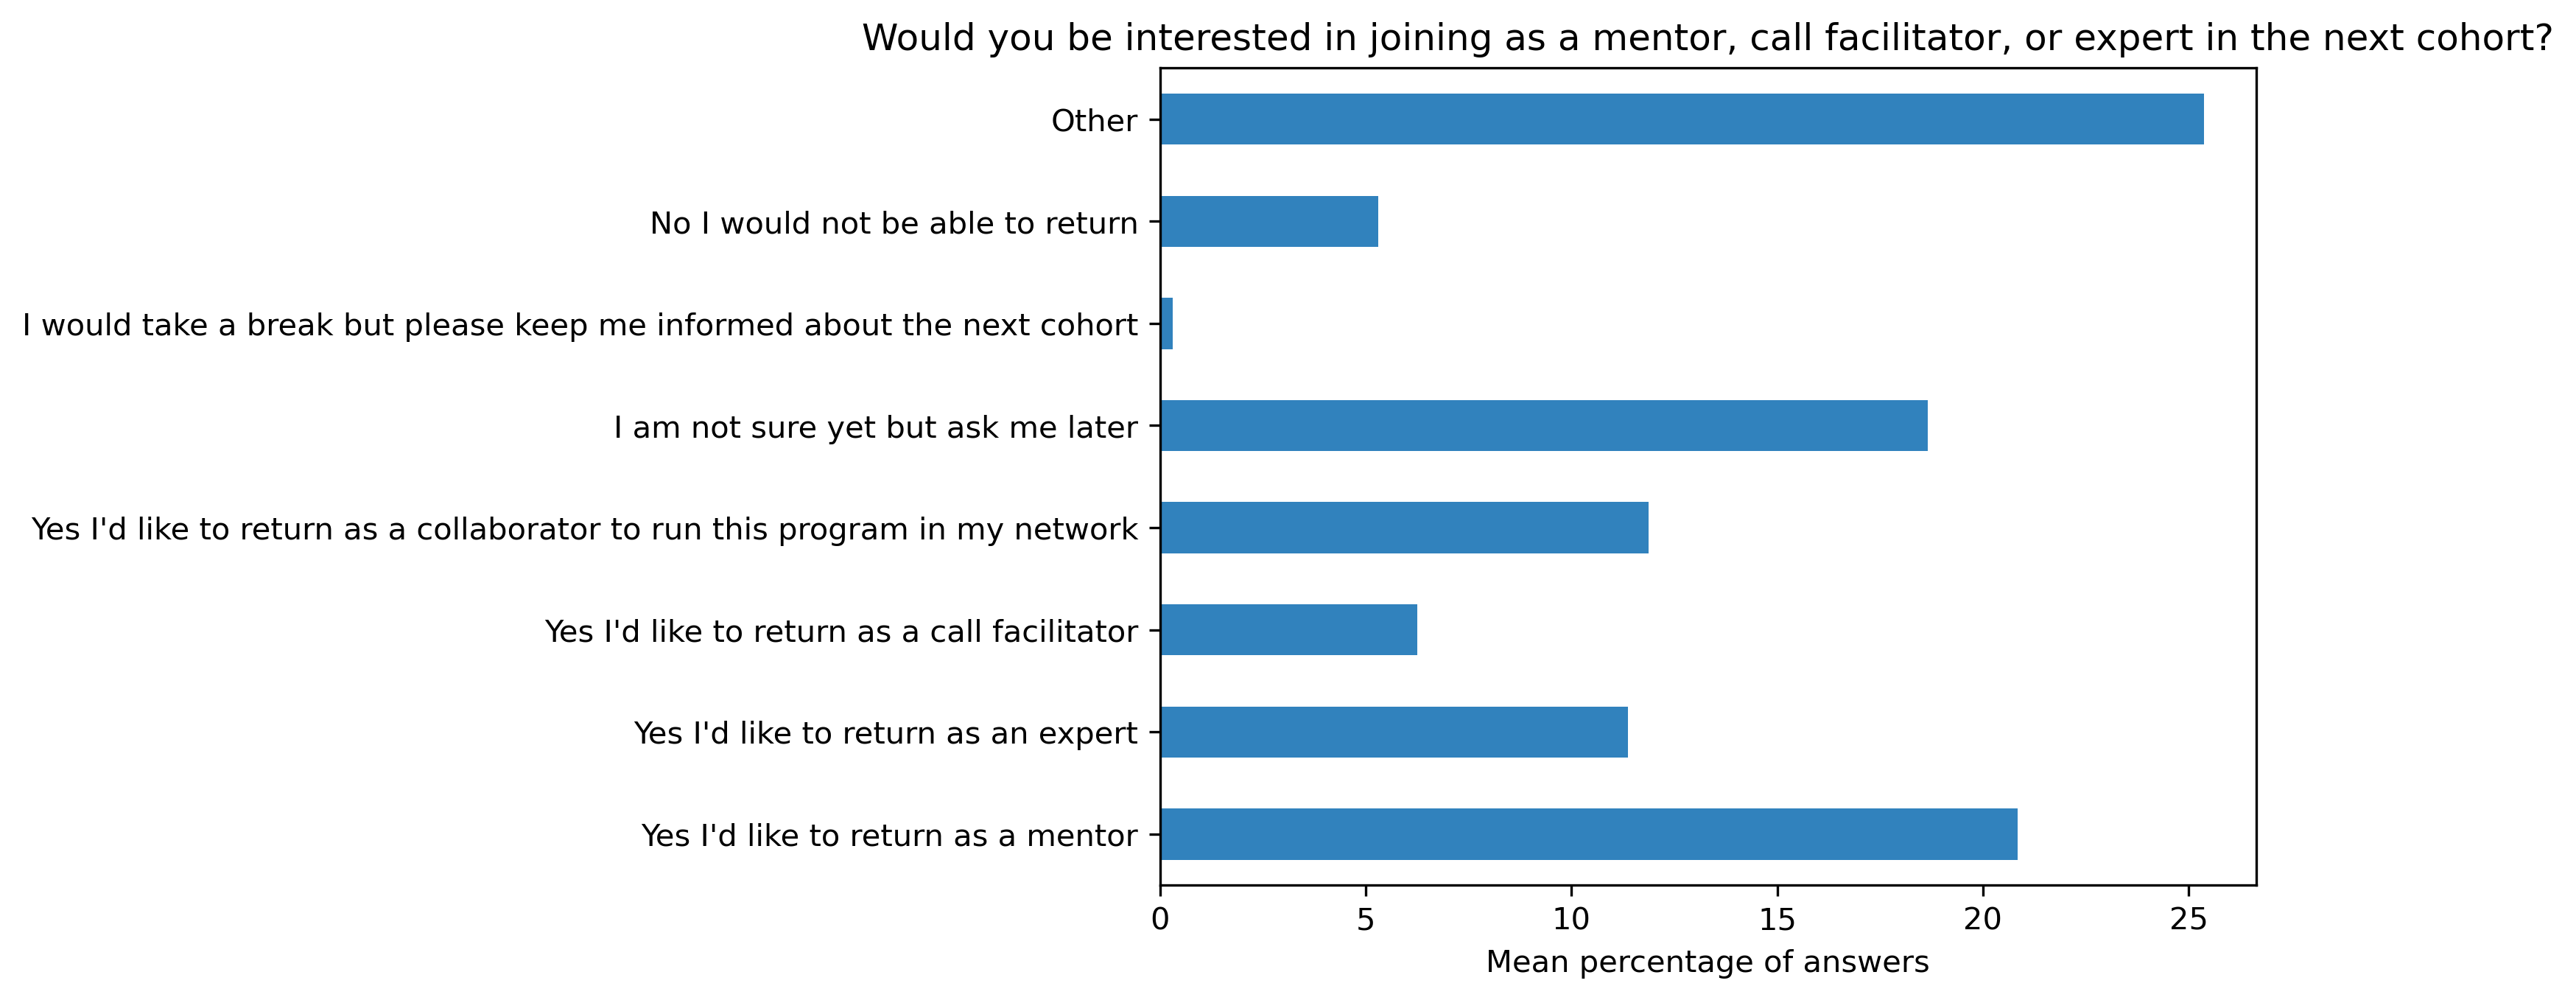

In [85]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q5_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [86]:
other_answer

['',
 'I would like to receive mentoring training and I will be good to help a mentor in some of the mentoring work in either OLS-2 or subsequent cohorts.',
 "I don't feel qualified yet",
 'and I feel I would do a disservice to the mentee',
 'definitely',
 "tho depending on the role. I'd love to be a mentor but not sure my experience will be as useful to academics ",
 "I'm not sure I have the skills as a mentor/expert?",
 'Well',
 'as a mentor or expert',
 "but right now I'm crazy busy and need to focus on some work projects. I'm happy to do coordinate a coworking call for OLS-3 (or something similar which is low threshold) and I can be in the loop for OLS-4 or later for a mentor/expert role (I'm happily assuming it continues forever) ",
 'I would like to return to OLS',
 'as I need to prioritize some other aspects of my life/work this year. ',
 'but probably not until next year at least',
 'as I indicated)',
 "I'd love to be involved in the future (e.g.",
 'I am open to discussing fur

### Question 6: "Would you recommend this program to others?"

Possible answers:
- Yes
- Maybe
- No

In [87]:
participant_q6 = {}
other_answer = []
col = "Would you recommend this program to others?"
answers = [
    "Yes", 
    "Maybe",
    "No"]
for c in participant_df:
    participant_q6[c], oa = get_question_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q6_df = pd.DataFrame.from_dict(participant_q6)
participant_q6_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
Yes       22     32     34     19     22     28
Maybe      0      0      0      0      1      2
No         0      0      1      0      0      0

In [88]:
participant_q6_df = 100 * participant_q6_df / participant_q6_df.sum()

Text(0.5, 1.0, 'Would you recommend this program to others?')

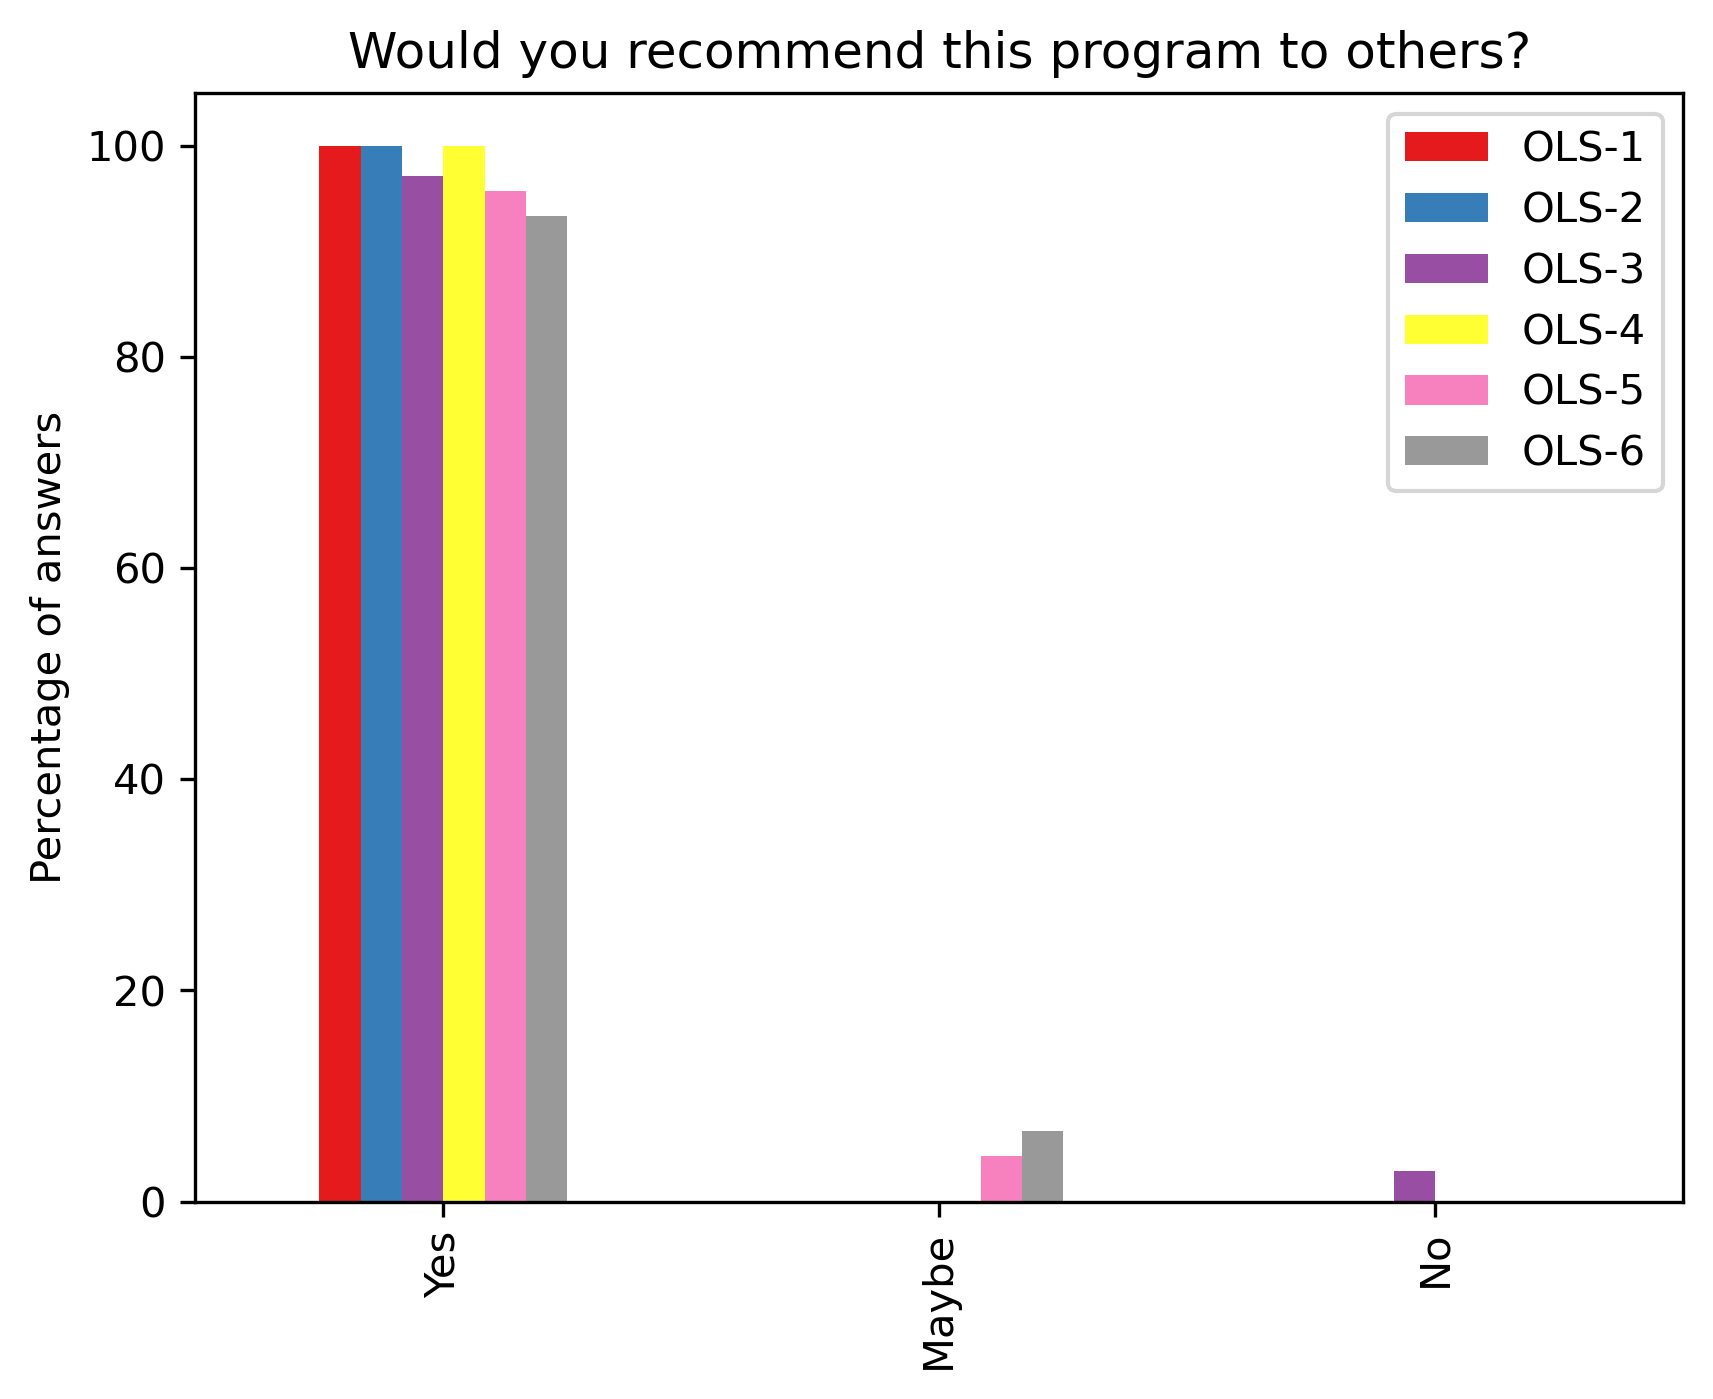

In [89]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q6_df.plot.bar(ax=ax, colormap='Set1')
plt.ylabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you recommend this program to others?')

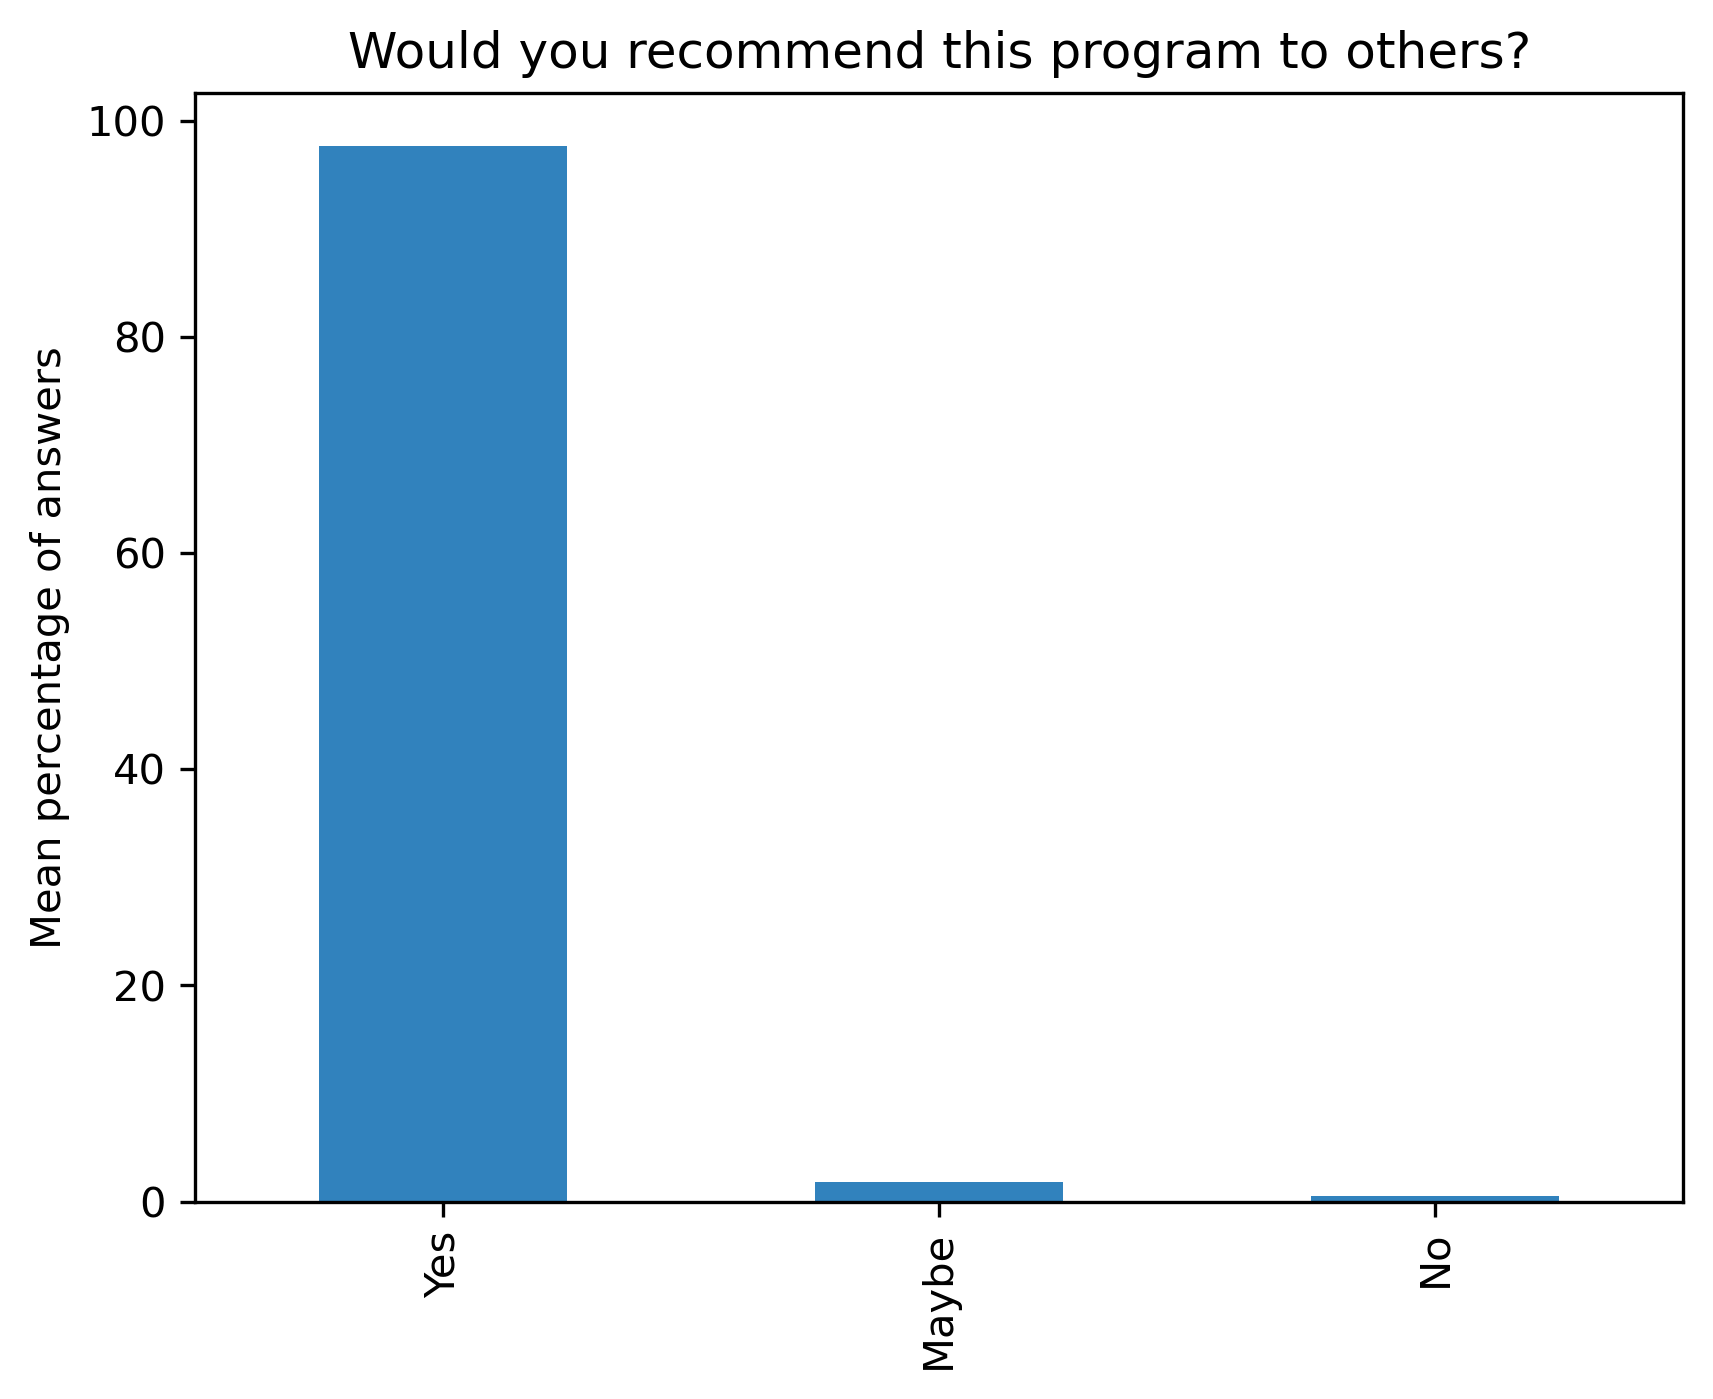

In [90]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q6_df.mean(axis=1).plot.bar(ax=ax, color=colors['participants'])
plt.ylabel('Mean percentage of answers')
plt.title(col)

In [91]:
other_answer

[]

## Mentors

In [92]:
url = "https://docs.google.com/spreadsheets/d/1JOnjaojSYz8J0Yg27IS73MtraIL36BgtavJWlvBuGtI/export?format=csv"
cohort_gid = {
    'OLS-1': '922543579',
    'OLS-2': '293719636',
    'OLS-3': '901891477',
    'OLS-4': '186857041',
    'OLS-5': '0',
    'OLS-6': '227796069',
}

In [93]:
mentor_df = {}
for c in cohort_gid:
    mentor_df[c] = (pd.read_csv(f"{url}&gid={cohort_gid[c]}")
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(c, "cohort",regex=True))

### Question 1: "How were your overall mentorship training and support experience in OLS?"

Possible answers:
- I felt supported as a mentor and the training offered in the cohort was adequate
- I felt supported as a mentor but the training offered in the cohort can be improved
- I enjoyed my participation and did not find the experience overwhelming
- I found the mentorship responsibilities overwhelming
- I did not feel supported as a mentor
- Other

In [94]:
mentor_q1 = {}
other_answer = []
col = "How were your overall mentorship training and support experience in OLS?"
answers = [
    "I felt supported as a mentor and the training offered in the cohort was adequate",
    "I felt supported as a mentor but the training offered in the cohort can be improved",
    "I enjoyed my participation and did not find the experience overwhelming",
    "I found the mentorship responsibilities overwhelming",
    "I did not feel supported as a mentor",
    "Other"]
for c in mentor_df:
    mentor_q1[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q1_df = pd.DataFrame.from_dict(mentor_q1)
mentor_q1_df

OLS-1  OLS-2  OLS-3  \
I felt supported as a mentor and the training o...      4     19     24   
I felt supported as a mentor but the training o...      3      1      0   
I enjoyed my participation and did not find the...      3     11     15   
I found the mentorship responsibilities overwhe...      0      0      0   
I did not feel supported as a mentor                    0      0      0   
Other                                                   3      7      1   

                                                    OLS-4  OLS-5  OLS-6  
I felt supported as a mentor and the training o...     17     19     17  
I felt supported as a mentor but the training o...      0      1      1  
I enjoyed my participation and did not find the...     13      7     11  
I found the mentorship responsibilities overwhe...      0      0      0  
I did not feel supported as a mentor                    0      0      0  
Other                                                   3      0      4

In [95]:
participant_q1_df = 100 * participant_q1_df / participant_q1_df.sum()

Text(0.5, 1.0, 'How were your overall mentorship training and support experience in OLS?')

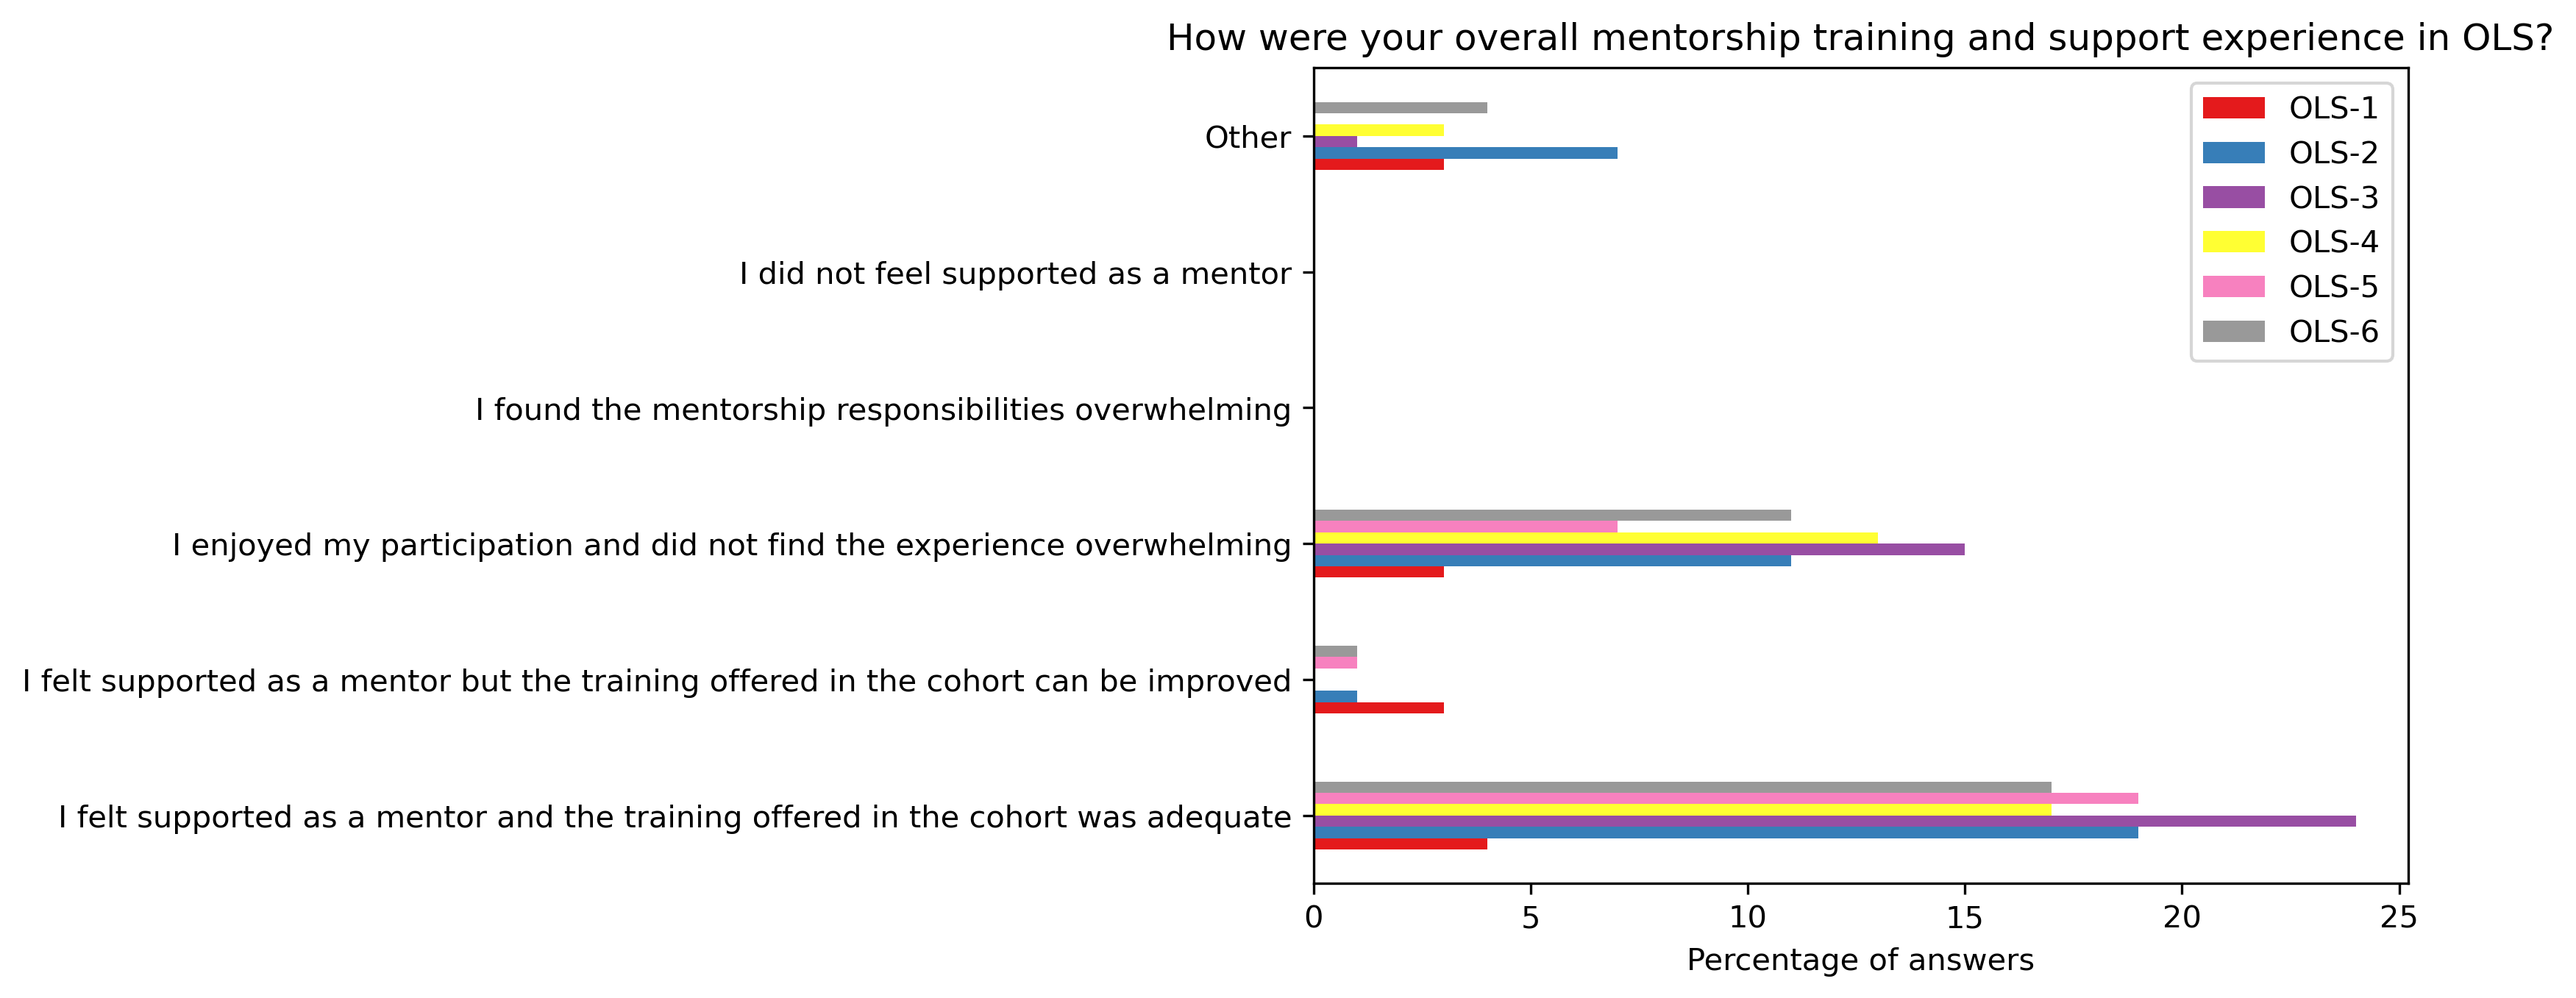

In [96]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How were your overall mentorship training and support experience in OLS?')

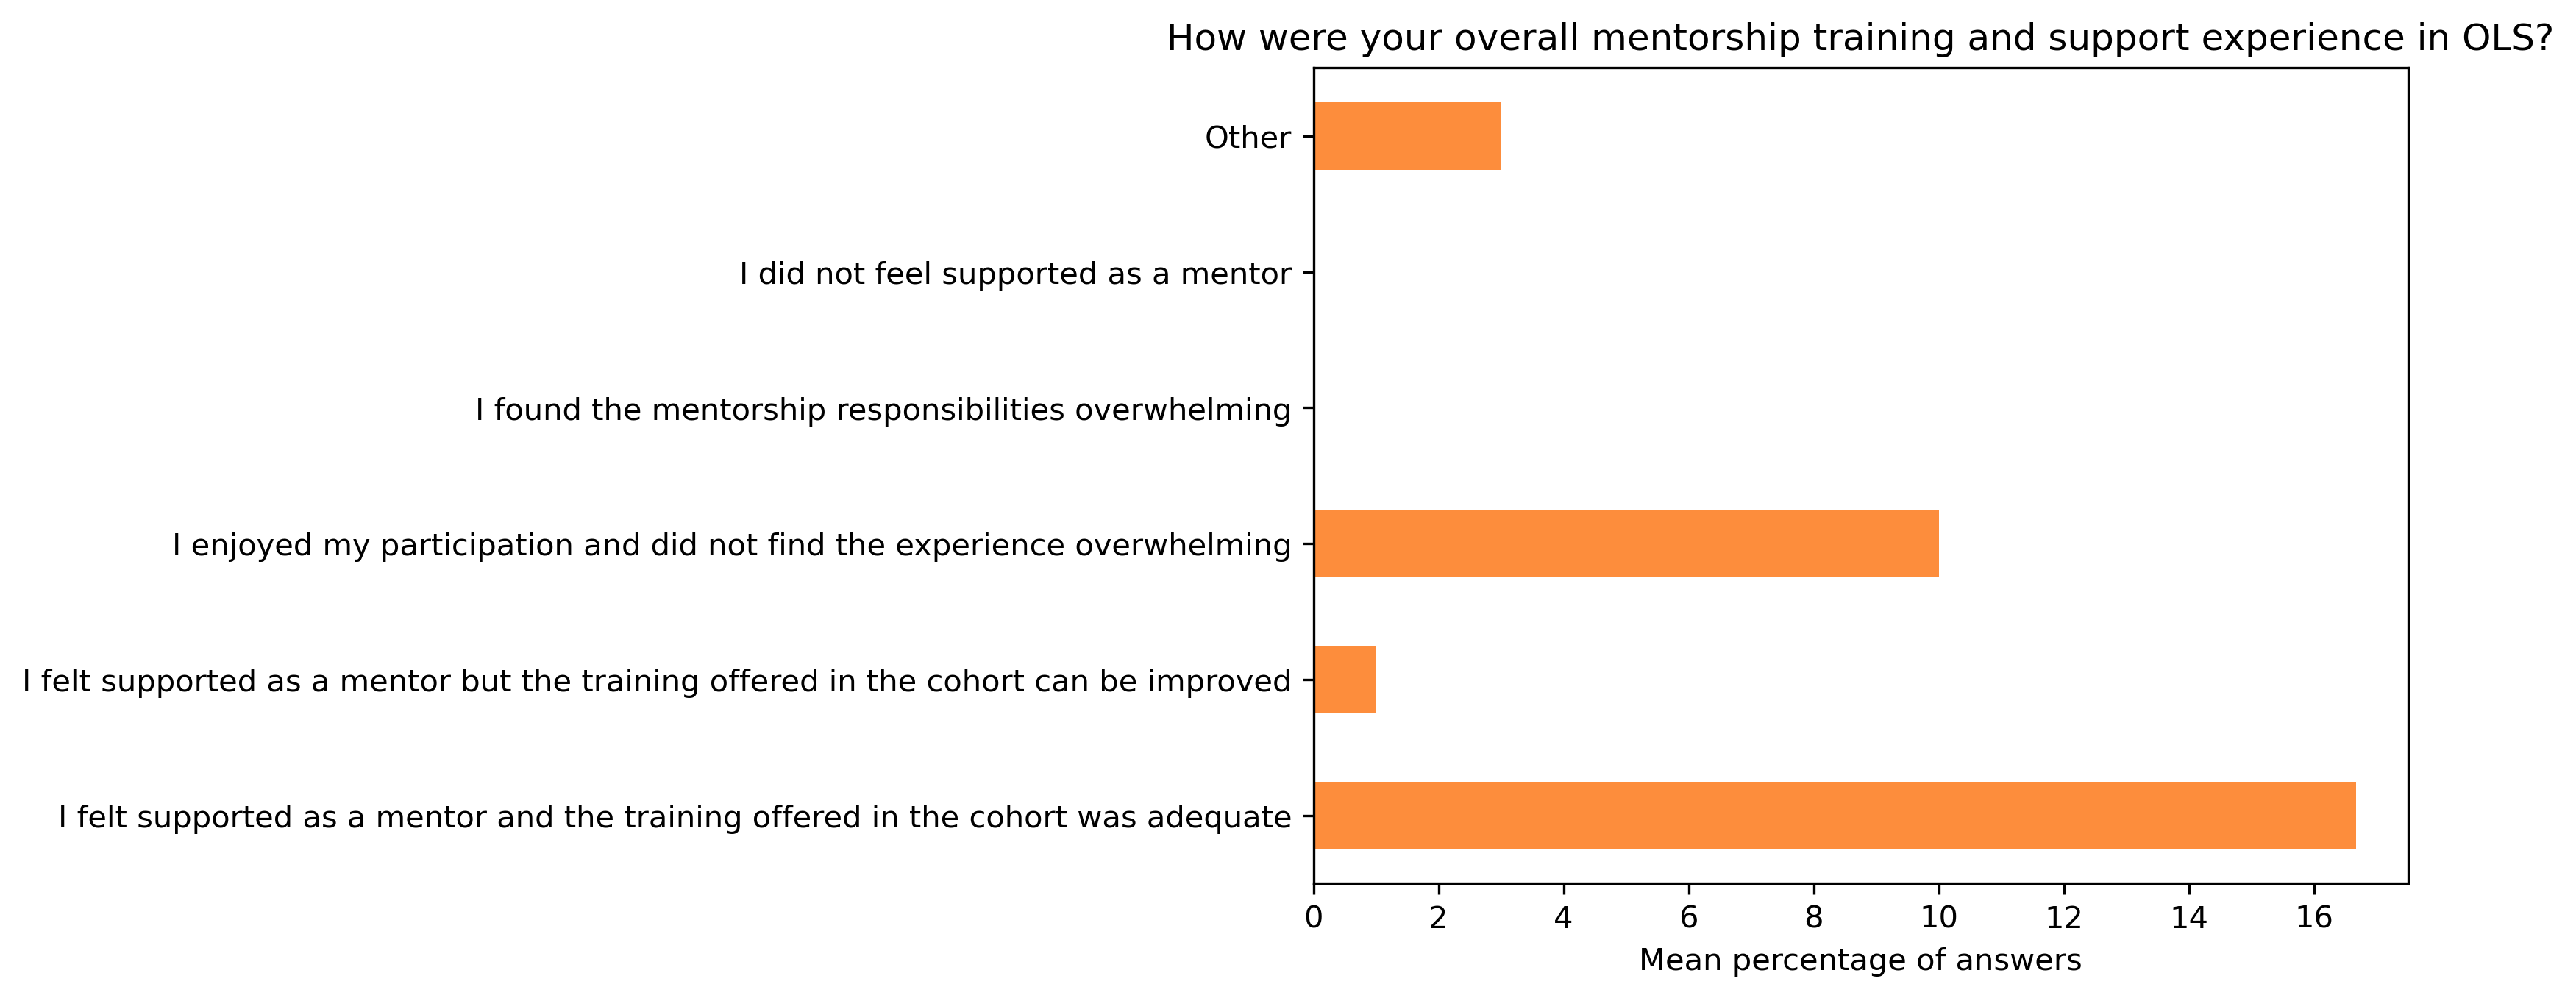

In [97]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q1_df.mean(axis=1).plot.barh(ax=ax, color=colors['mentors'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [98]:
other_answer

['I missed out on some mentor trainings (due to scheduling conflicts',
 'and my feeling comfortable from previous experience mentoring for MozOL)',
 'but the ones I attended were great! ',
 'It would have been good to maybe have a reflection / consolidation session for mentors at the end of the programme but I really appreciated the training organised and the support from other mentors ',
 'I found the experience frustrating. I think that the mentees and I failed to clarify and describe what we expected from the relationship. My feeling through the whole program was that they were looking for a mentor who gave them specific knolwedge',
 'ideas for solutions to their problems - while I wanted to be more of a coach',
 'someone to listen and provide structure to their discussions. I was left feeling that i had done a poor job as a mentor.',
 'I found mentoring this project really inspiring. Sometimes Annalee had queries I did not know the answer to but the community allowed me to suggest 

### Question 2: "How was your overall experience with the mentoring calls with your mentee?"

Possible answers:
- Mentoring calls were not structured or constructive
- Mentoring calls were somewhat constructive
- Mentoring calls were mostly constructive
- Mentoring calls were always constructive

In [99]:
mentor_q2 = {}
other_answer = []
col = "How was your overall experience with the mentoring calls with your mentee?"
answers = [
    "Mentoring calls were not structured or constructive",
    "Mentoring calls were somewhat constructive",
    "Mentoring calls were mostly constructive",
    "Mentoring calls were always constructive"]
for c in mentor_df:
    mentor_q2[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q2_df = pd.DataFrame.from_dict(mentor_q2)
mentor_q2_df

OLS-1  OLS-2  OLS-3  \
Mentoring calls were not structured or construc...      0      1      1   
Mentoring calls were somewhat constructive              2      5      4   
Mentoring calls were mostly constructive                4     13      8   
Mentoring calls were always constructive                3      7     14   

                                                    OLS-4  OLS-5  OLS-6  
Mentoring calls were not structured or construc...      0      0      1  
Mentoring calls were somewhat constructive              3      2      4  
Mentoring calls were mostly constructive               10     10      9  
Mentoring calls were always constructive                5      9      5

In [100]:
mentor_q2_df = 100 * mentor_q2_df / mentor_q2_df.sum()

Text(0.5, 1.0, 'How was your overall experience with the mentoring calls with your mentee?')

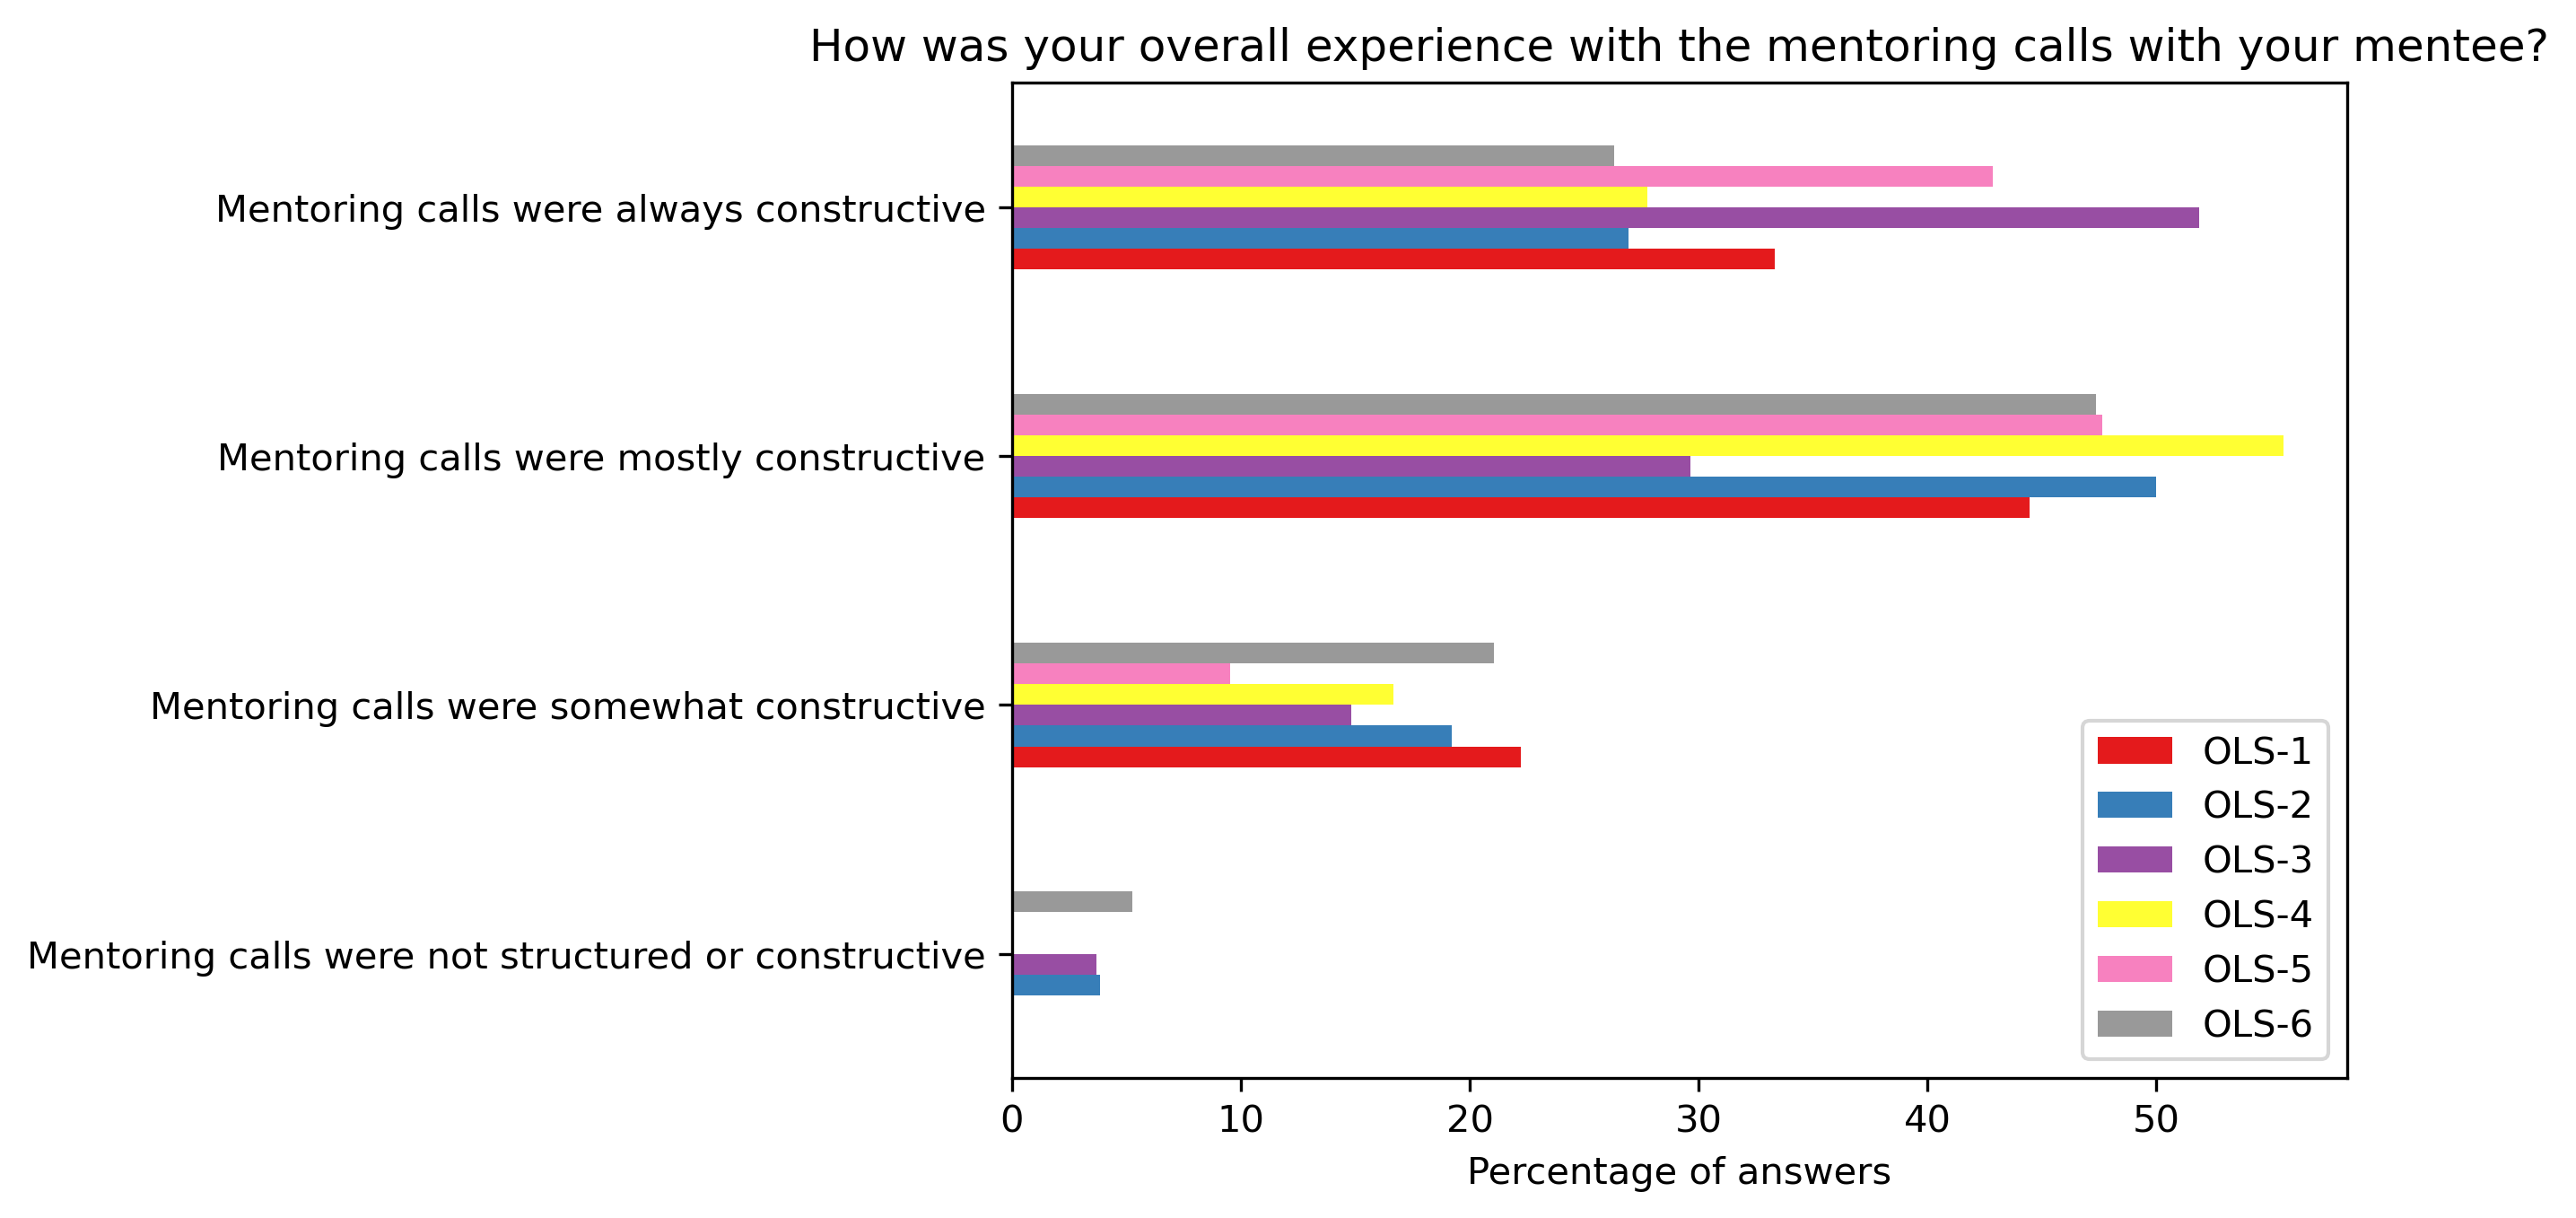

In [101]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q2_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall experience with the mentoring calls with your mentee?')

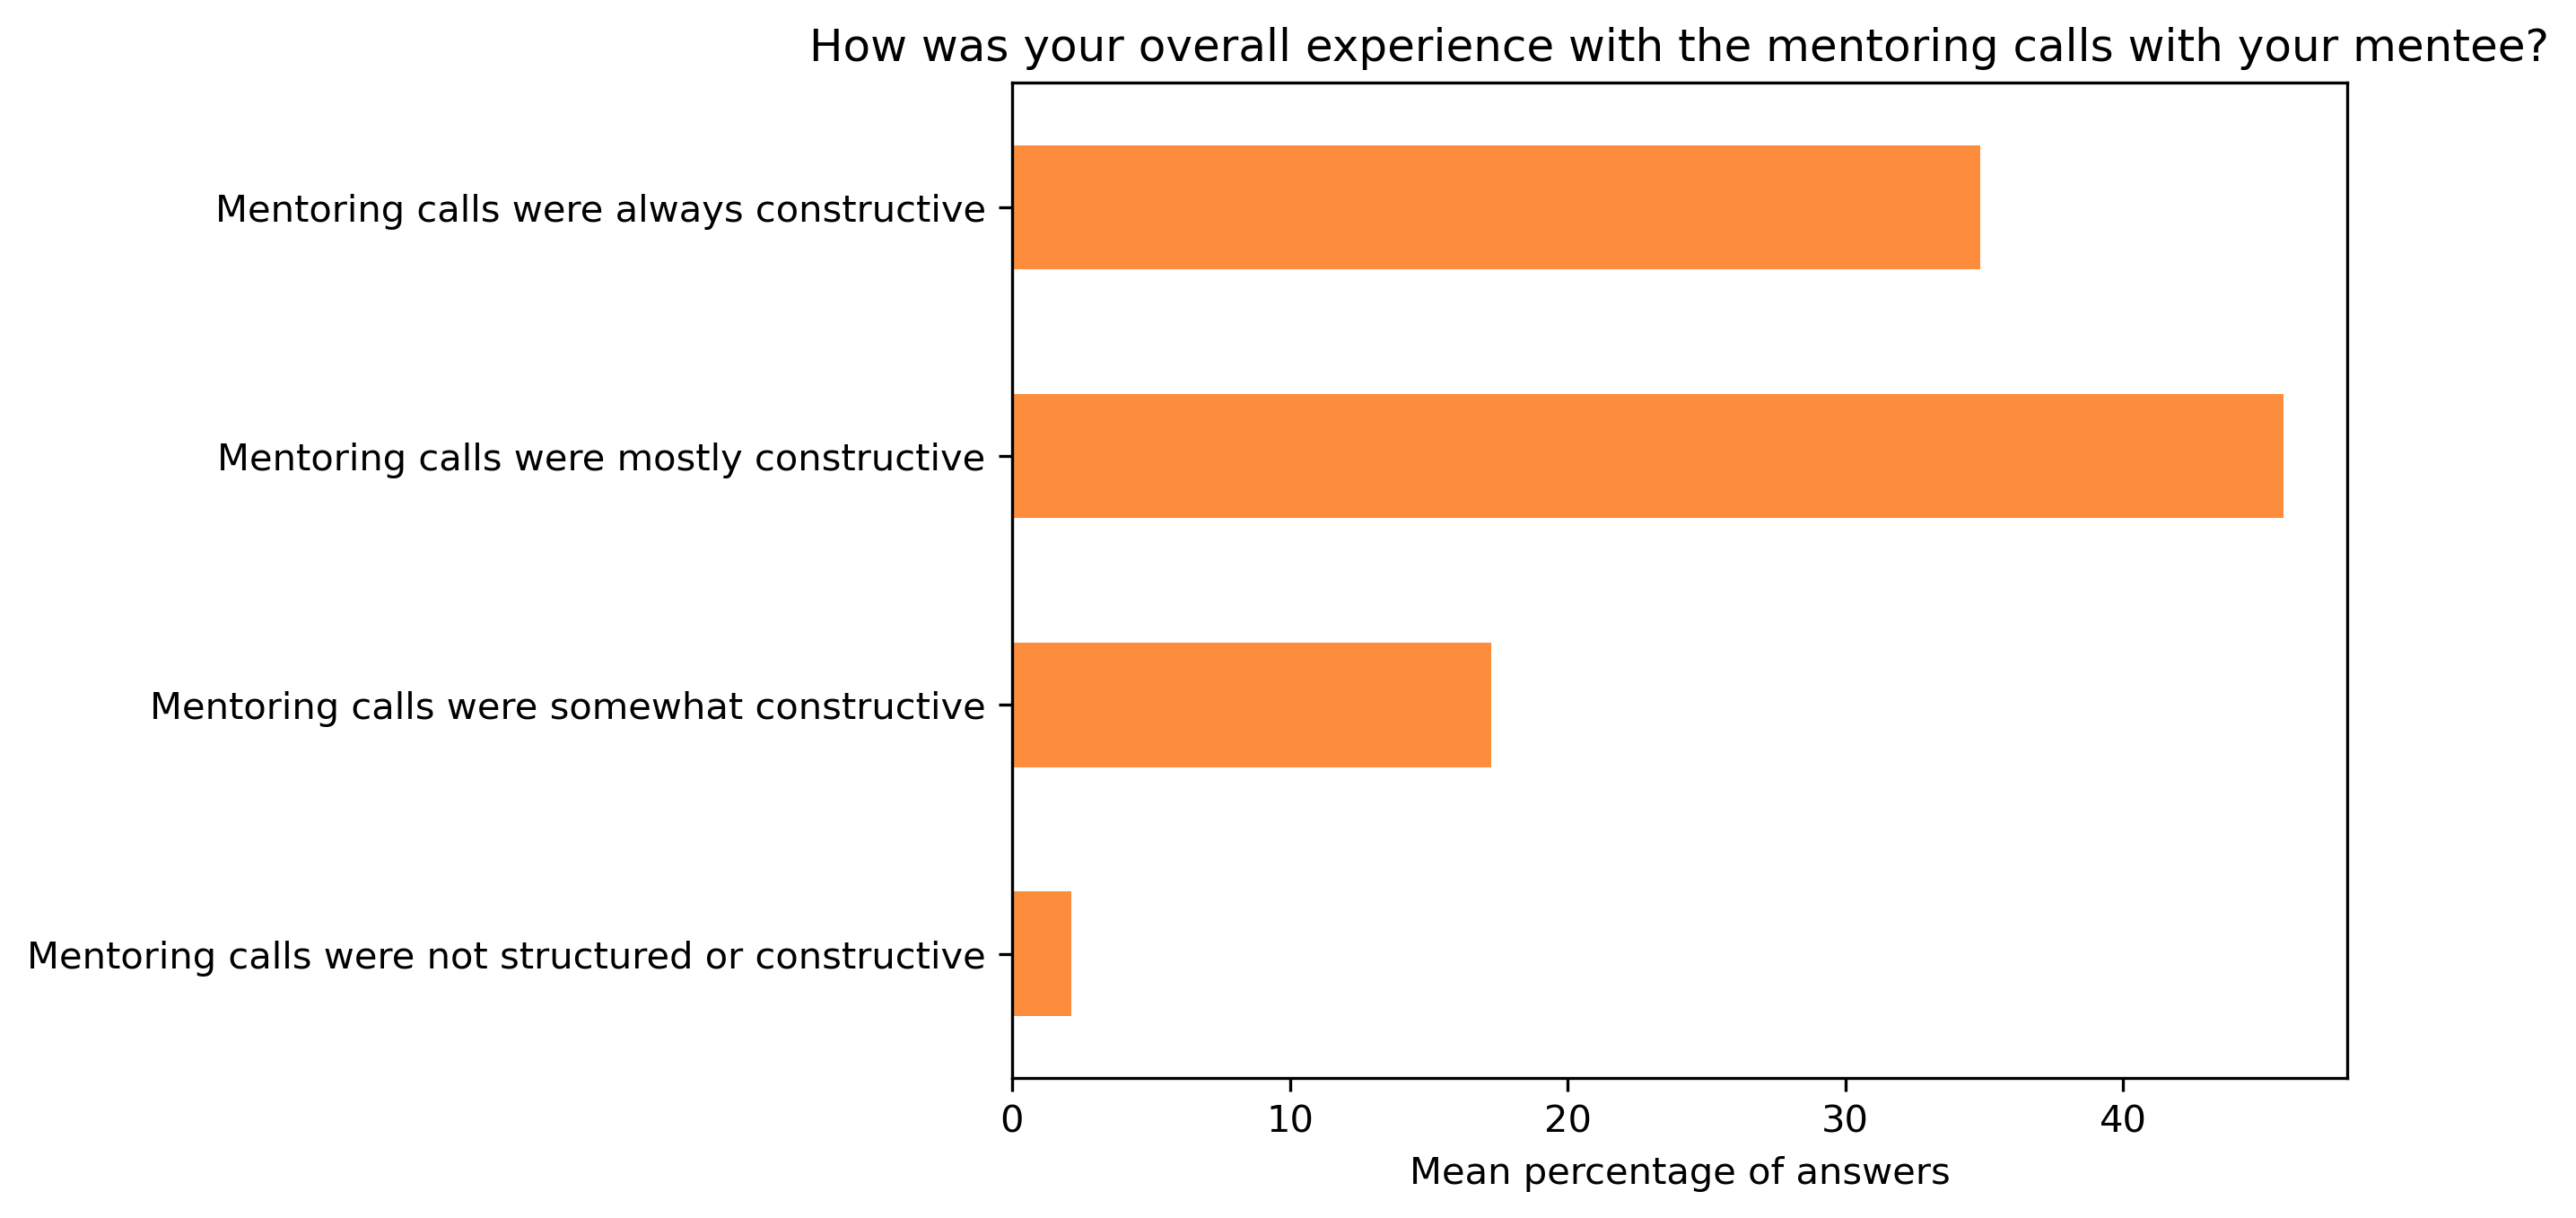

In [102]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q2_df.mean(axis=1).plot.barh(ax=ax, color=colors['mentors'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [103]:
other_answer

[]

### Question 3: "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"

Possible answers:
- Yes I'd like to return as a mentor
- Yes I'd like to return as an expert
- Yes I'd like to return as a collaborator to run this program in my network
- Yes I am interesting in joining the OLS steering committee
- I am not sure yet, but ask me later
- No, I would not be able to return to OLS-6
- Other

In [104]:
mentor_q3 = {}
other_answer = []
col = "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "Yes I am interesting in joining the OLS steering committee",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in mentor_df:
    mentor_q3[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q3_df = pd.DataFrame.from_dict(mentor_q3)
mentor_q3_df

OLS-1  OLS-2  OLS-3  \
Yes I'd like to return as a mentor                      4      6     18   
Yes I'd like to return as an expert                     1      5     11   
Yes I'd like to return as a collaborator to run...      0      0      4   
Yes I am interesting in joining the OLS steerin...      0      0      0   
I am not sure yet but ask me later                      2      0      2   
I would take a break but please keep me informe...      0      7      1   
No I would not be able to return                        0      0      0   
Other                                                   2      6     15   

                                                    OLS-4  OLS-5  OLS-6  
Yes I'd like to return as a mentor                      9     15      9  
Yes I'd like to return as an expert                    10     12      9  
Yes I'd like to return as a collaborator to run...      1      2      4  
Yes I am interesting in joining the OLS steerin...      6      3      5  
I am not sure yet but ask me later                      1      4      1  
I would take a break but please keep me informe...      2      0      2  
No I would not be able to return                        0      0      1  
Other                                                   2      3      5

In [105]:
mentor_q3_df = 100 * mentor_q3_df / mentor_q3_df.sum()

Text(0.5, 1.0, 'Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?')

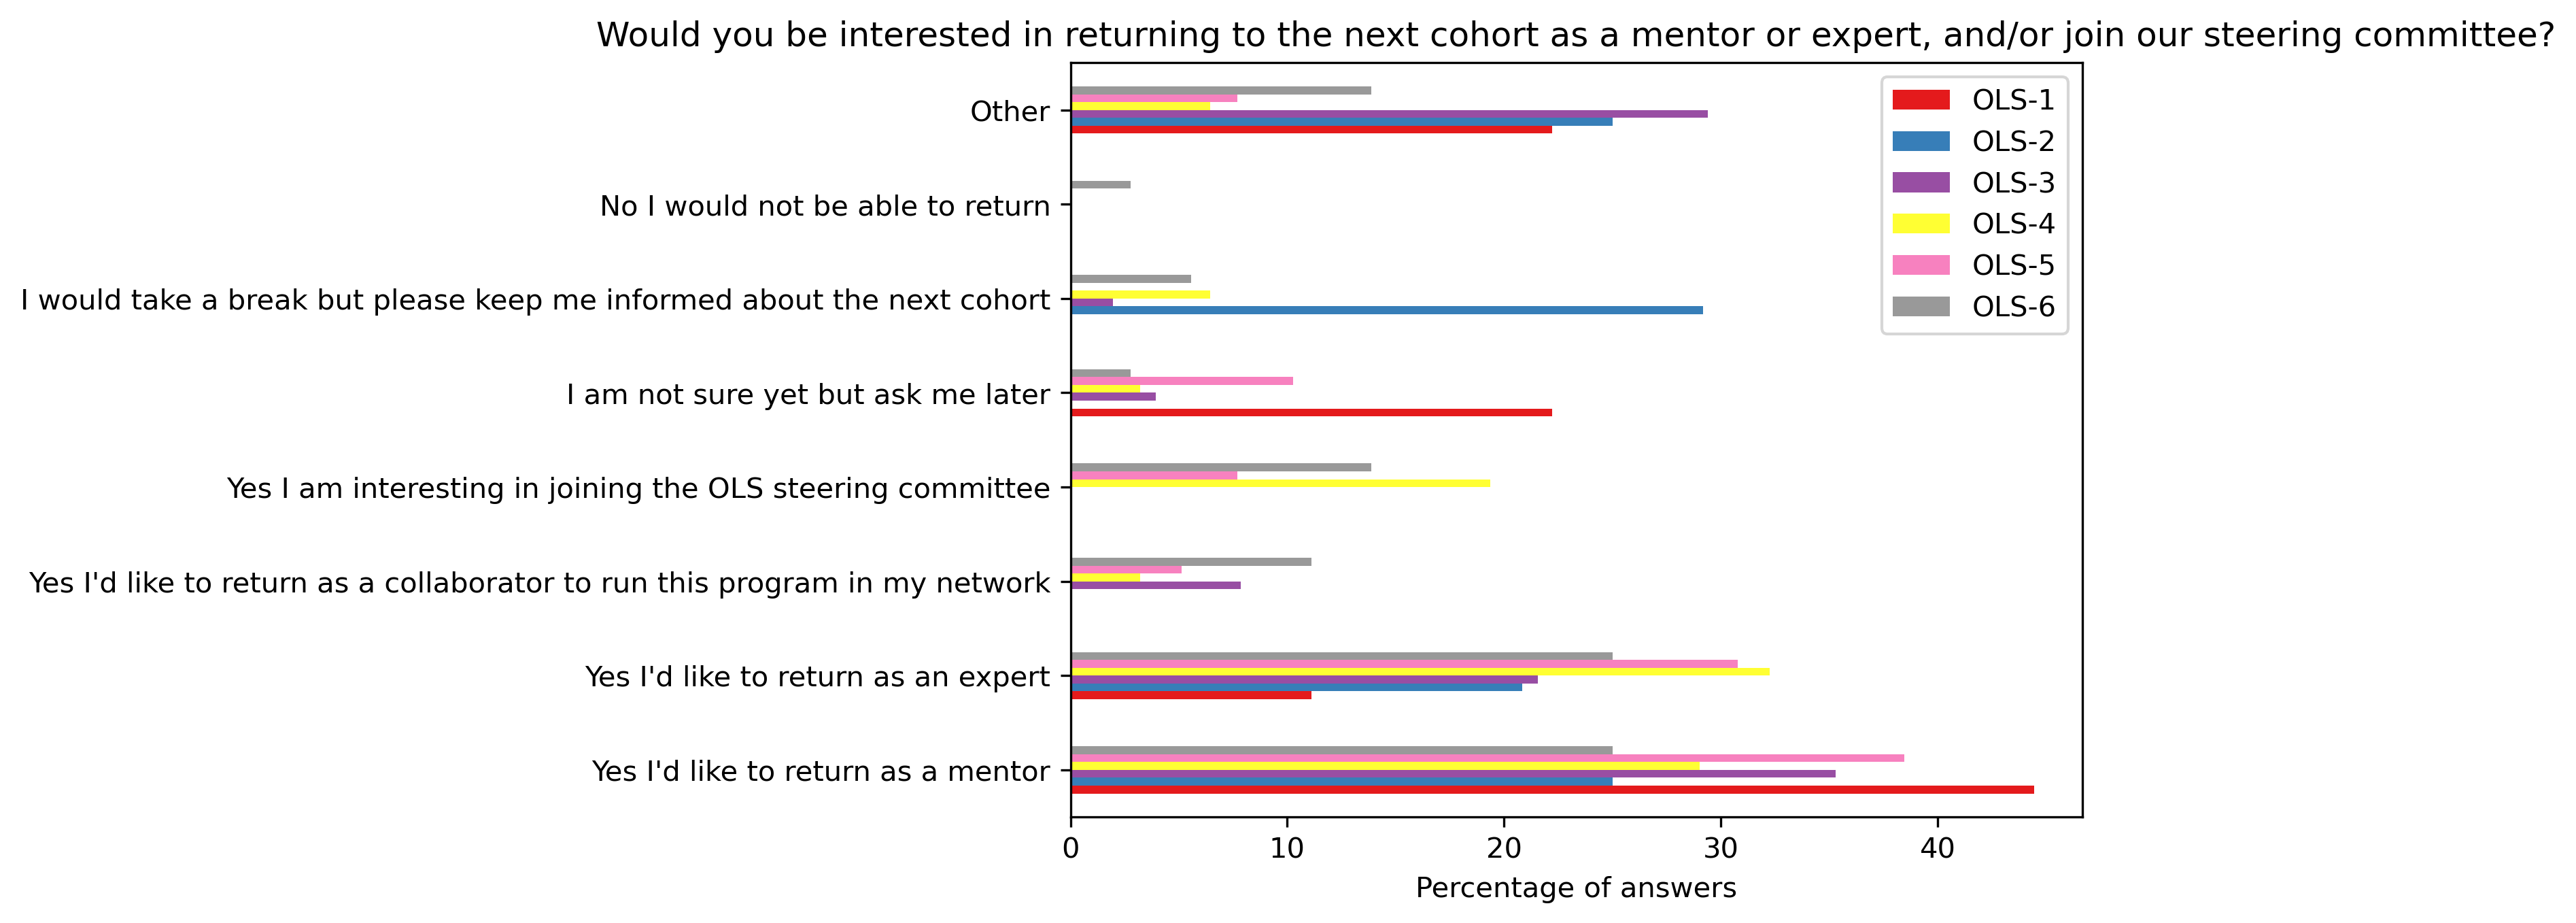

In [106]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q3_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?')

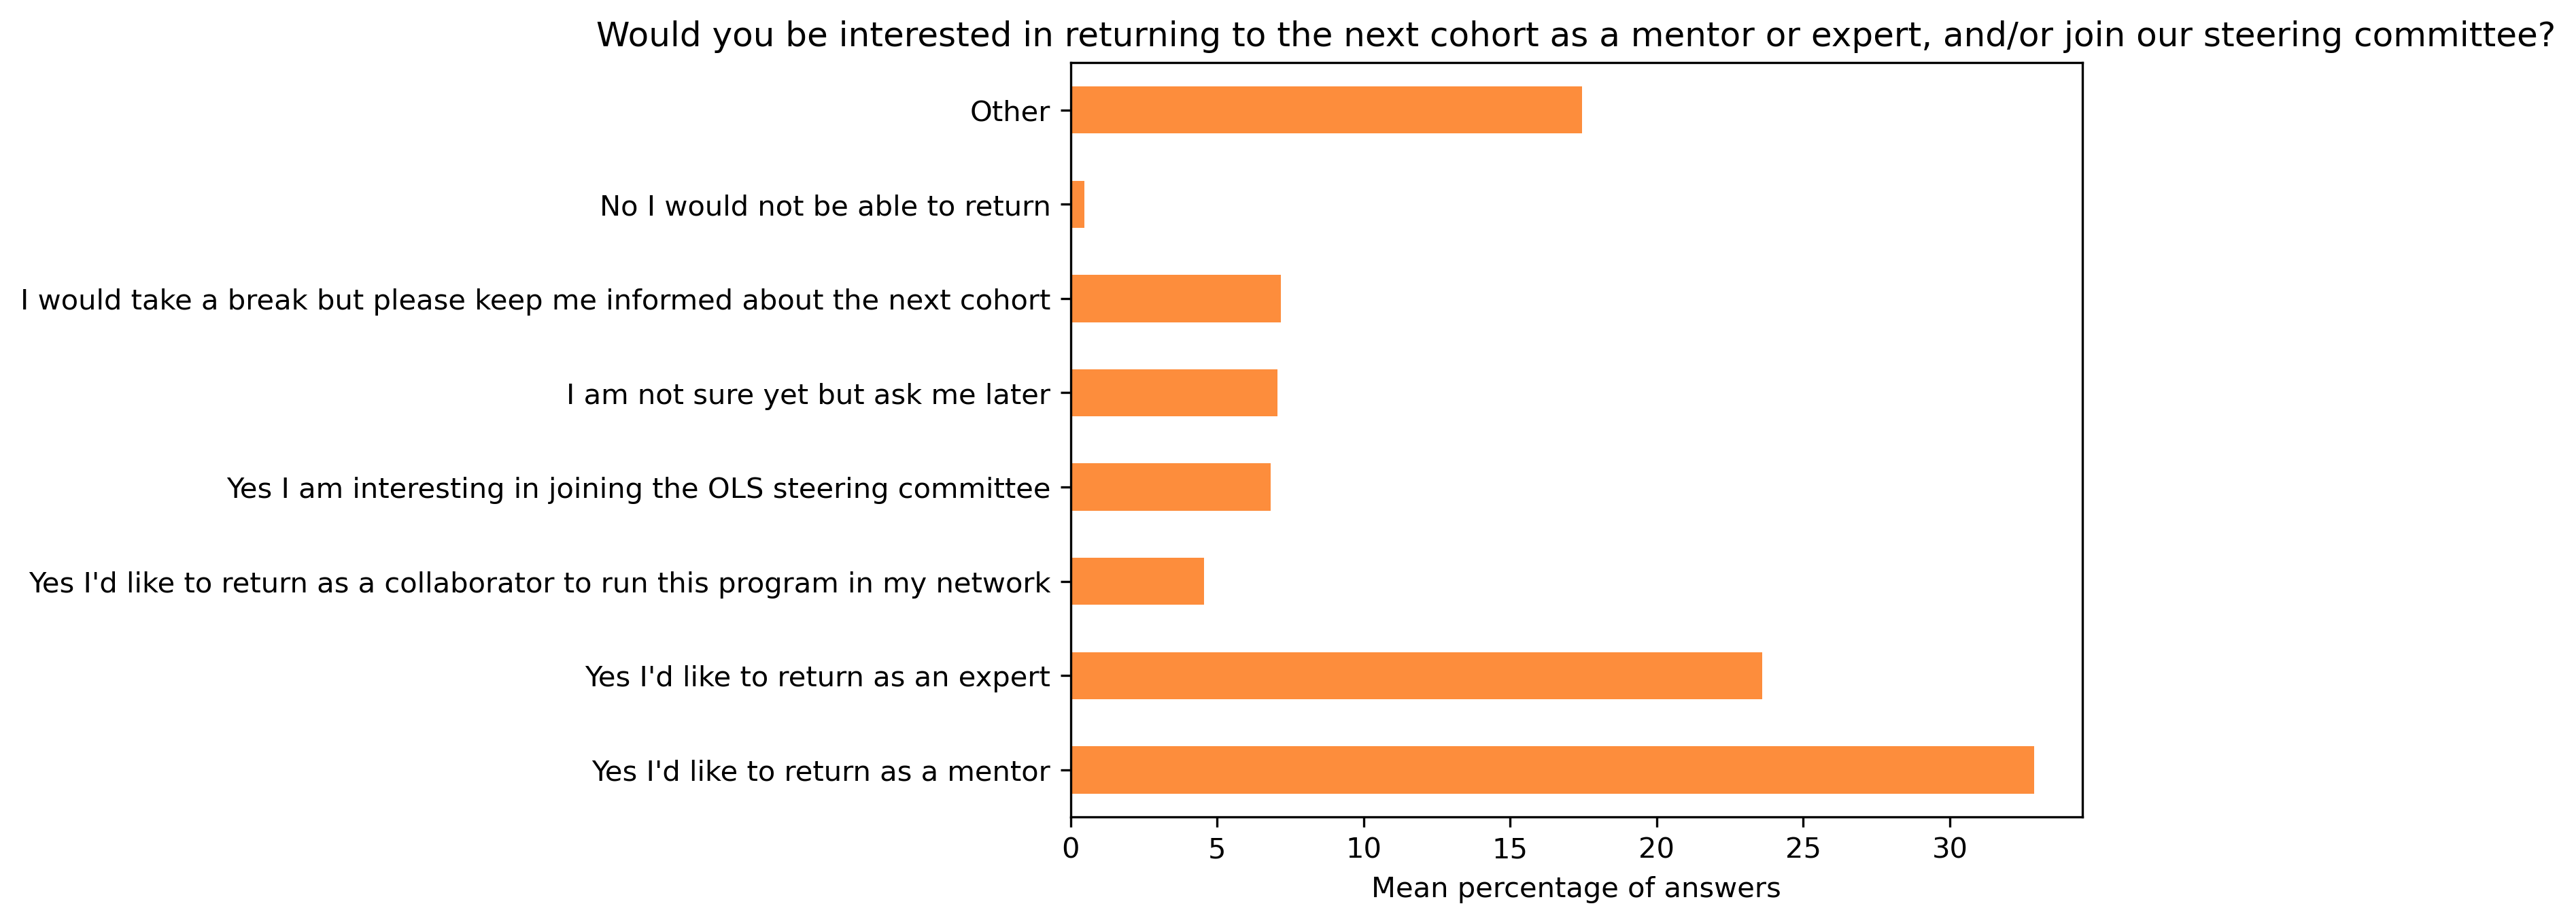

In [107]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q3_df.mean(axis=1).plot.barh(ax=ax, color=colors['mentors'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [108]:
other_answer

['Yes',
 "but I don't know how yet! Could be any of the three ways...",
 '',
 'but maybe relevant only if there is applicants from ecology / biodiversity fields like it was in OLS2',
 'I have signed up as both an expert and mentor for OLS-3',
 'I would like to not use platform that collects data (more details in email)',
 "I've signed up as both expert and mentor but I'm happy to relay the baton and give this excellent opportunity to others.",
 'I am not sure yet',
 'but ask me later when you have launched OLS-4',
 'but actually',
 'I checked yes to the collaborator option',
 'but please contact me for OLS-5 :)',
 "I'd like to take a break for OLS-4",
 'but ask me later',
 'I should have more time in September to be able to put in more time into this during working hours: especially if I can get the credits for the PhDs sorted out and have some of them apply. ',
 'mentor or expert. I just need to think it through/discuss.',
 'either as a mentee',
 'I am keen to open this up and invite 

### Question 4: "Do you think your mentee was able to effectively engage with OLS throughout the program?"

Possible answers:
- Yes they were able to engage
- No they had difficulty engaging or attending calls
- Other

In [109]:
mentor_q4 = {}
other_answer = []
col = "Do you think your mentee was able to effectively engage with OLS throughout the program?"
answers = [
    "Yes, they were able to engage",
    "No, they had difficulty engaging or attending calls",
    "Other"]
for c in mentor_df:
    if col in mentor_df[c]:
        mentor_q4[c], oa = get_question_possible_answers_counts(col, mentor_df[c], answers)
        other_answer += oa
mentor_q4_df = pd.DataFrame.from_dict(mentor_q4)
mentor_q4_df

OLS-4  OLS-5  OLS-6
Yes, they were able to engage                           9     14      7
No, they had difficulty engaging or attending c...      6      4      7
Other                                                   3      3      5

In [110]:
mentor_q4_df = 100 * mentor_q4_df / mentor_q4_df.sum()

Text(0.5, 1.0, 'Do you think your mentee was able to effectively engage with OLS throughout the program?')

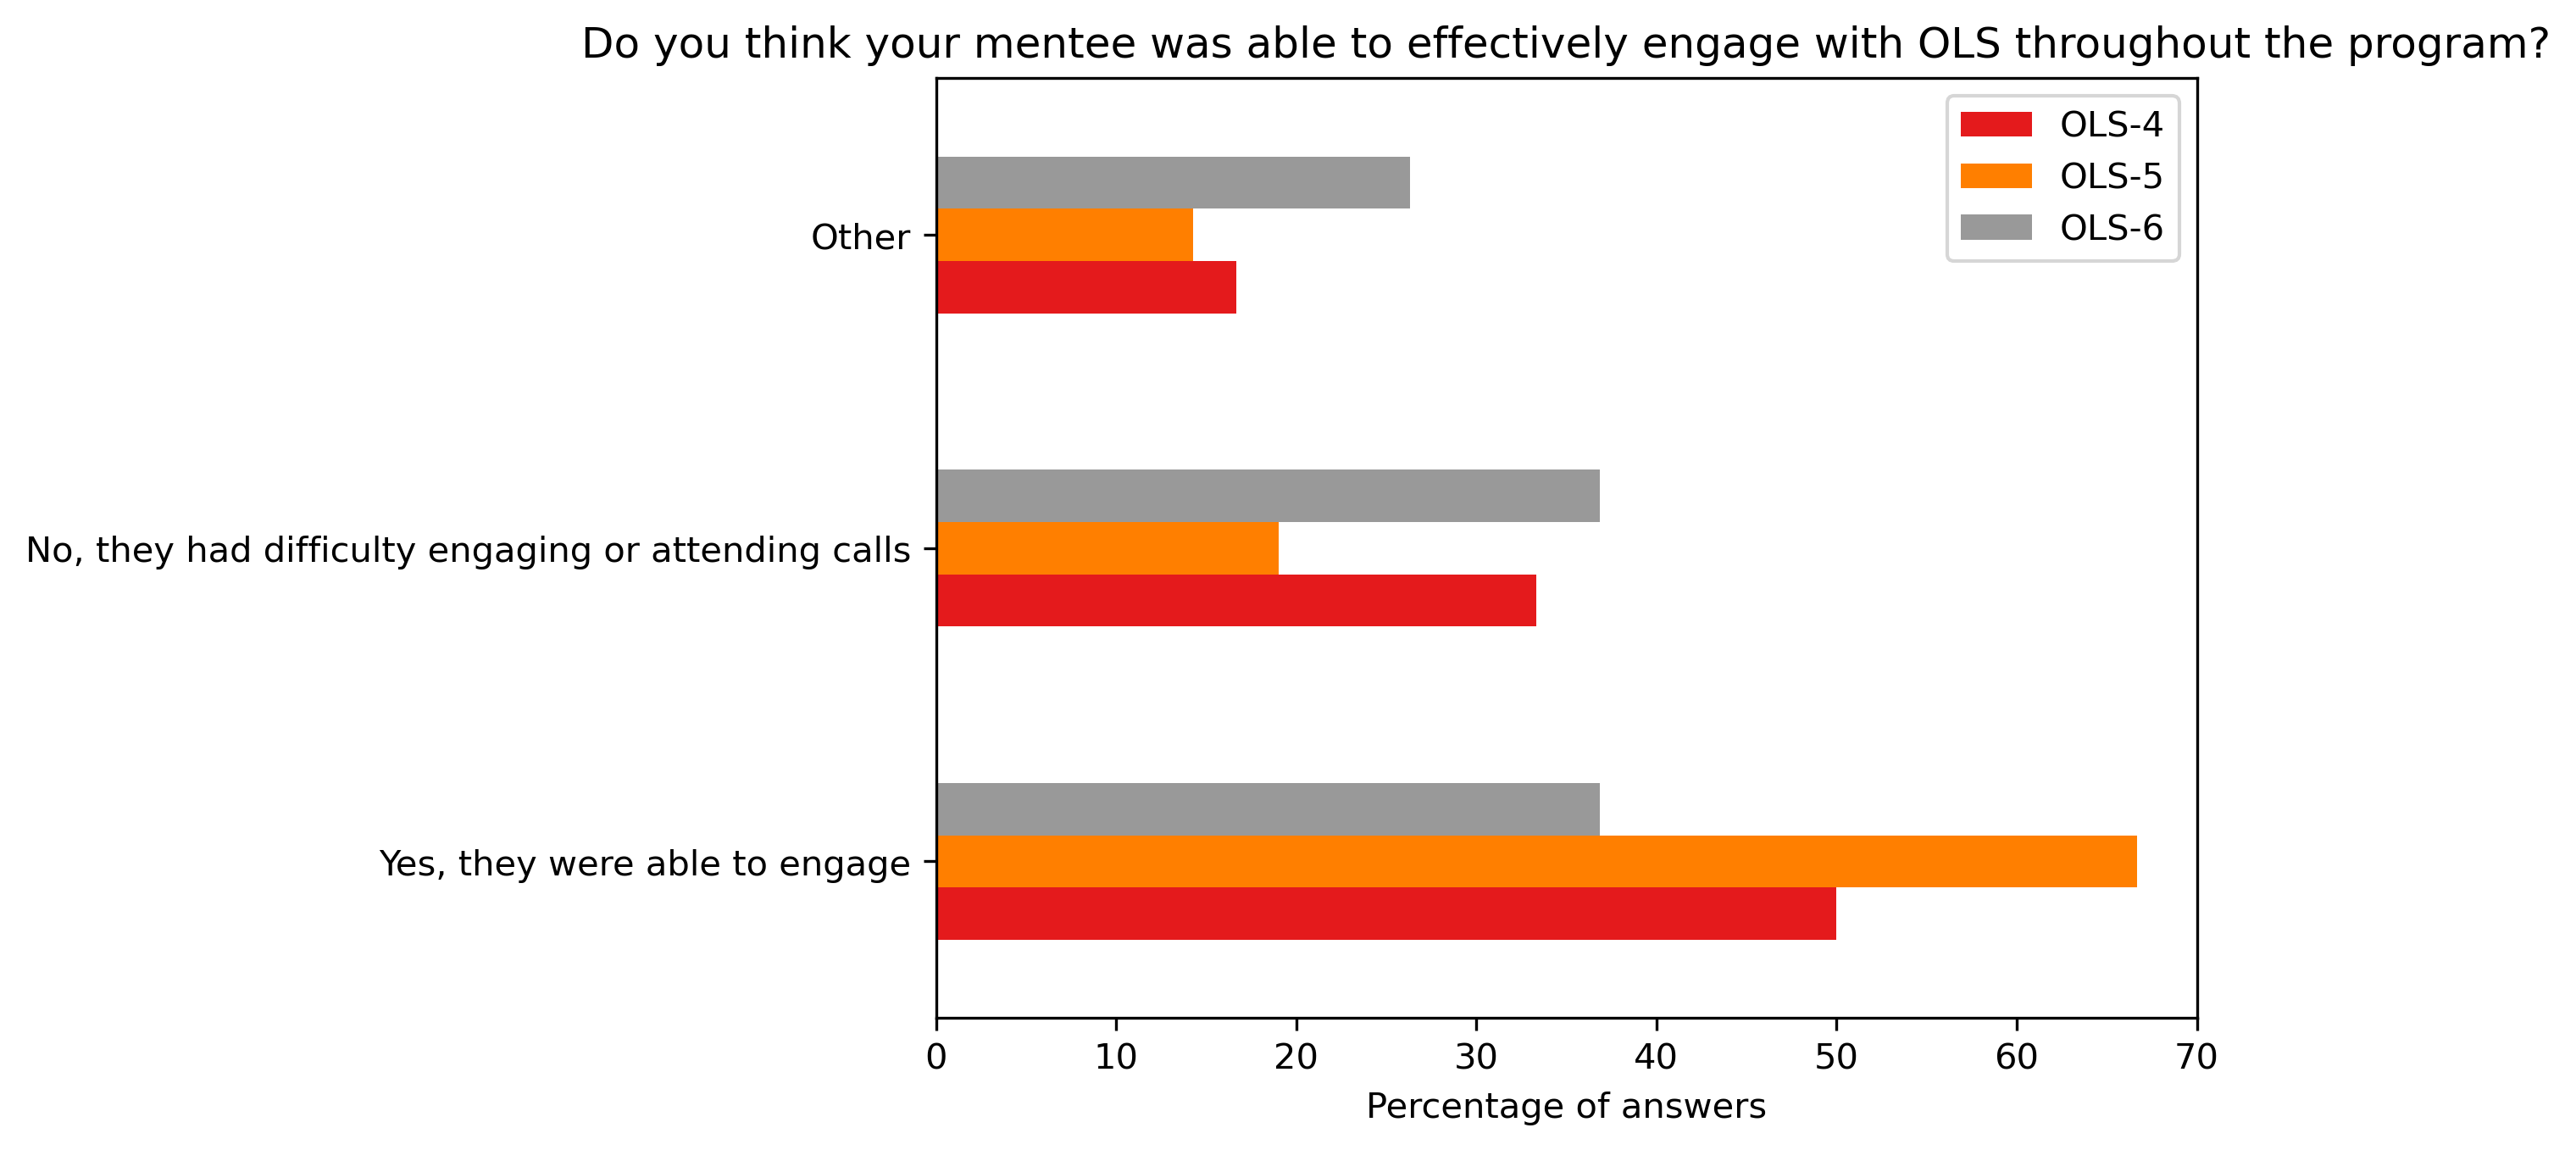

In [111]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q4_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Do you think your mentee was able to effectively engage with OLS throughout the program?')

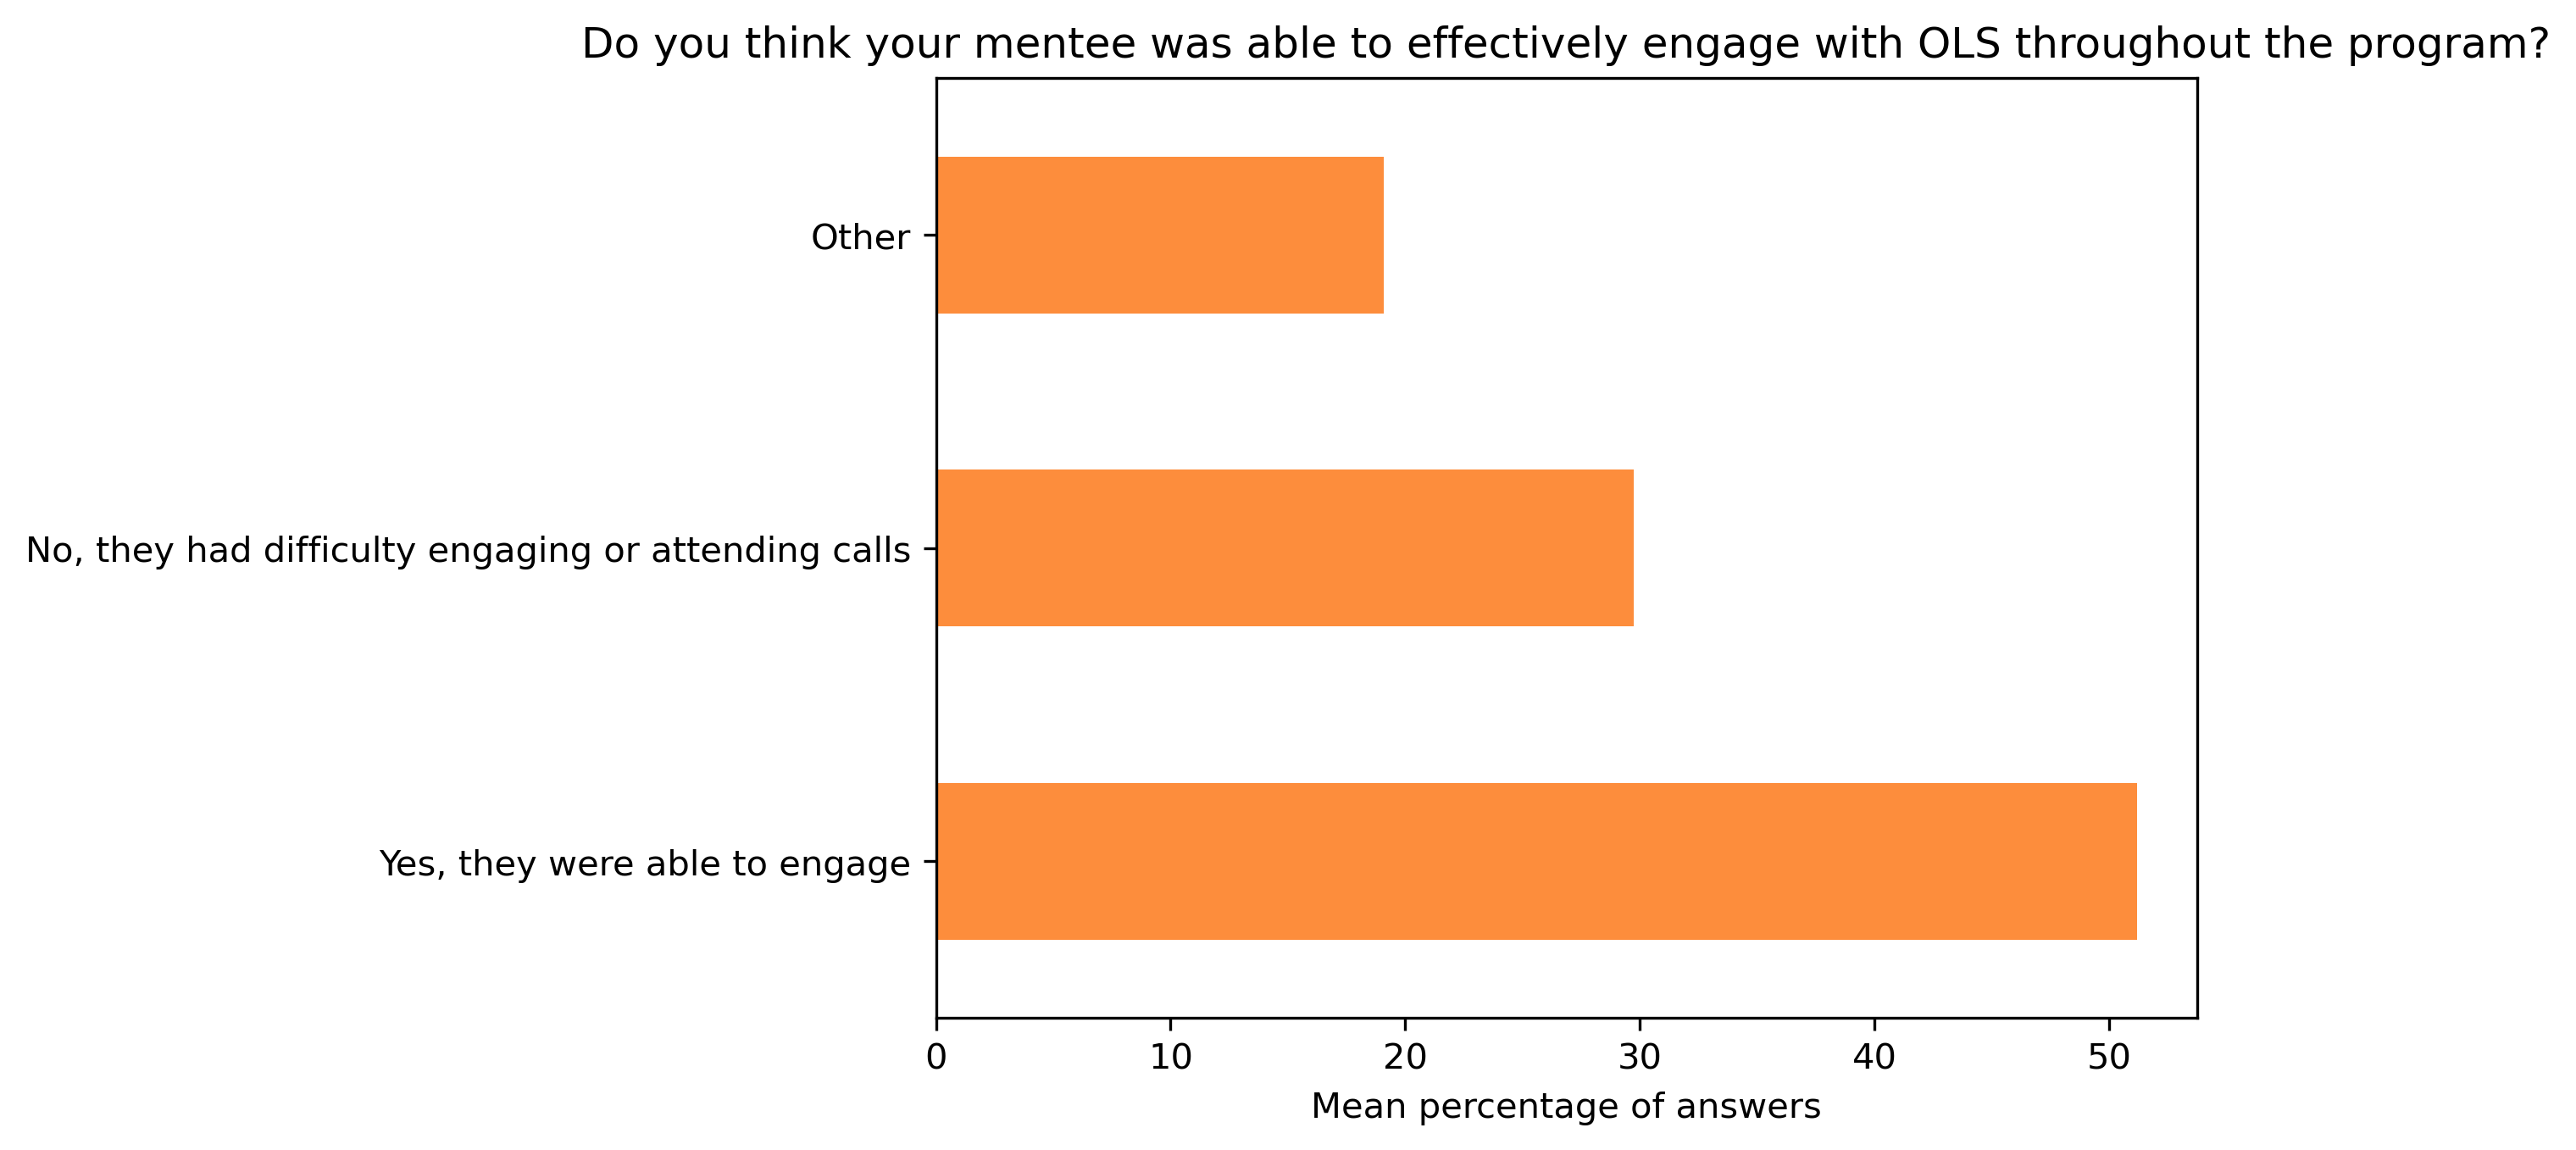

In [112]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q4_df.mean(axis=1).plot.barh(ax=ax, color=colors['mentors'])
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [113]:
other_answer

['I think they were able to engage most of the time. They often had to catch up between the calls and what they effectively used in their project.',
 "I think Arent was very much capable to effectively engage but I also received his feedback that he wished he had more time to really get the most out of it. I guess that's life :) Gill had a very busy time with teaching and the project changed focus in the middle of OLS so it was a bit more rough there. I think she managed to get at least something out of the programme but she has also been out of touch over christmas so I'm not sure if she's managing to graduate. I think in general people are just worn out over the pandemic: I myself was also not at my best in December and feel a bit more recharged right now. ",
 'I think she was able to engage but did not attend a number of cohort calls, My guess (but take this as my hypothesis) is that thai partly related to being busy, and partly to the nature of the project, which involved organizin